# Import

In [14]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import time
import copy
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset, DataLoader, random_split, SubsetRandomSampler
import torchvision.models as models
from torch.utils.tensorboard import SummaryWriter
import pytorch_lightning as pl
from pytorch_lightning import Trainer
import os
import re
import shutil
import sys
import ipywidgets
from scipy import stats
from os import listdir
from textwrap import wrap
import statistics
from sklearn.metrics import r2_score
#from pytorch_lightning.callbacks import ModelCheckpoint

In [ ]:
AVAIL_GPUS = torch.cuda.device_count()
print(AVAIL_GPUS)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset Class

In [3]:
# Load saved model 
layers = [[block_1d,128,nn.ReLU,0]]
dim_output = 57
dim_input = 39
num_blocks = 8

for i in range(num_blocks):
    layers.append([res_block_1d,128,nn.ReLU,0.2])  
 
new_model = resnet.load_from_checkpoint("Model_Feb25.ckpt", in_dim = dim_input, out_dim = dim_output, layers = layers )

In [ ]:
#Dataset class for 100 test dataset 

In [ ]:
# x_raw.shape[1] = 138
ignore_input_idx_list = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 
                         58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 111, 129, 130, 131, 132, 133, 134, 135, 136,
                         137]

In [ ]:
# y_raw.shape[1] = 408
ignore_output_idx_list = [0, 1, 2, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 60, 61, 63, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
                          83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126,
                          127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
                          167, 168, 169, 170, 171, 172, 173, 178, 180, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
                          214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
                          255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 295, 297, 299, 300,
                          303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
                          343, 344, 345, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383,
                          384, 385, 386, 390, 391, 392, 393, 394, 395, 396, 397, 398, 402, 403, 404, 405, 406, 407]

In [ ]:
remove_list_x1 = [54, 55, 56, 57, 58, 61, 63, 64, 65, 66, 67, 70, 72, 73, 74, 75, 76, 79, 80]
remove_list_y1 = []

In [ ]:
remove_list_x2 = [  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11 , 12,  13,  14,  15,  16,  18,  19,
  20,  21,  22,  23,  24,  25,  27,  28,  29,  30,  31,  33,  34,  36,  37,  38,  39,  40,
  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  54,  55,  57,  58,  60,  61,  62,
  63,  64,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  92, 110,
 111, 112, 113, 114, 115, 116, 117, 118]

remove_list_y2 = [  0 ,  1,   2,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
  45,  46,  47,  48,  49,  50,  52,  53,  55,  56,  61,  63,  66,  69,  70,  71,  72,  73,
  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  88,  89,  90,  92,  93,  95,
  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114,
 115, 116, 117, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136,
 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 172, 173, 178,
 180, 183, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
 202, 205, 206, 207, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 238, 239, 240, 241, 242, 243, 244, 245,
 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
 282, 283, 284, 286, 287, 288, 289, 290, 297, 300, 303, 304, 305, 306, 307, 308, 309, 310,
 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 326, 329, 330, 331,
 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 348, 350, 355, 356,
 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 369, 370, 371, 372, 373, 374, 375,
 376, 377, 378, 379, 380, 381, 382, 383, 390, 391, 392, 396, 397, 398, 402, 403, 404, 405,
 406]

In [ ]:
ignore_y = [ 27,  28,  32,  35,  37,  38,  39,  40,  41,  42,  43,  44,  46,  47,  48,  55,  57,  58,
  59,  60,  61,  62,  63,  64,  66,  71,  74,  77,  78,  79,  81,  82,  83,  84,  85,  86,
  87,  88,  89,  90,  94,  95,  96, 100]

In [ ]:
## Read, Ignore idx, Normalize the new data with the previous mean and std

In [ ]:
def remove(data, raw_idx, idx_list):
    tmp_data = np.asarray(data)
    tmp_idx_list = idx_list.copy()
    tmp_data = np.delete(tmp_data,idx_list,axis=1)
    for j in sorted(tmp_idx_list, reverse=True):
        del raw_idx[int(j)]
    return (tmp_data, raw_idx)  

In [ ]:
def normalize_new(data, mean, std):
    tmp_data = np.asarray(data)
    data_mean = mean
    data_std = std
    
    data_std[data_std < 1e-8] = 1   
    tmp_data = (tmp_data-data_mean)/data_std
    return tmp_data

In [ ]:
# Creat a dataset object
in_dir = 'tax_test/inputs'
out_dir = 'tax_test/outputs'
copperDataset = COPPERDataset(in_dir,out_dir)

In [ ]:
input_idx_raw = copperDataset.get_input_index(0)
output_idx_raw = copperDataset.get_output_index(0)

In [ ]:
#Read all data on memory

x = []
y = []

for idx in range(10):
    x1, y1 = copperDataset.__getitem__(idx)
    x.append(np.array(x1.reshape(1,len(x1))))
    y.append(np.array(y1.reshape(1,len(y1))))

x_new_raw = np.array(np.vstack(x))
y_new_raw = np.array(np.vstack(y))

In [ ]:
x_new_raw, input_new_idx = remove(x_new_raw, input_idx_raw, remove_list_x1 )
y_new_raw, output_new_idx = remove(y_new_raw, output_idx_raw, remove_list_y1 )

In [ ]:
for i in range(len(output_idx_raw)):
    output_idx_raw[i].append(i)
    
for i in range(len(input_idx_raw)):
    input_idx_raw[i].append(i)

In [ ]:
print(len(input_new_idx))

In [ ]:
x_new_raw, input_new_idx = remove(x_new_raw, input_idx_raw, remove_list_x2 )
y_new_raw, output_new_idx = remove(y_new_raw, output_idx_raw, remove_list_y2 )

In [ ]:
# print(output_idx_raw)

In [ ]:
#Normalize carbontax column

x_new_n = (x_new_raw[:,85] - 500.075012207031)/122.888595581055

In [ ]:
print(input_new_idx)

In [ ]:
#normalize

mean_x = pd.read_excel('Mean_std_f18.xlsx', header = 0, usecols = ['mean_x'], engine='openpyxl').transpose()
std_x = pd.read_excel('Mean_std_f18.xlsx', header = 0, usecols = ['std_x'],engine='openpyxl').transpose()
mean_y = pd.read_excel('Mean_std_f18.xlsx', header = 0, usecols = ['mean_y'],engine='openpyxl').transpose()
std_y = pd.read_excel('Mean_std_f18.xlsx', header = 0, usecols = ['std_y'],engine='openpyxl').transpose()

In [ ]:
mean_x = np.array(mean_x)[:,0:39]
std_x = np.array(std_x)[:,0:39]
mean_y =np.array(mean_y)
std_y =np.array(std_y)

In [ ]:
x_new = normalize_new(x_new_raw, mean_x, std_x)
y_new = normalize_new(y_new_raw, mean_y, std_y)

In [ ]:
y_new, output_new_idx = remove(y_new, output_new_idx, ignore_y )

In [ ]:
print(output_new_idx[33])

In [ ]:
print(x_new[:,9])

In [ ]:
for i in range(len( input_new_idx)):
     input_new_idx[i].append(i)
for i in range(len(output_new_idx)):
     output_new_idx[i].append(i)

In [ ]:
# df=pd.read_csv('CTax.csv', sep=',',header=None)
# z1 = df.values

In [ ]:
s = 1

In [ ]:
q = 8

In [ ]:
#Plot only one output by changong only one input
 
plt.scatter(x_new[:,9], y_new[:, q]) 
plt.title(output_new_idx[q])
# plt.ylim(-s, s)

In [ ]:
torch.manual_seed(0)
new_model.eval()
x_new_torch = torch.FloatTensor(x_new)
with torch.no_grad():
    y_new_torch = new_model (x_new_torch)   
plt.scatter(x_new_torch[:,9], y_new_torch[:, q]) 
plt.title(output_new_idx[q])
# plt.ylim(-s, s)

In [ ]:
torch.manual_seed(0)
q = 33
s = 2
new_model.eval()
rand_list = np.random.uniform(-3, 3, 1000)
z1 = torch.FloatTensor(rand_list)


# for i in range(dim_input):
x_train_new = torch.zeros(1000,dim_input)
x_train_new[:,1] = z1
with torch.no_grad():
    y_new_torch = new_model (x_train_new)   
plt.scatter(x_train_new[:,1], y_new_torch[:, q]) 
plt.title(output_new_idx[q])
# plt.ylim(-s, s)

In [ ]:
output_new_idx[56]

In [ ]:
# each output vs all inputs variations

torch.manual_seed(0)
q = 11
s = 1
#output number m
m = 3
new_model.eval()
rand_list = np.random.uniform(-3, 3, 1000)
z1 = torch.FloatTensor(rand_list)
num_row = 39
num_col = 1

f = plt.figure()   
f,axsi = plt.subplots(num_row, num_col, squeeze=False, figsize=(5,200))

# for i in range(dim_input):


for i in range(num_row):
    x_train_new = torch.zeros(1000,dim_input)
    x_train_new[:,i] = z1
    with torch.no_grad():
        y_new_torch = new_model (x_train_new) 
    
    axsi[i][0].scatter(x_train_new[:,i], y_new_torch[:,m])
    axsi[i][0].set(xlabel=  input_new_idx[i], ylabel= output_new_idx[m])
#     axsi[i][0].set(title = input_new_idx[i])
    axsi[i][0].set_ylim([-s, s])
  

In [ ]:
#output vs input by changing one inout

torch.manual_seed(0)
q = 11
s = 1
#input number l
l = 3
new_model.eval()
rand_list = np.random.uniform(-3, 3, 1000)
z1 = torch.FloatTensor(rand_list)
num_row = 57
num_col = 1

f = plt.figure()   
f,axsi = plt.subplots(num_row, num_col, squeeze=False, figsize=(5,200))

# for i in range(dim_input):
x_train_new = torch.zeros(1000,dim_input)
x_train_new[:,l] = z1
with torch.no_grad():
    y_new_torch = new_model (x_train_new) 

for i in range(num_row):
    axsi[i][0].scatter(x_train_new[:,l], y_new_torch[:,i])
#     axsi[i][0].set(xlabel= 7, ylabel= output_new_idx[i])
    axsi[i][0].set(title = output_new_idx[i])
#     axsi[i][0].set_ylim([-s, s])
  

In [12]:
dim_input = 39
dim_output = 57

torch.manual_seed(0)
new_model.eval()
rand_list = np.random.uniform(-3, 3, 1000)
z1 = torch.FloatTensor(rand_list)
main_outputs = [0, 9, 10, 11, 15, 17, 20 ,21, 22, 24, 31, 32, 33, 37, 40, 41, 42, 45, 47, 50, 54, 56]


num_col = dim_input
# num_row = dim_output
num_row = len(main_outputs)

min_y = torch.zeros(num_row)
max_y = torch.zeros(num_row)

for j in range(num_col):
    x_train_new = torch.zeros(1000,dim_input)
    x_train_new[:,j] = z1
    with torch.no_grad():
        y_new = new_model (x_train_new)
        
    for i in range(num_row):
        if min_y[i] > torch.min( y_new[:,main_outputs[i]]):
            min_y[i] = torch.min( y_new[:,main_outputs[i]])
        if max_y[i] <  torch.max( y_new[:,main_outputs[i]]):    
            max_y[i] = torch.max( y_new[:,main_outputs[i]])

/home/zahraj/jupyter1/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zahraj/jupyter1/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/zahraj/jupyter1/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlie

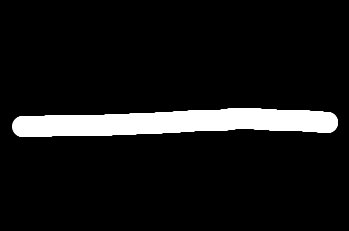

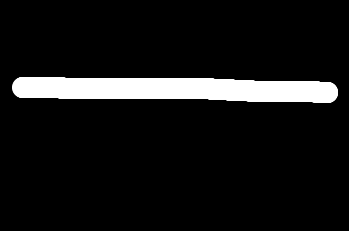

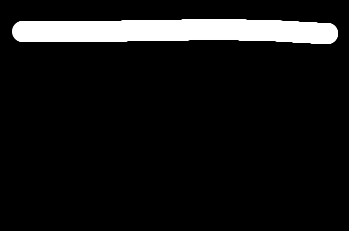

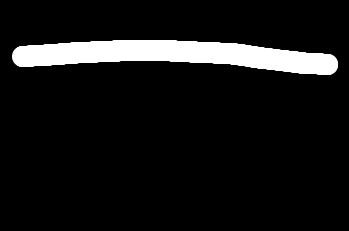

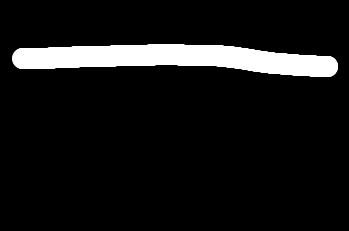

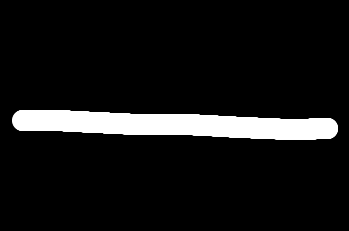

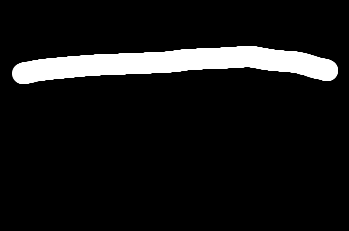

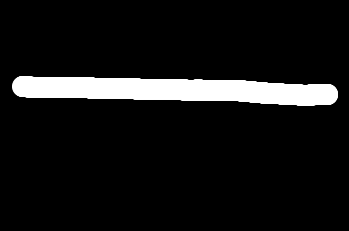

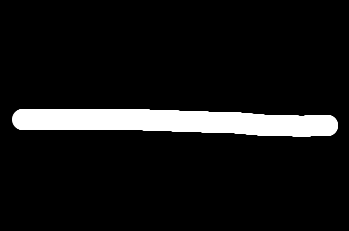

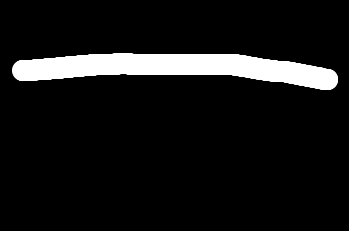

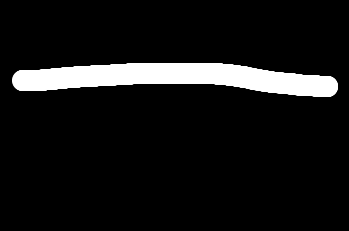

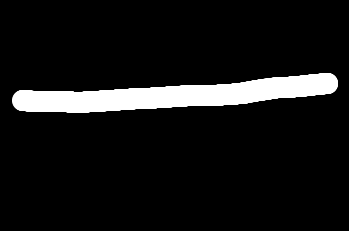

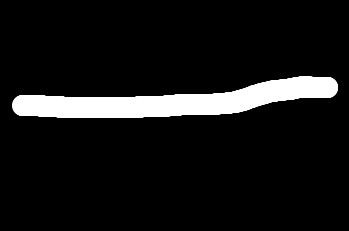

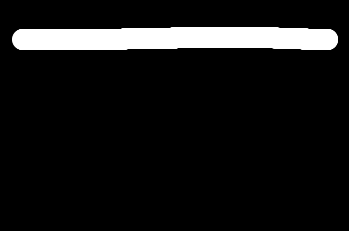

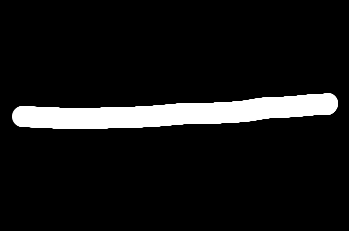

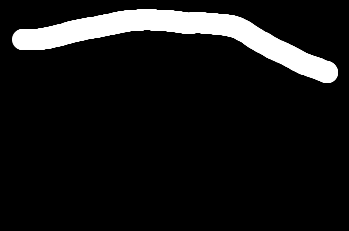

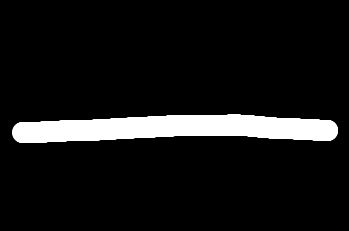

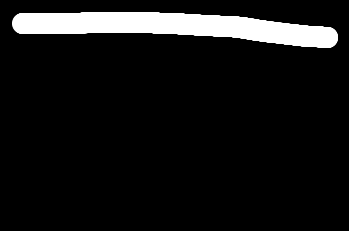

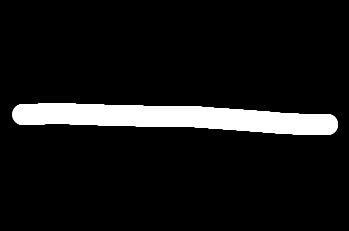

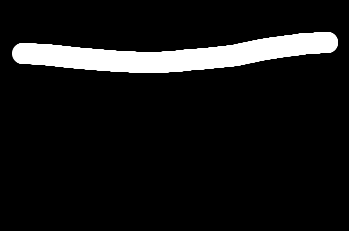

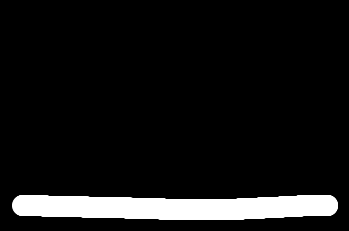

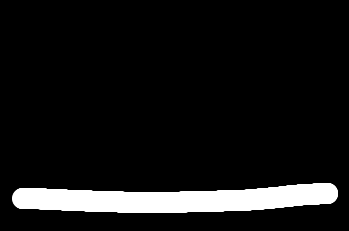

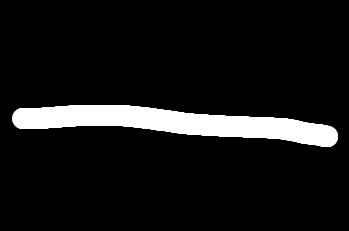

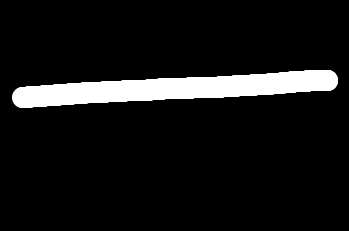

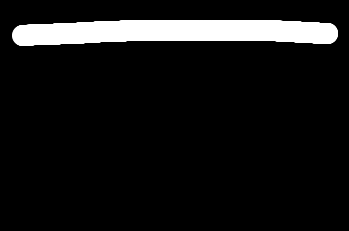

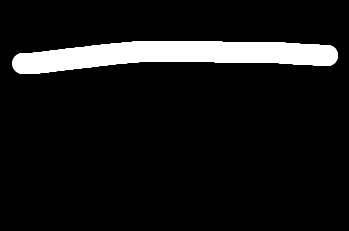

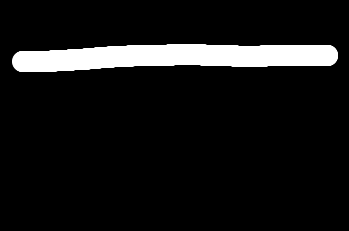

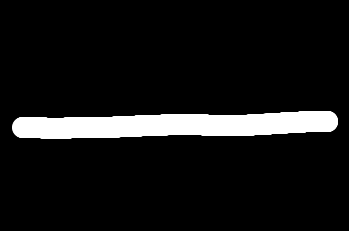

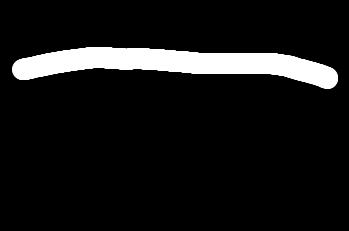

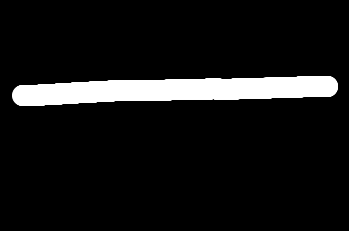

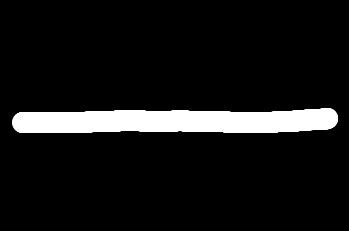

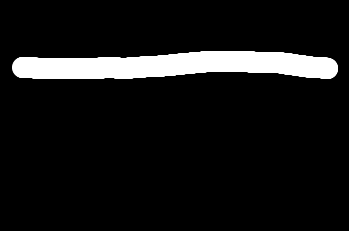

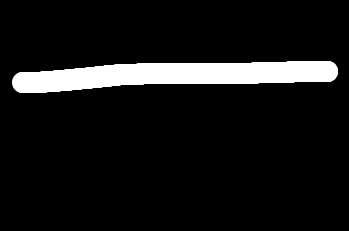

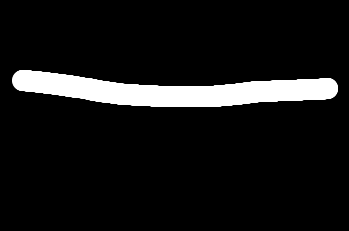

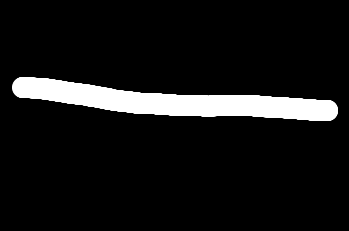

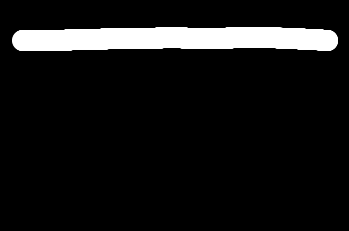

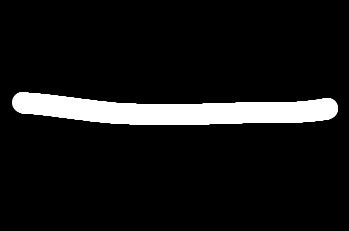

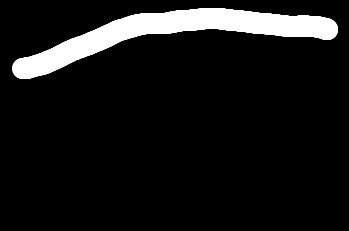

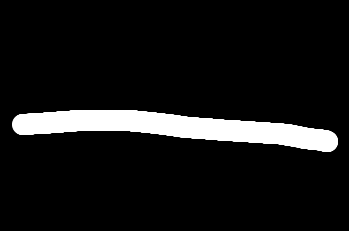

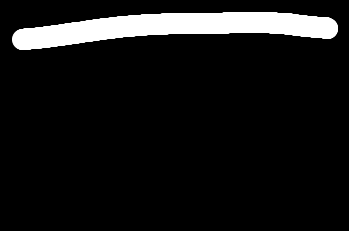

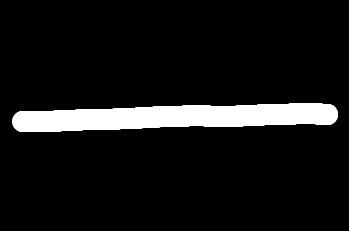

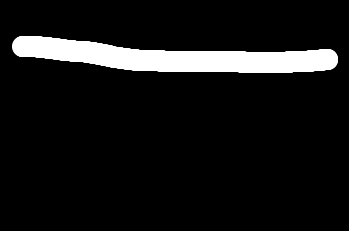

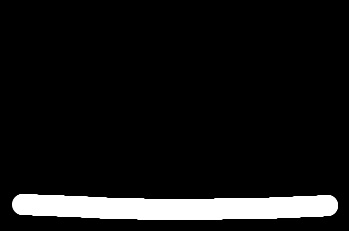

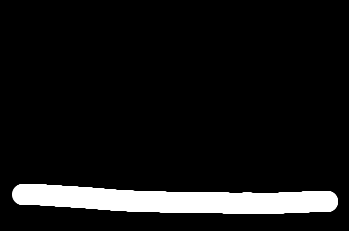

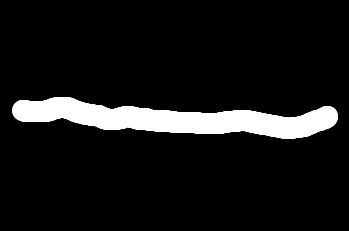

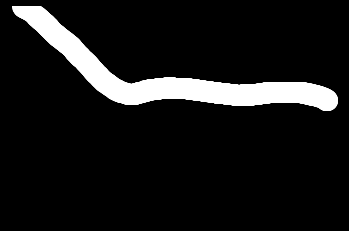

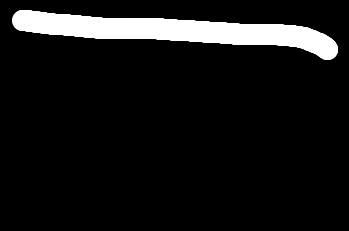

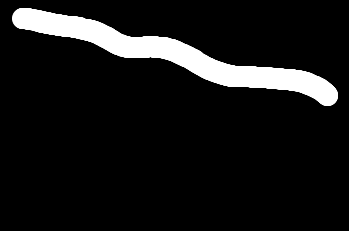

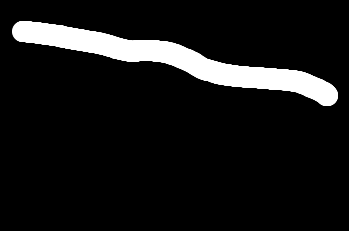

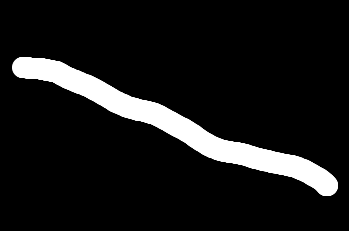

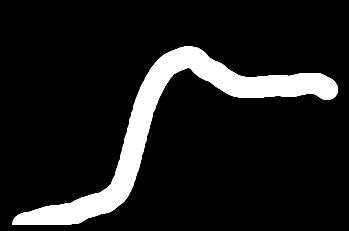

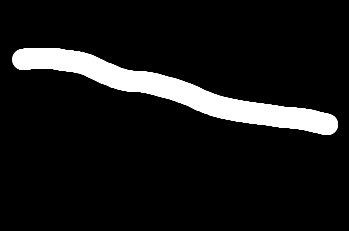

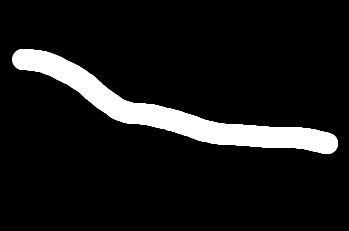

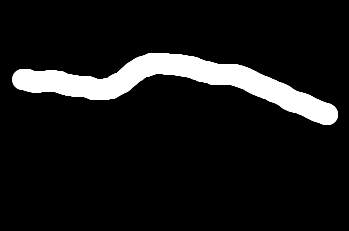

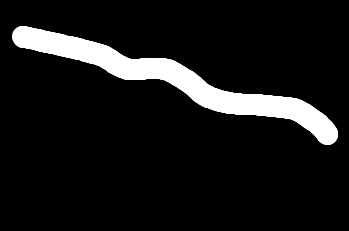

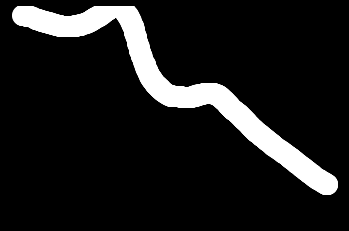

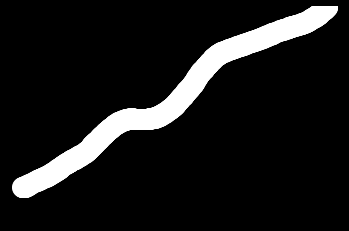

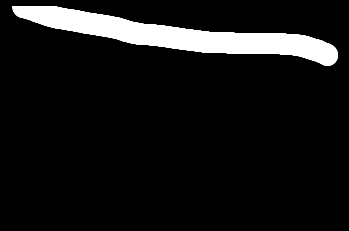

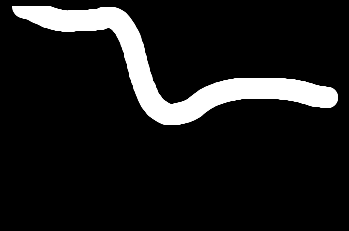

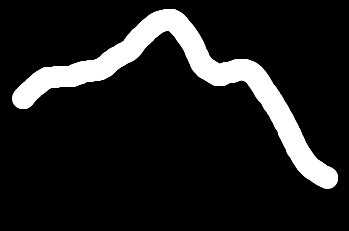

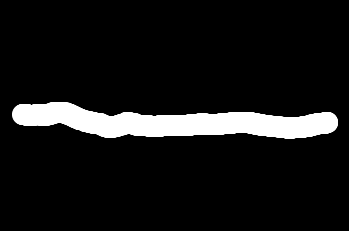

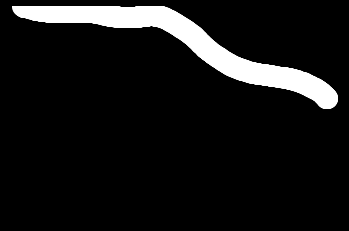

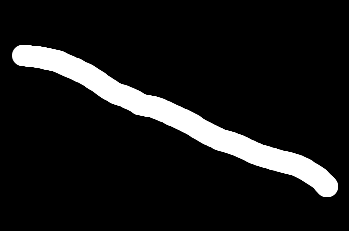

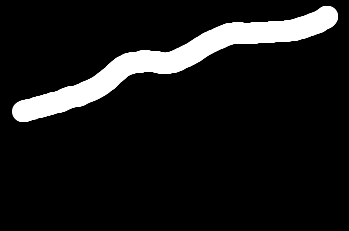

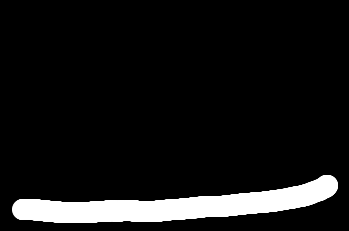

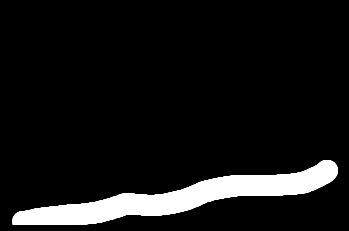

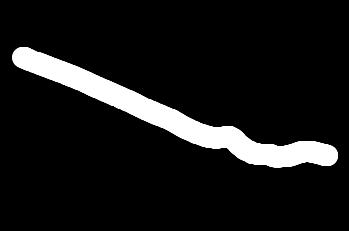

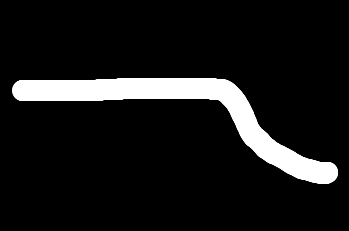

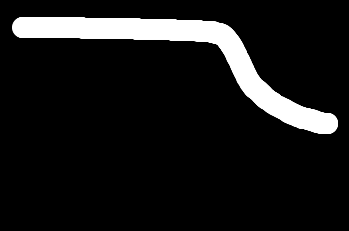

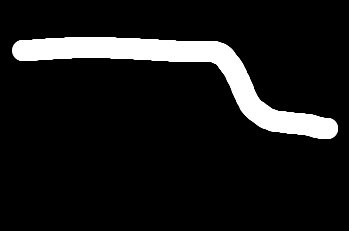

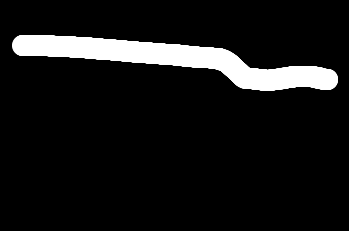

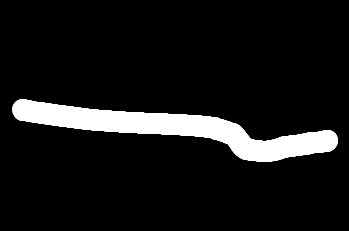

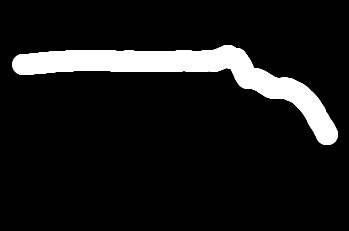

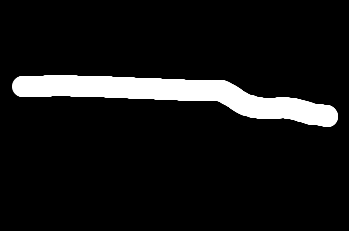

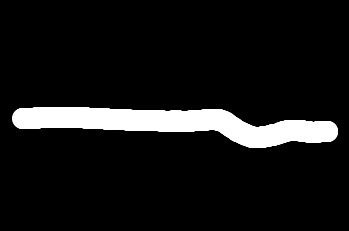

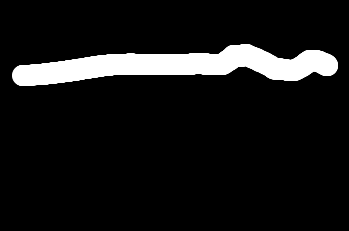

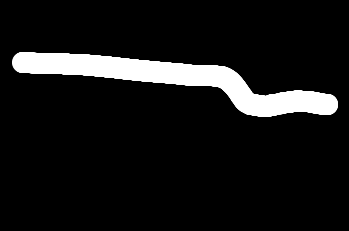

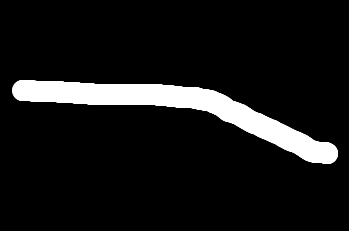

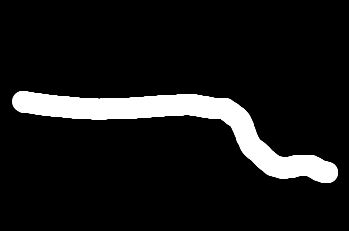

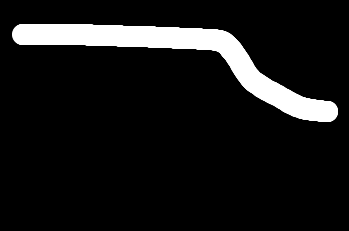

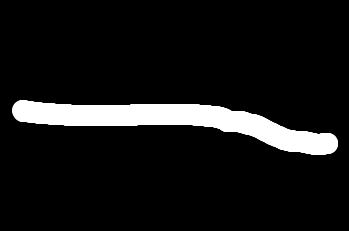

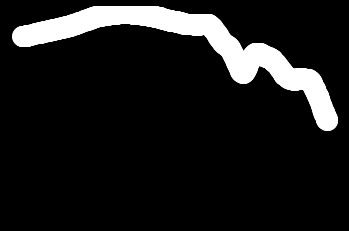

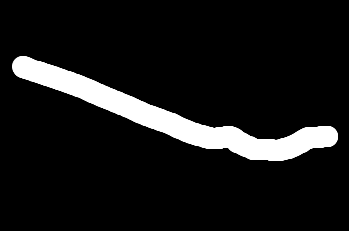

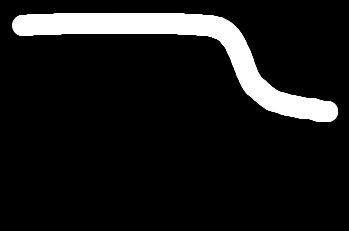

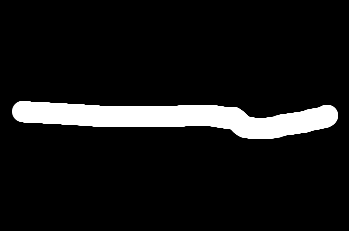

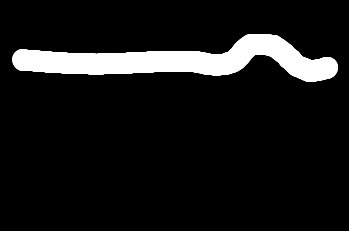

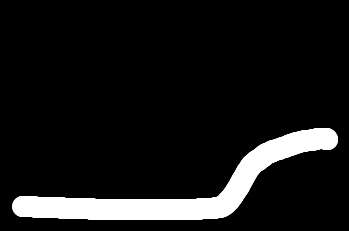

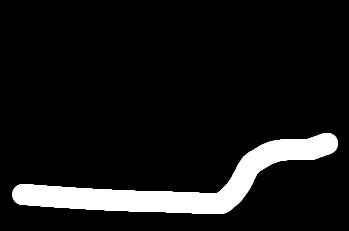

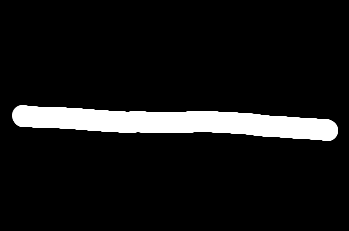

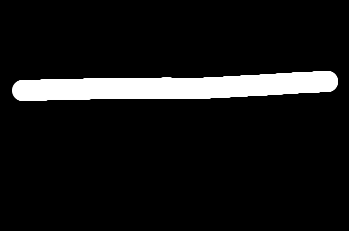

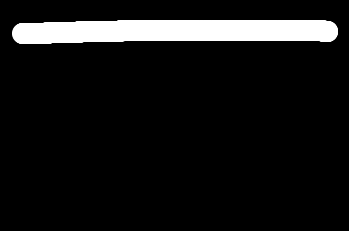

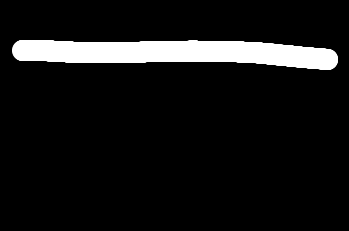

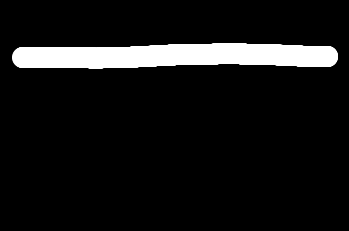

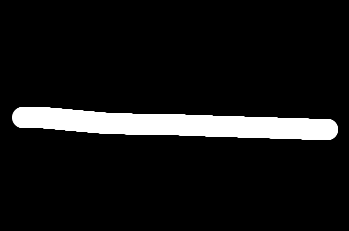

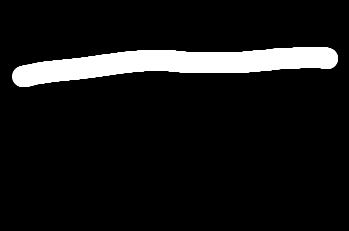

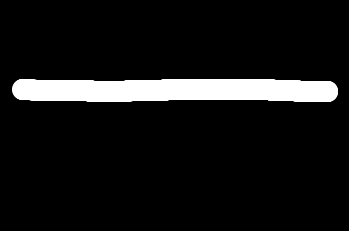

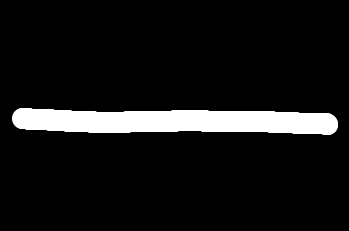

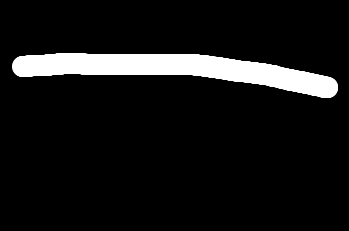

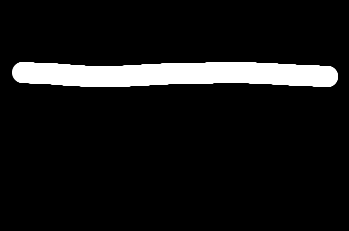

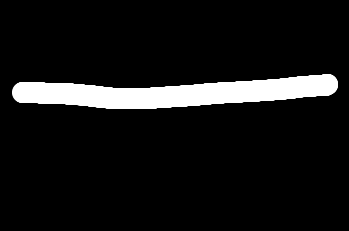

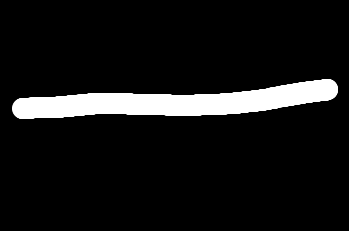

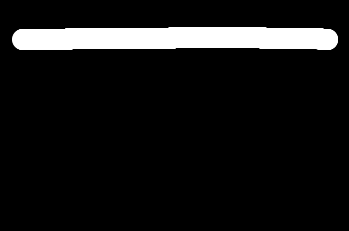

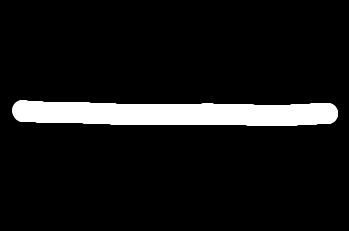

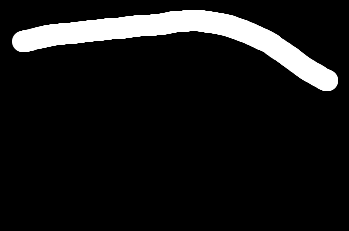

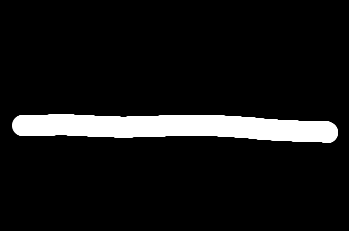

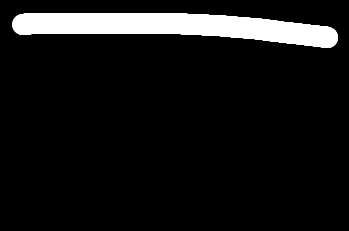

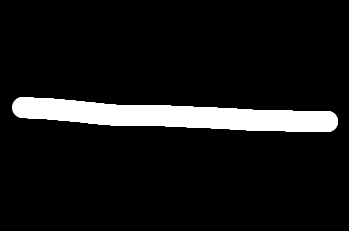

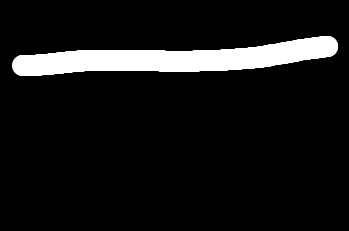

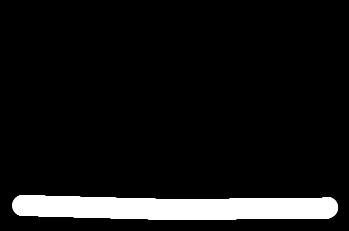

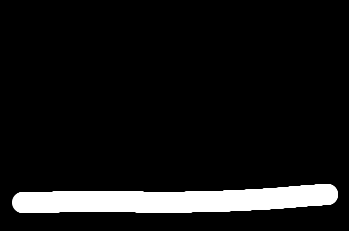

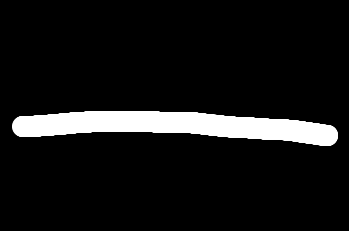

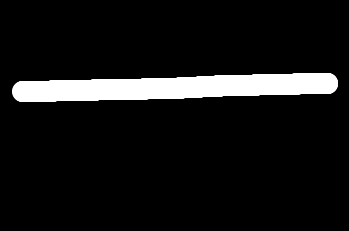

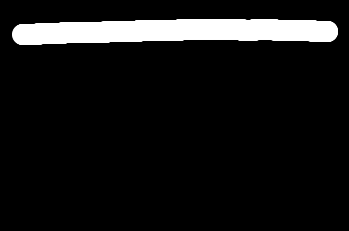

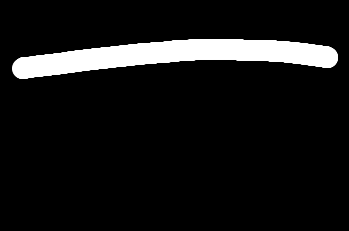

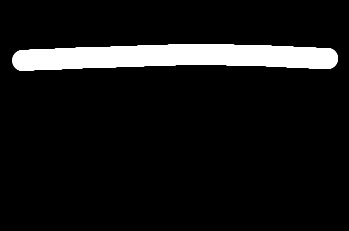

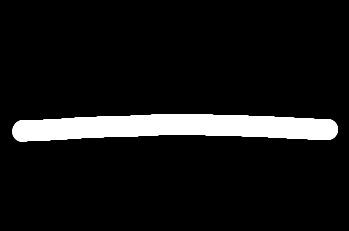

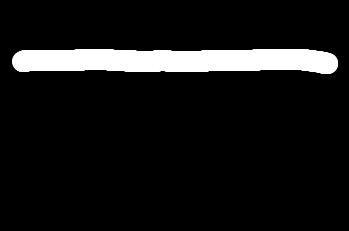

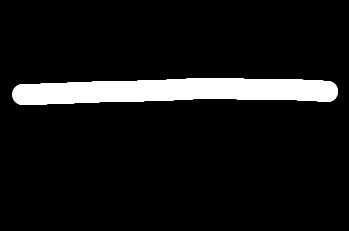

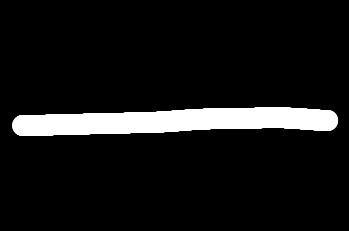

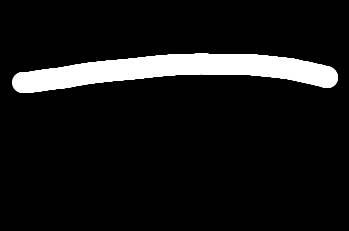

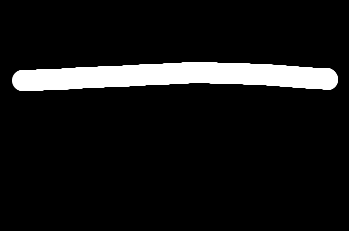

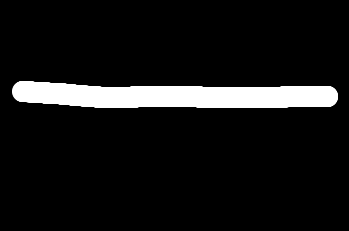

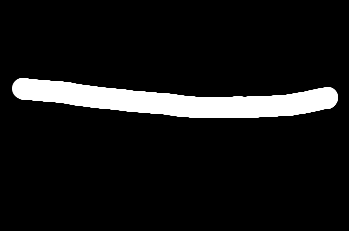

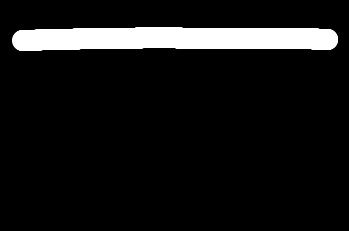

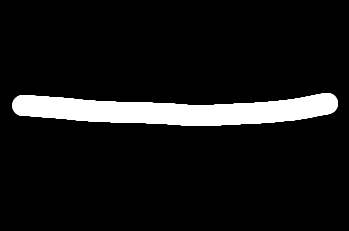

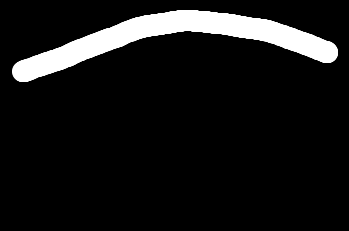

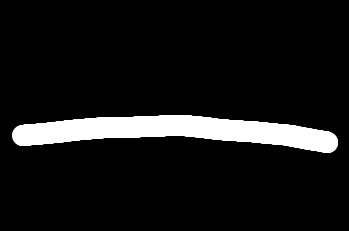

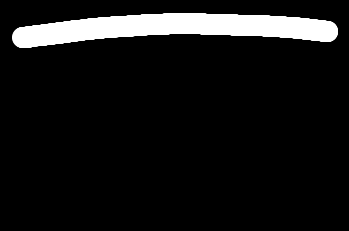

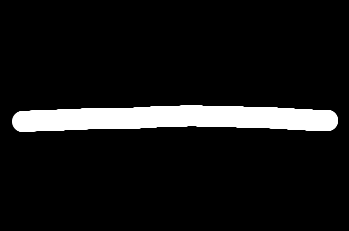

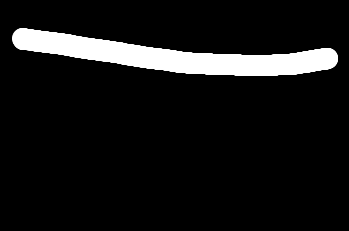

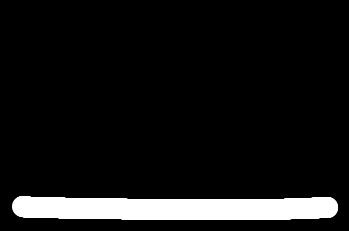

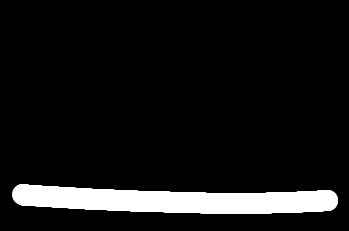

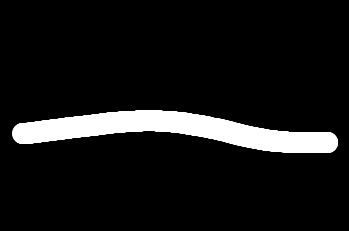

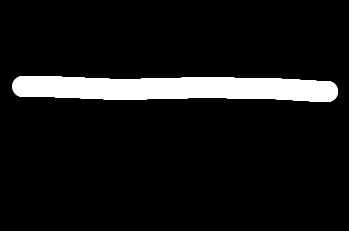

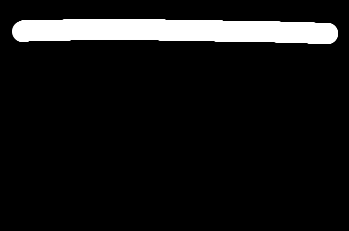

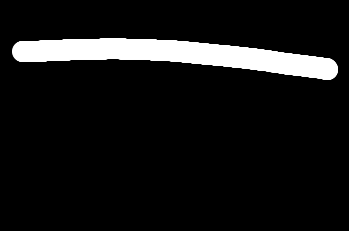

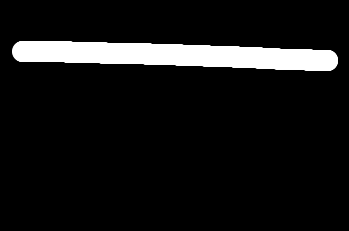

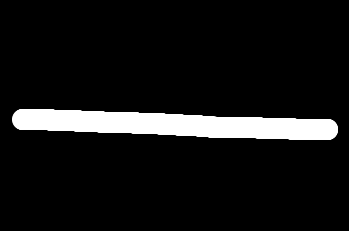

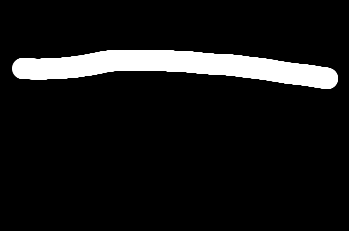

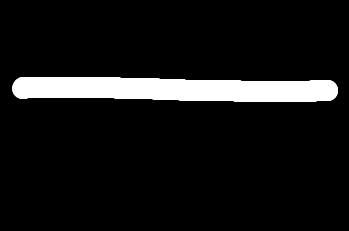

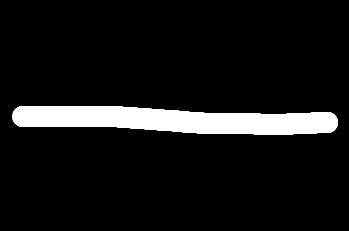

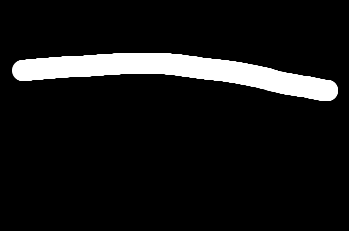

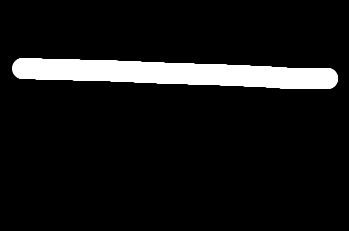

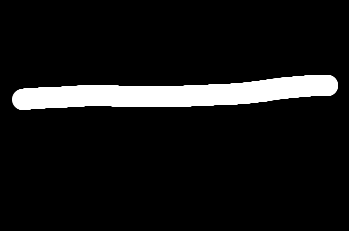

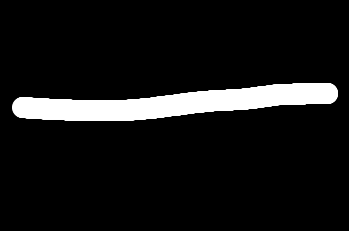

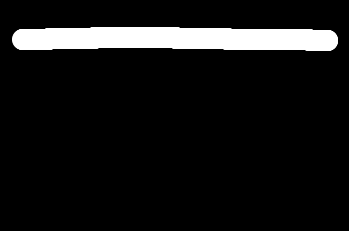

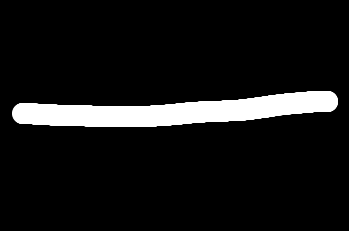

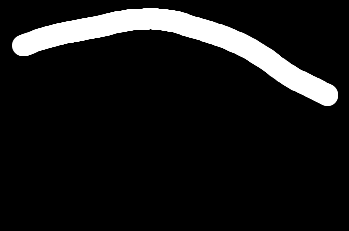

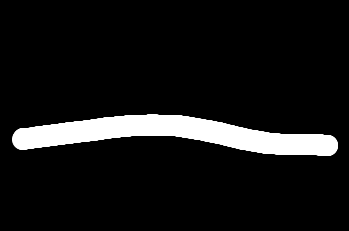

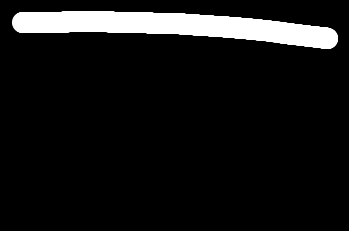

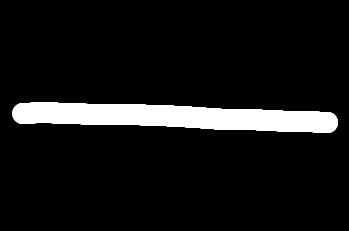

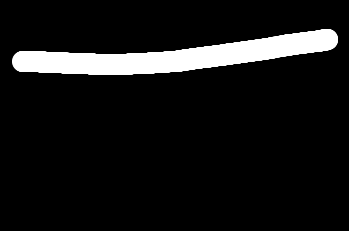

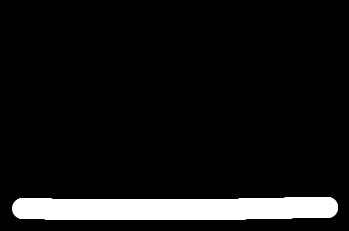

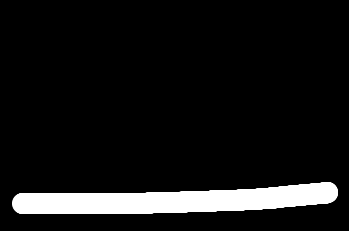

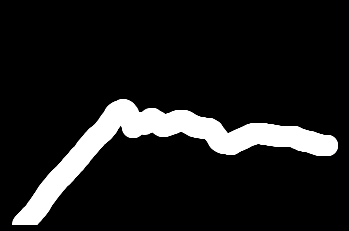

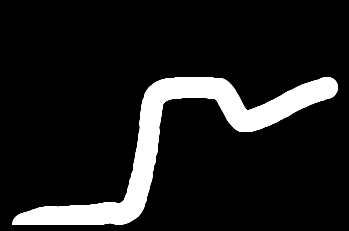

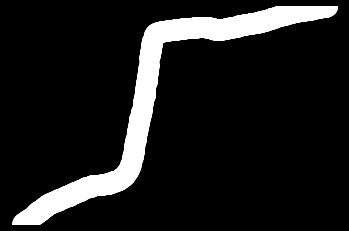

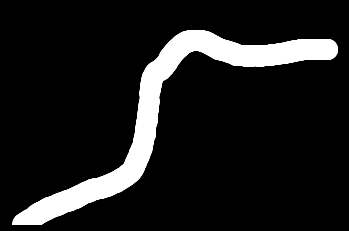

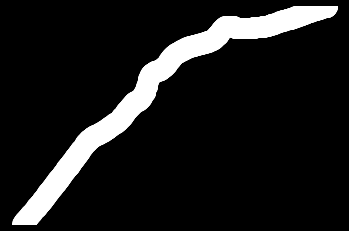

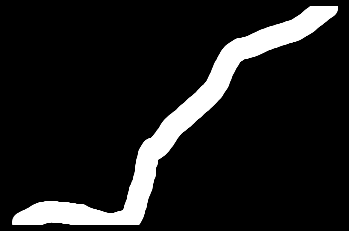

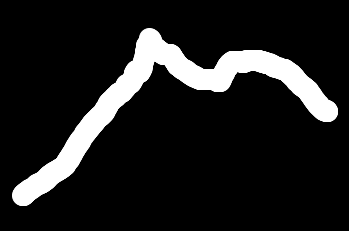

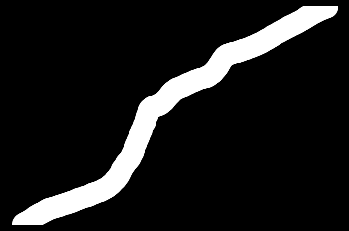

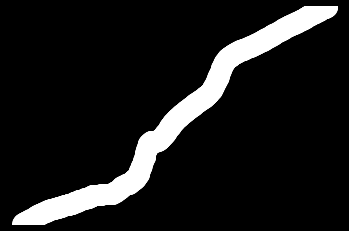

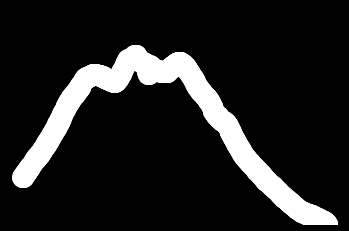

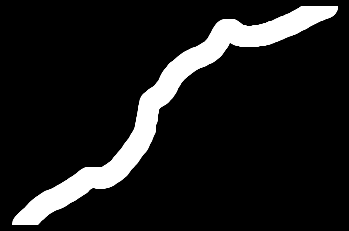

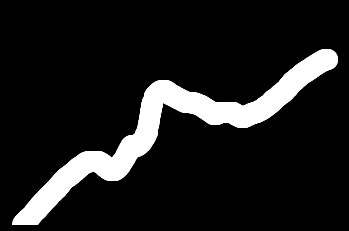

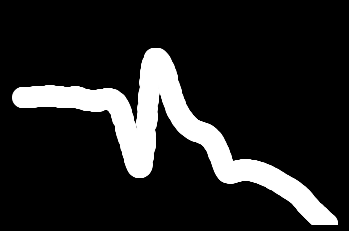

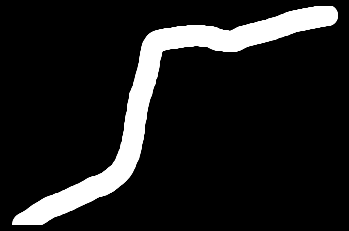

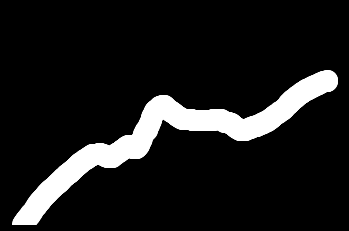

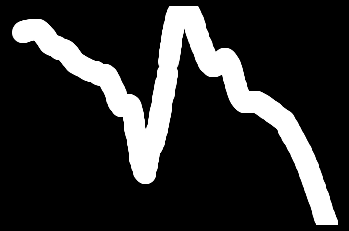

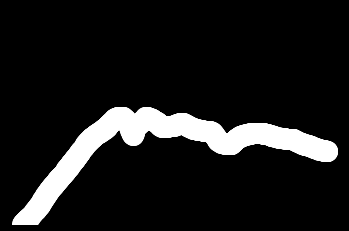

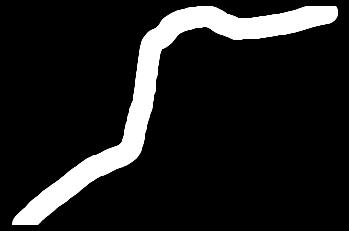

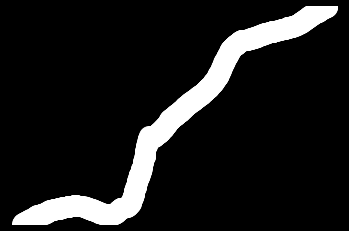

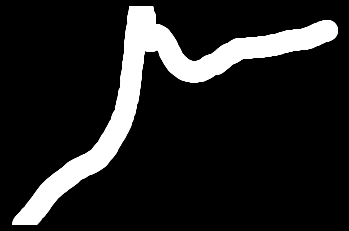

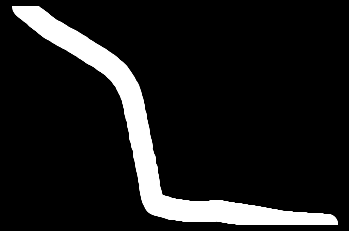

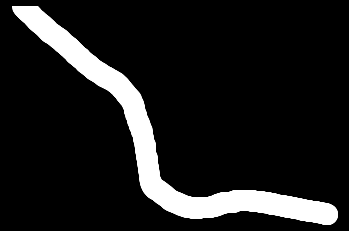

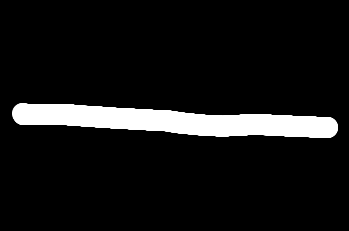

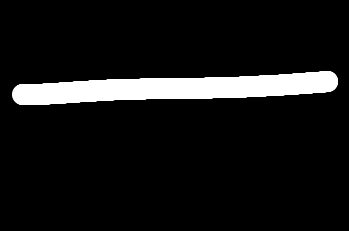

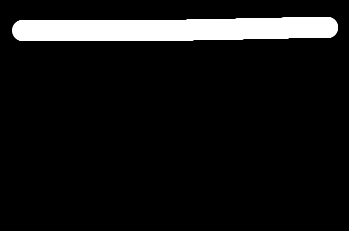

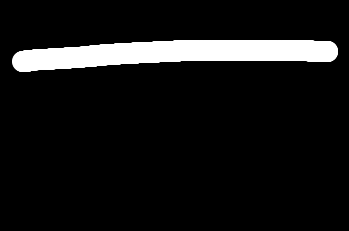

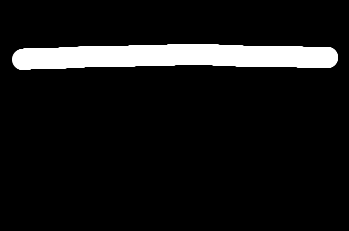

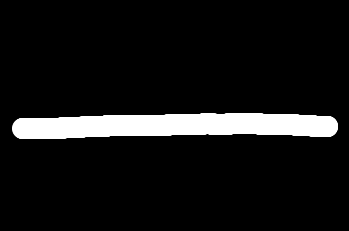

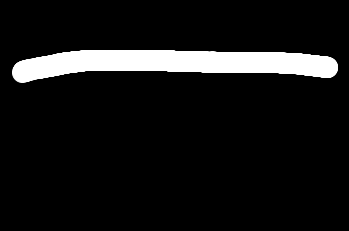

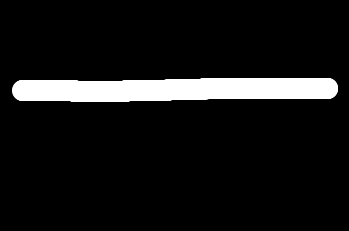

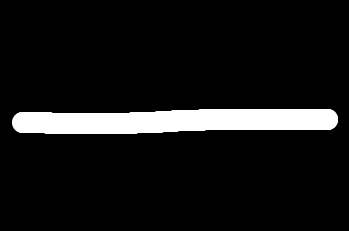

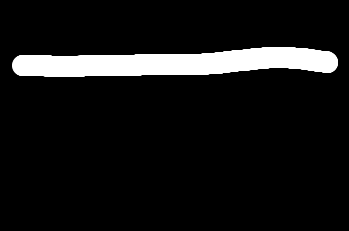

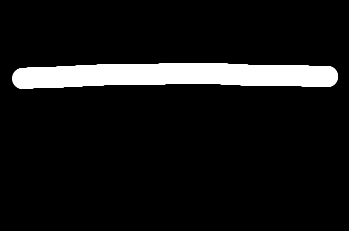

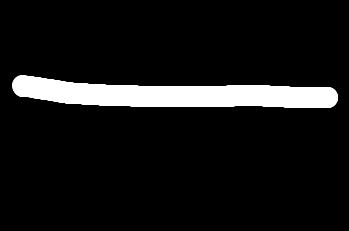

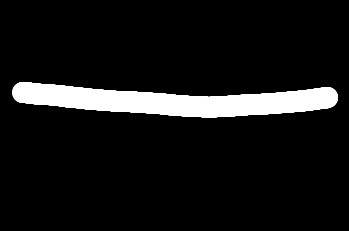

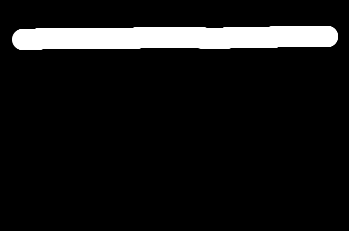

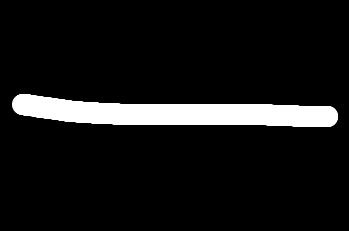

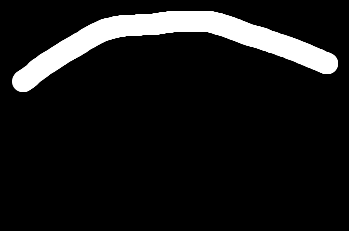

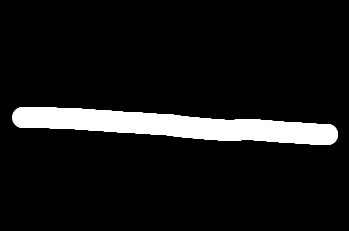

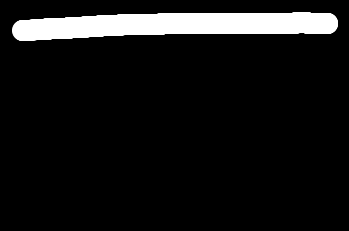

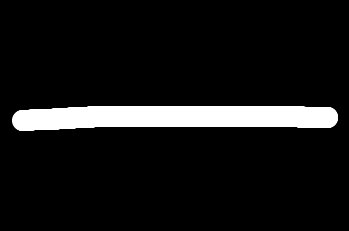

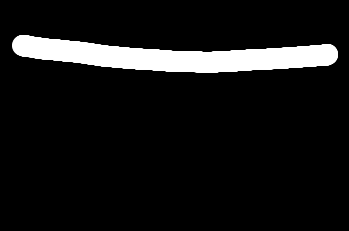

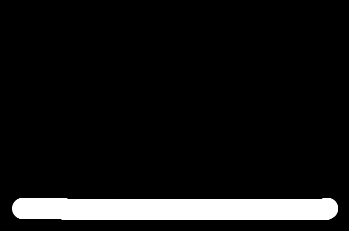

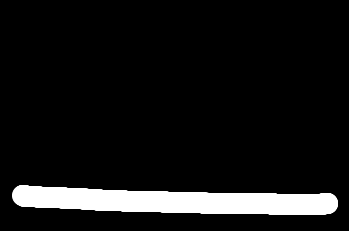

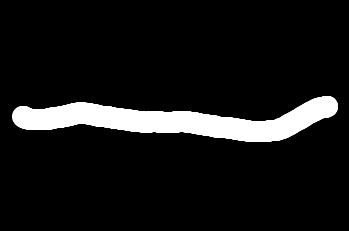

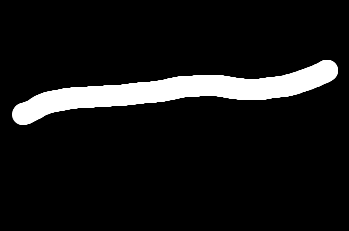

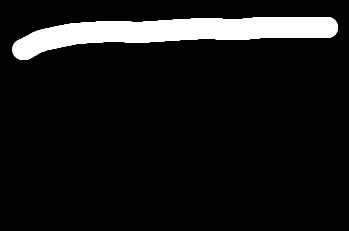

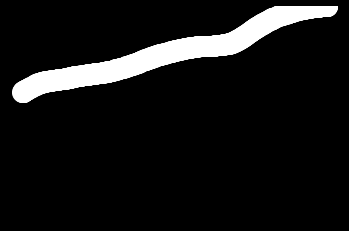

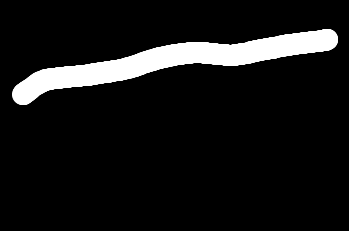

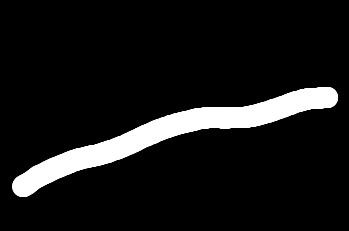

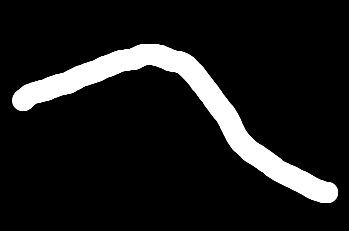

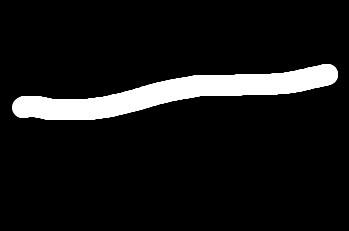

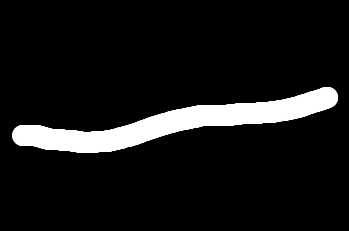

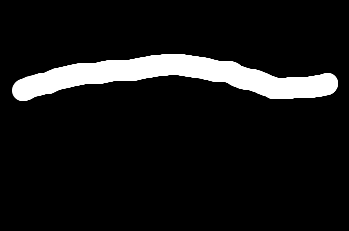

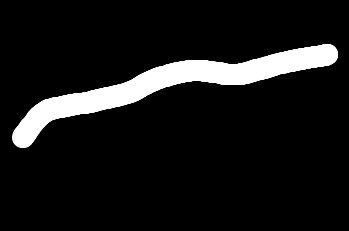

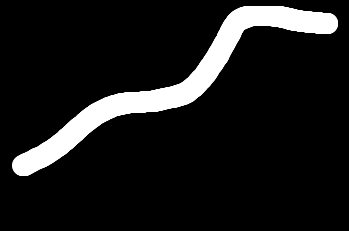

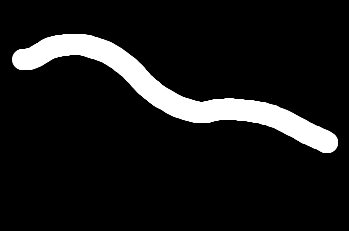

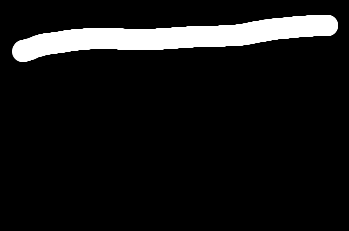

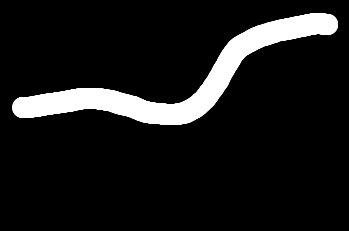

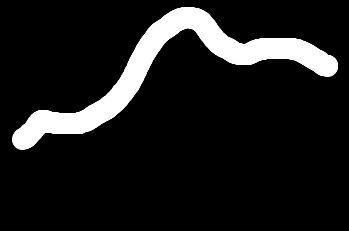

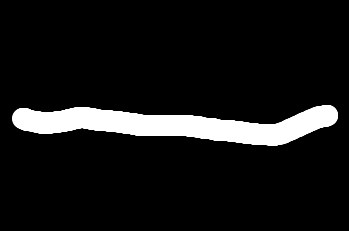

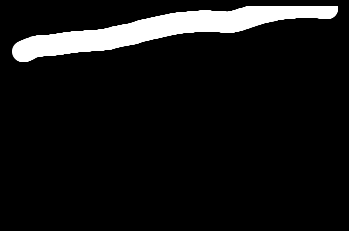

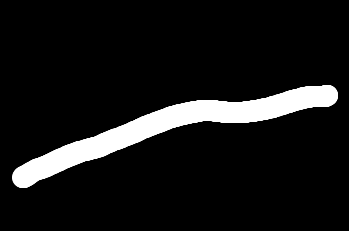

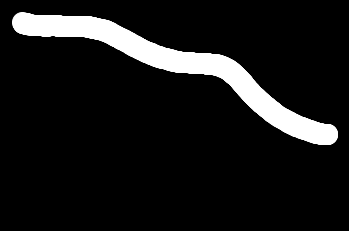

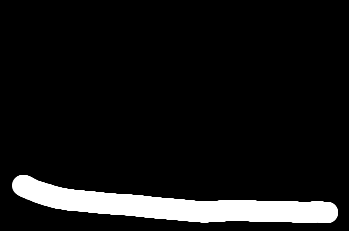

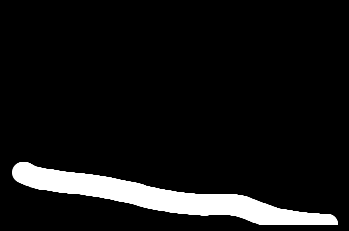

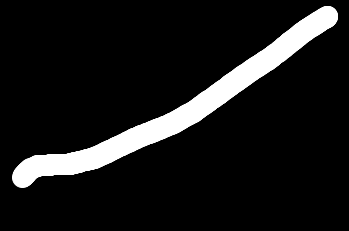

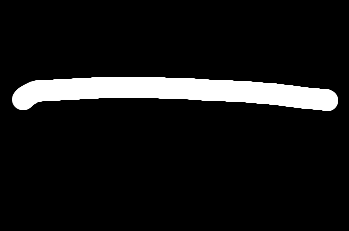

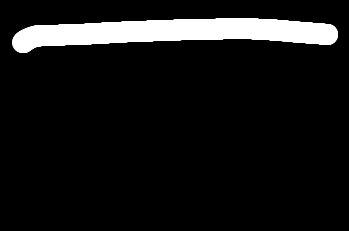

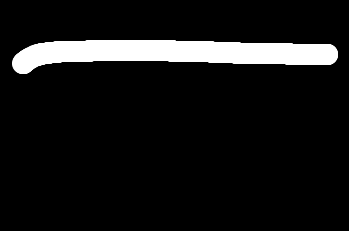

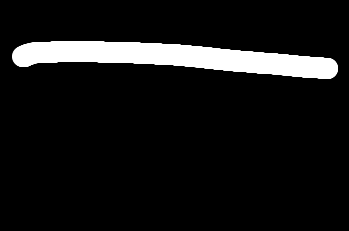

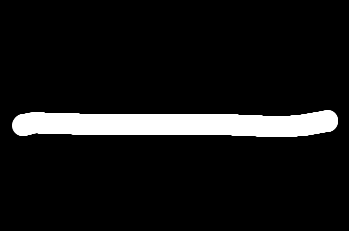

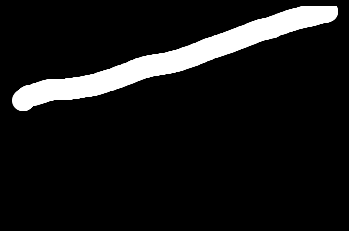

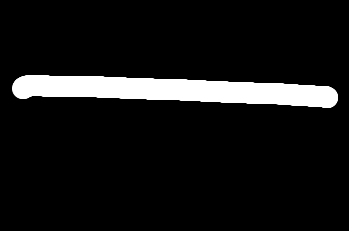

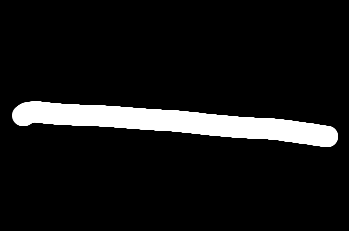

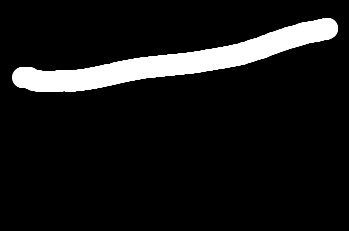

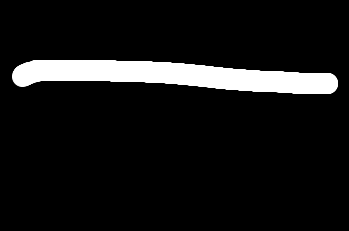

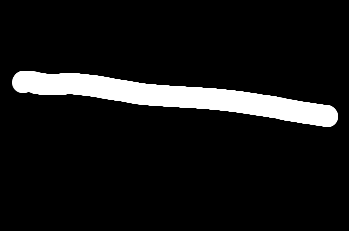

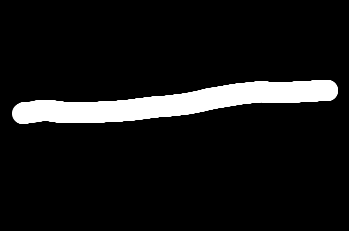

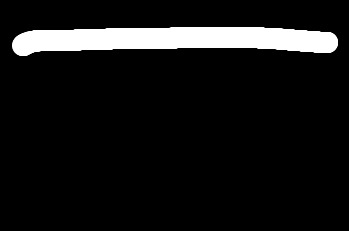

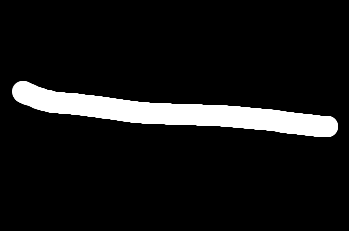

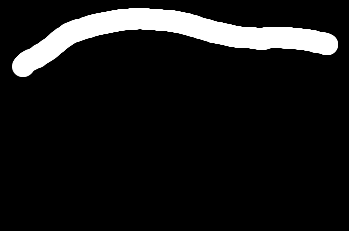

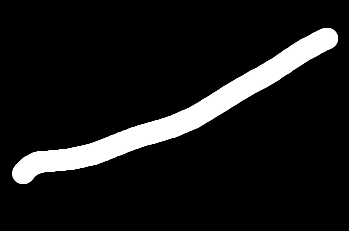

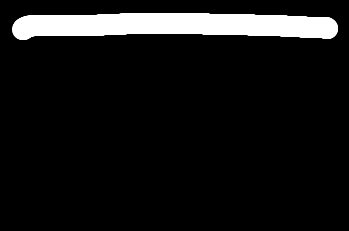

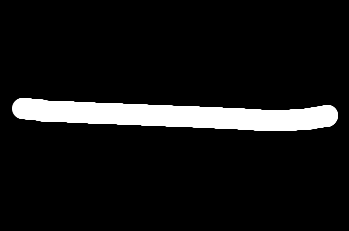

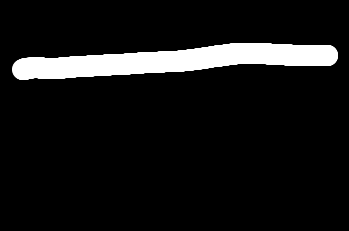

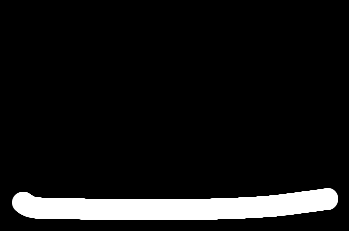

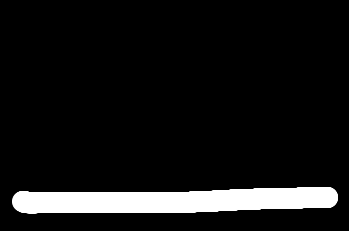

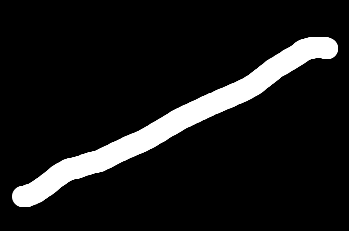

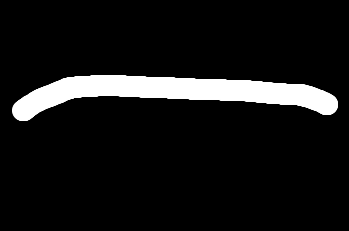

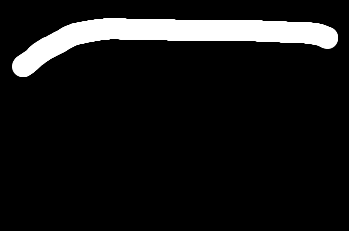

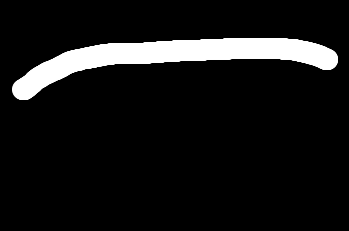

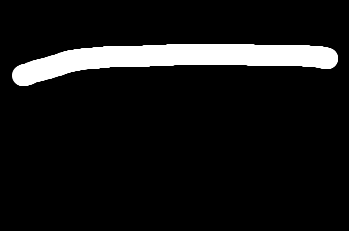

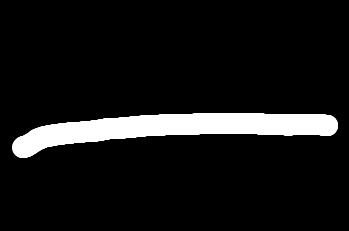

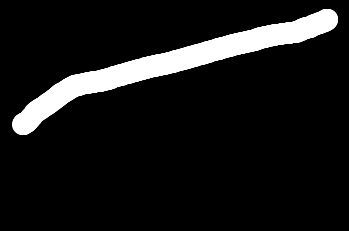

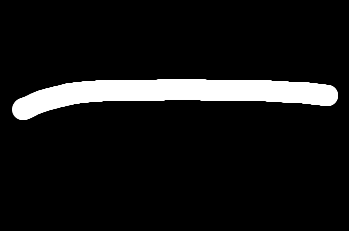

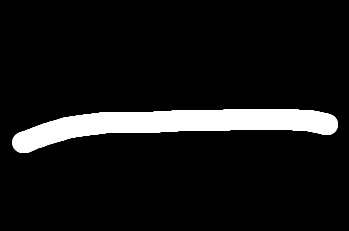

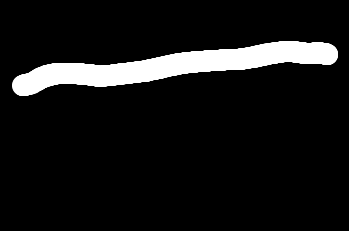

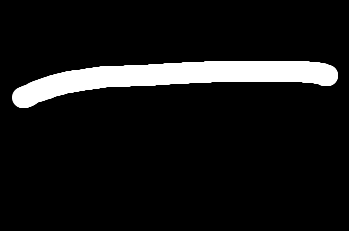

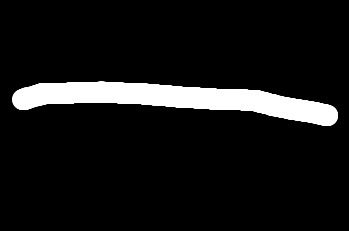

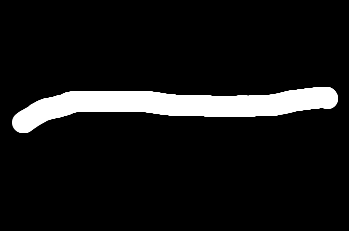

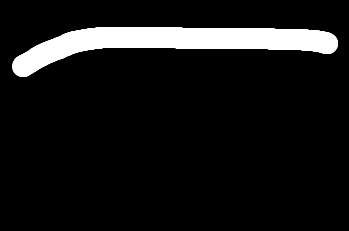

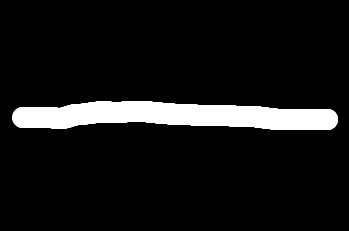

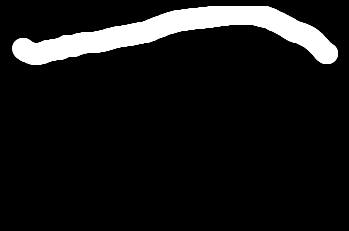

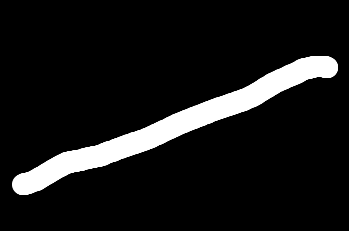

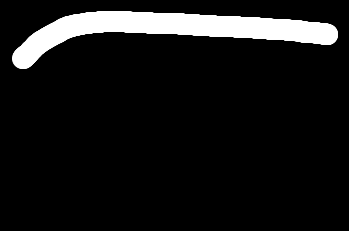

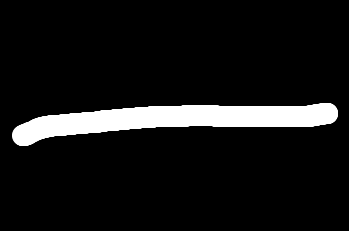

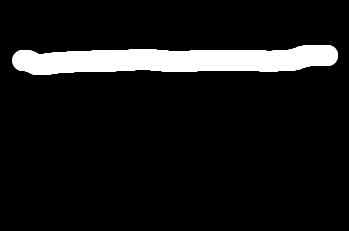

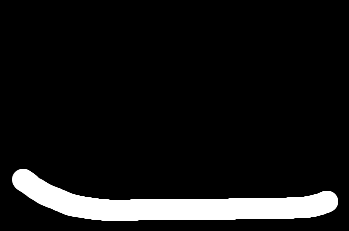

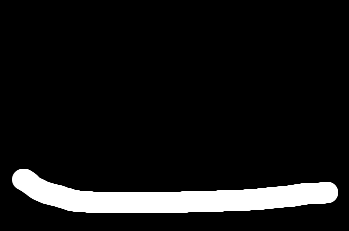

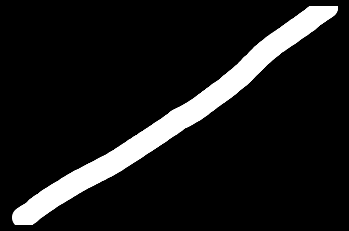

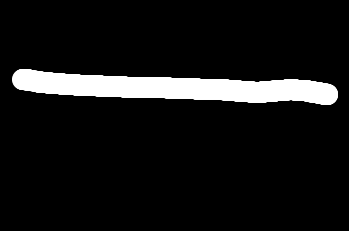

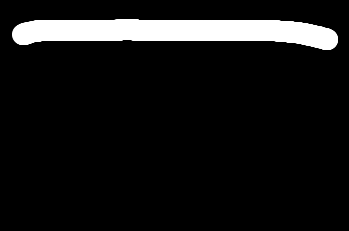

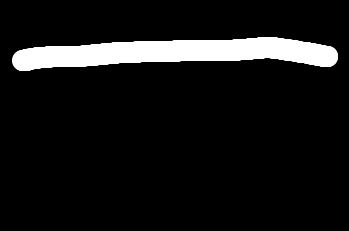

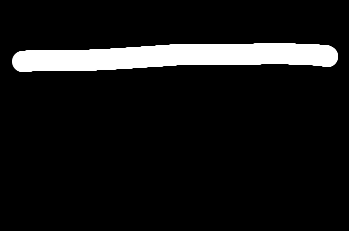

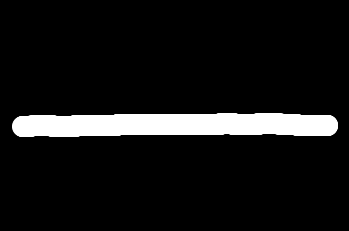

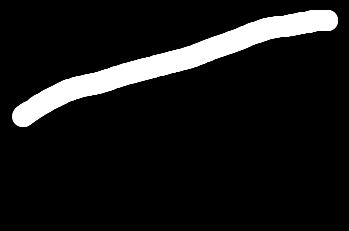

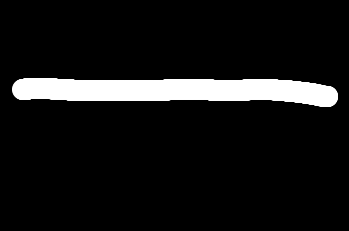

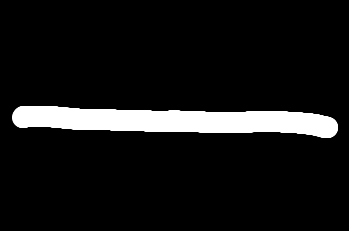

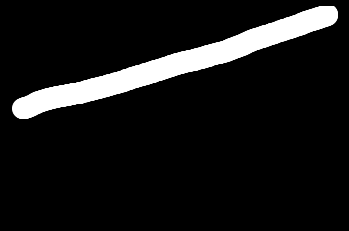

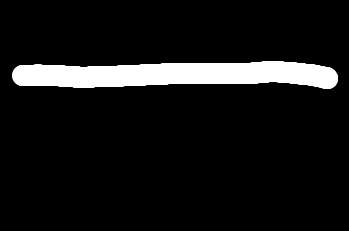

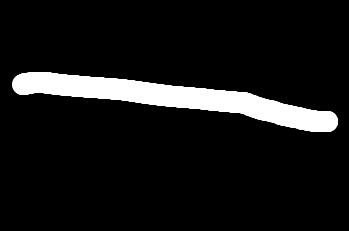

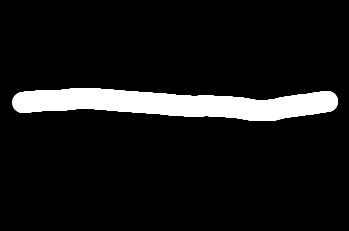

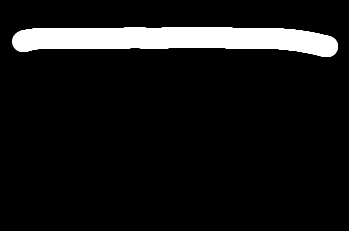

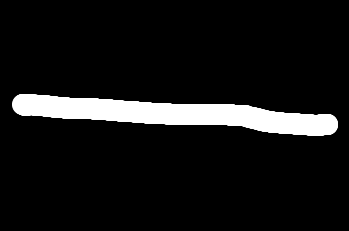

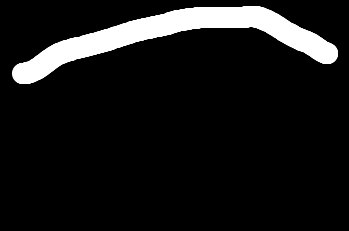

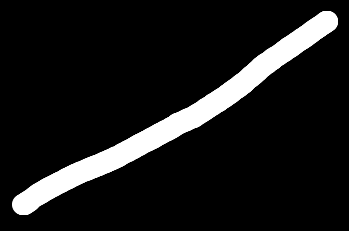

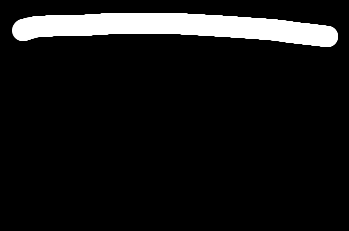

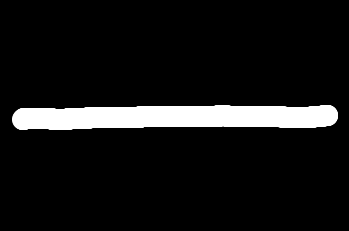

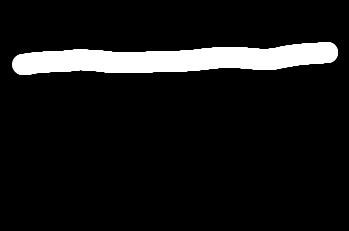

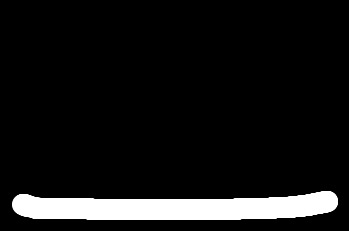

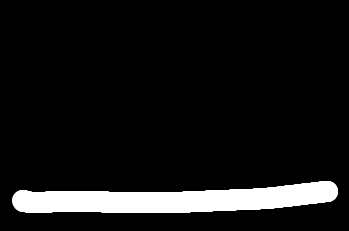

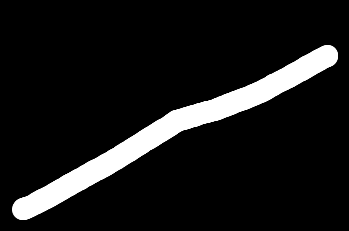

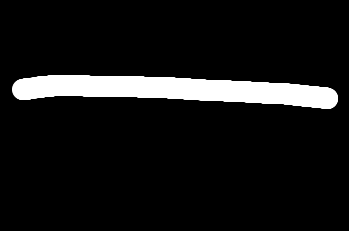

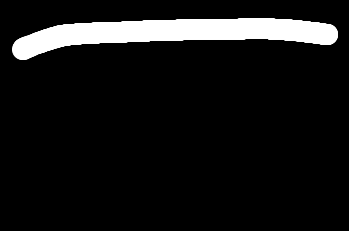

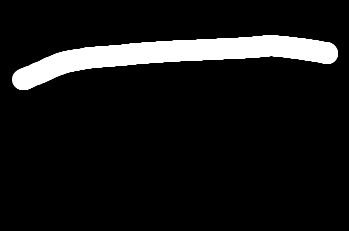

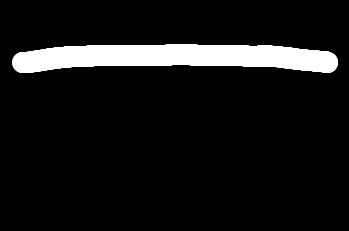

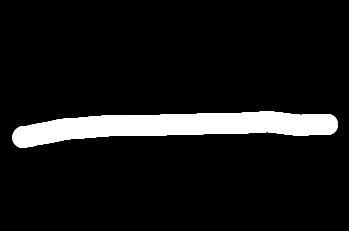

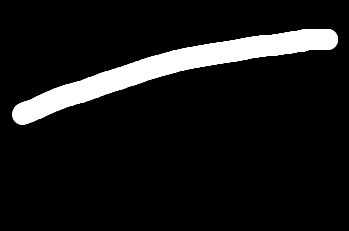

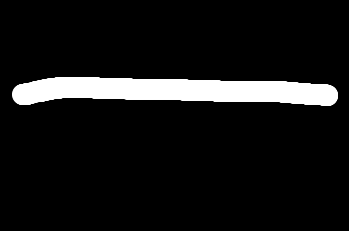

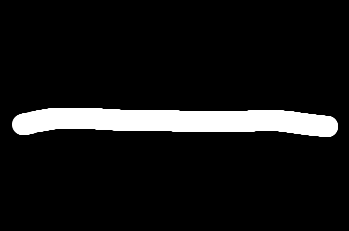

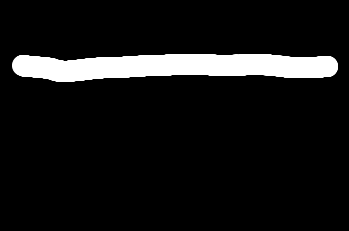

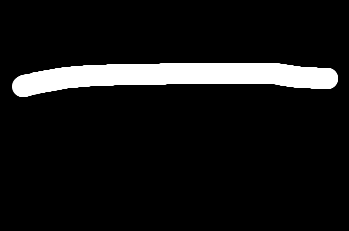

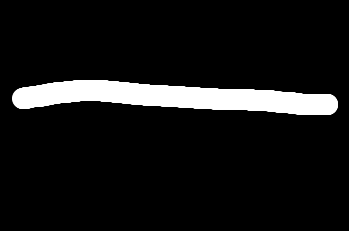

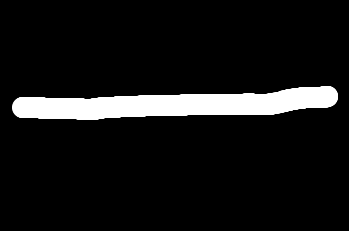

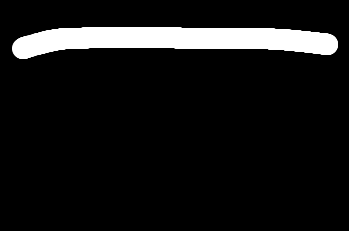

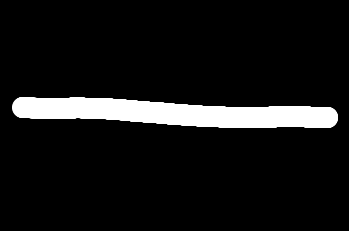

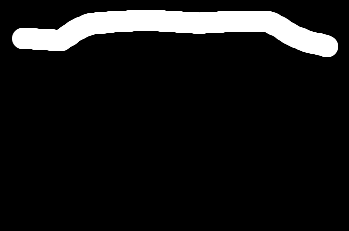

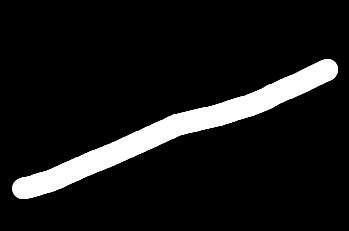

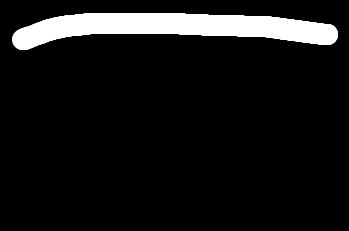

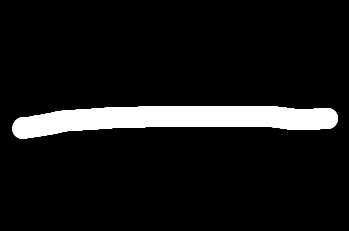

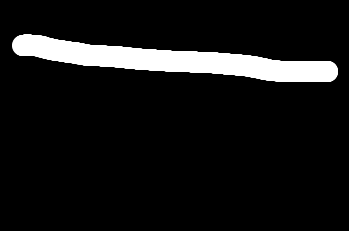

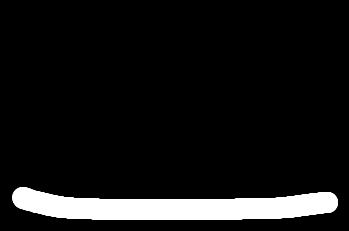

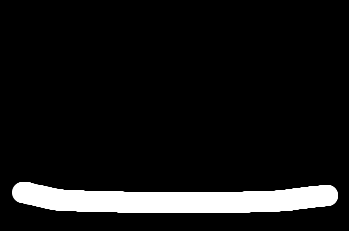

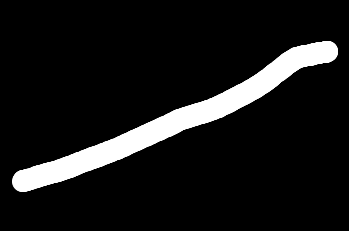

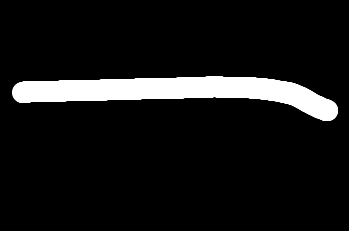

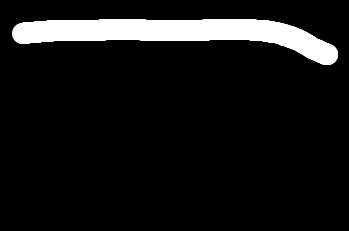

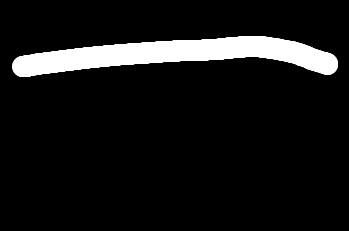

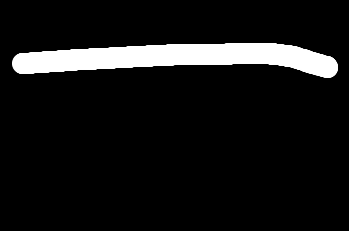

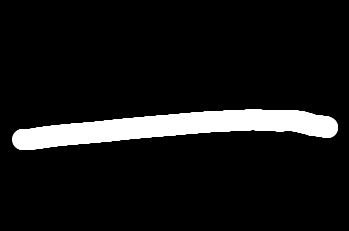

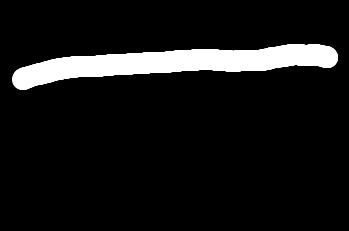

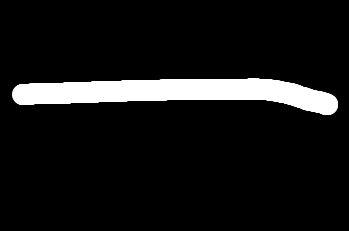

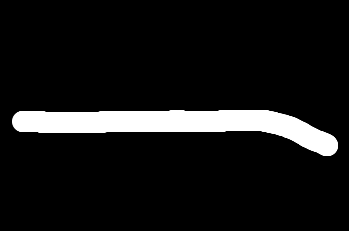

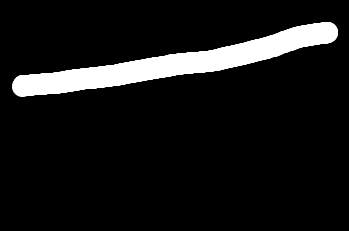

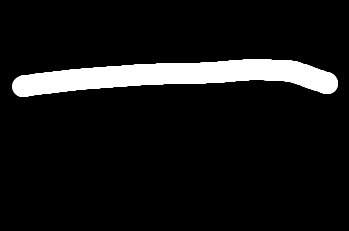

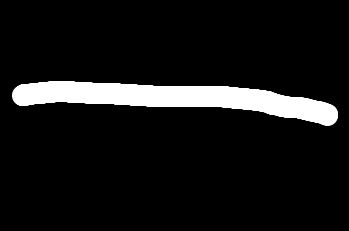

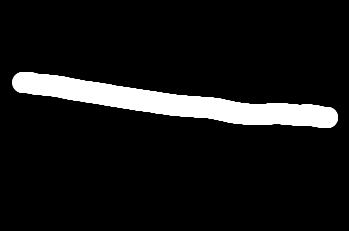

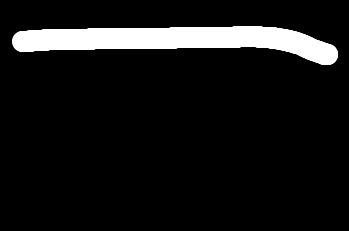

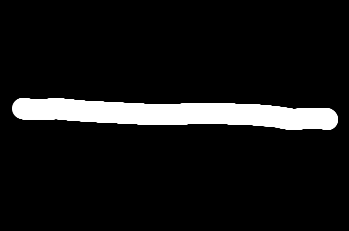

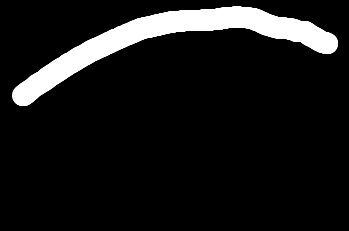

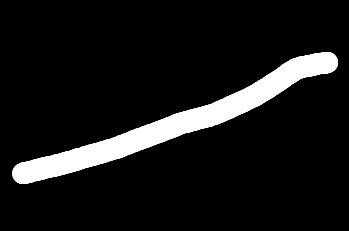

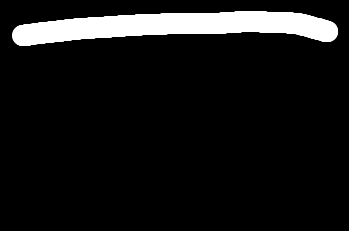

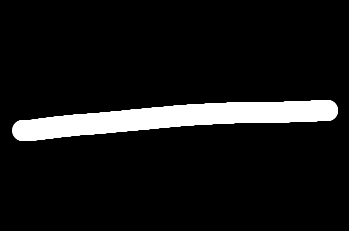

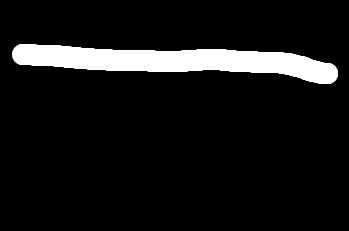

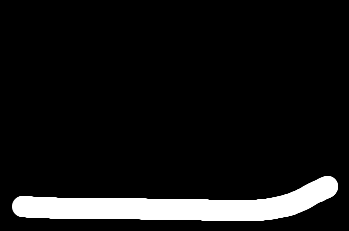

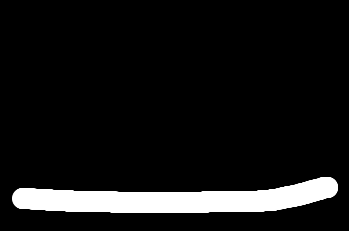

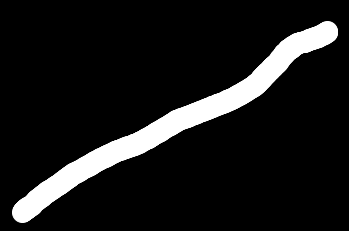

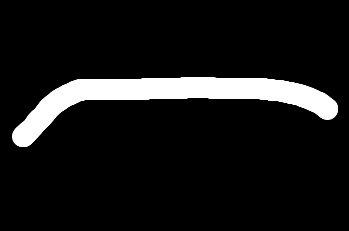

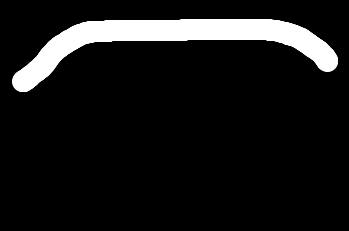

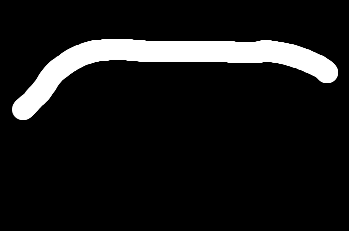

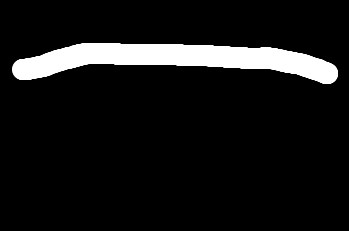

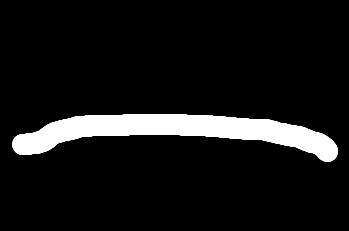

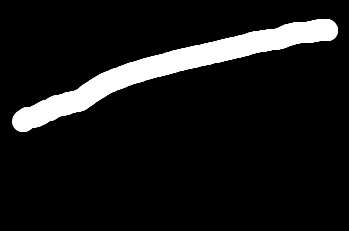

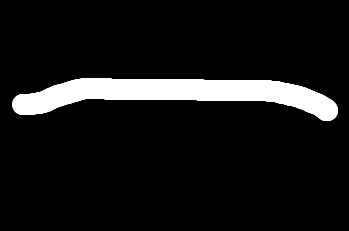

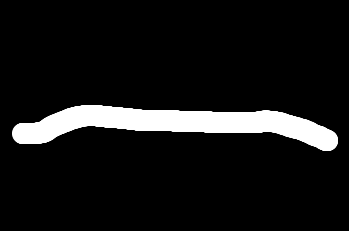

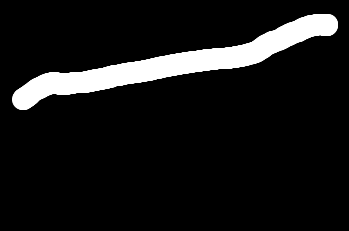

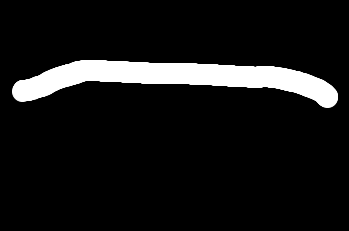

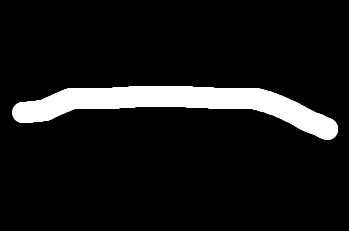

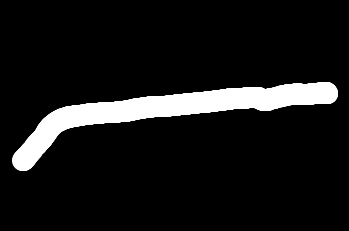

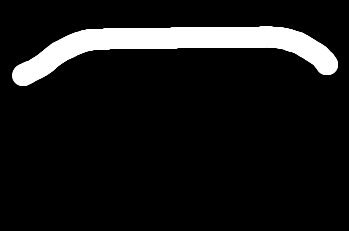

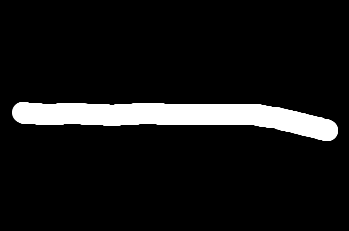

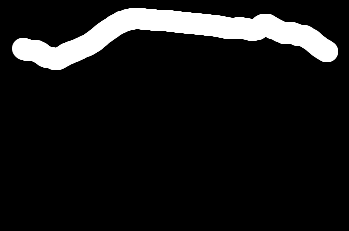

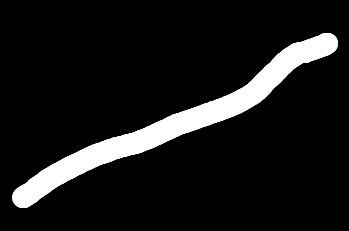

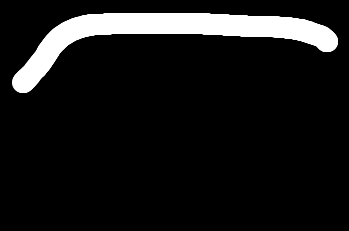

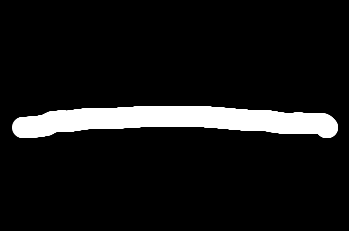

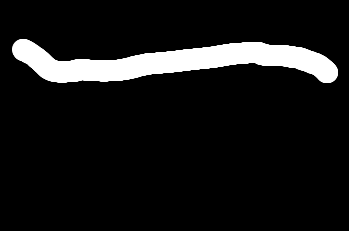

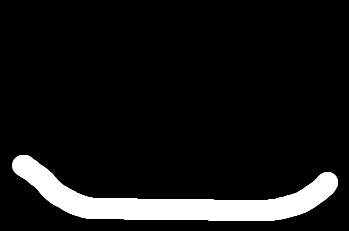

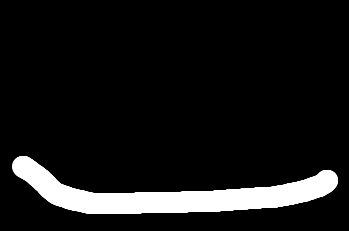

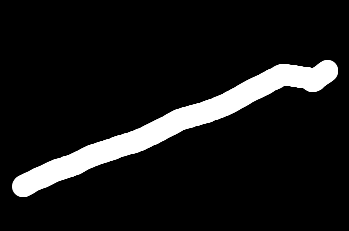

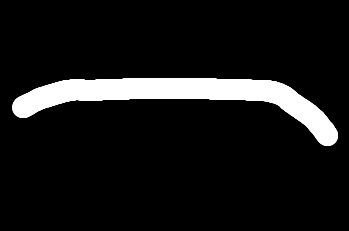

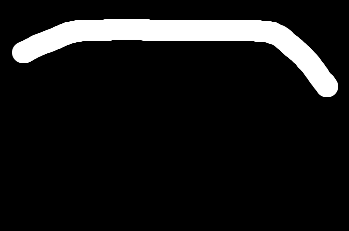

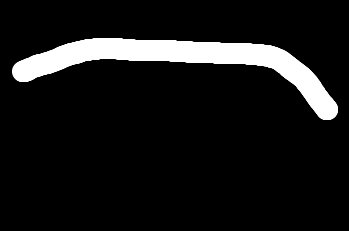

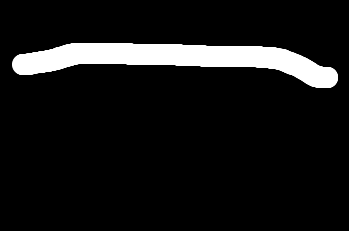

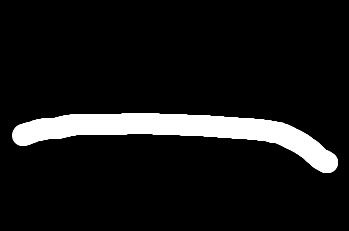

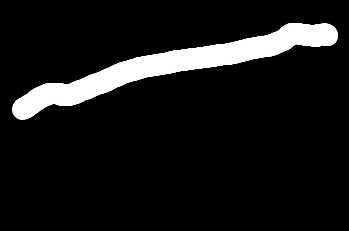

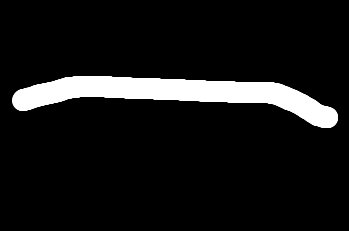

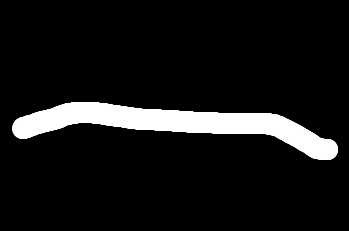

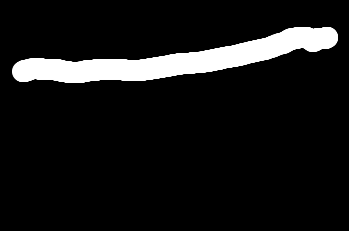

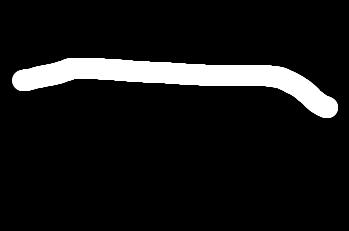

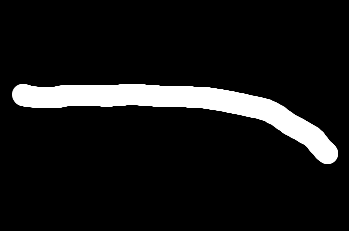

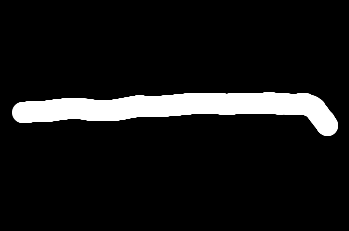

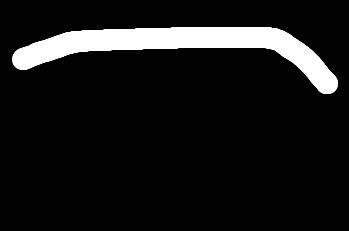

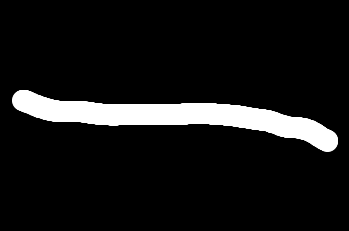

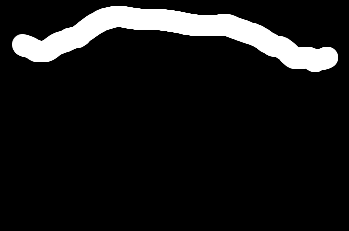

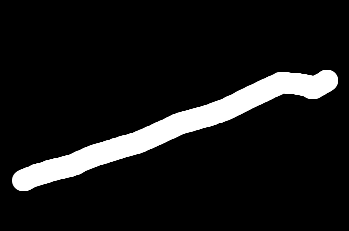

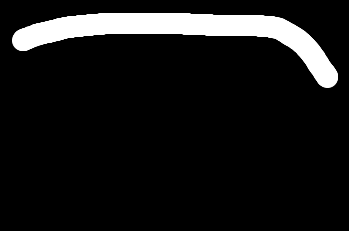

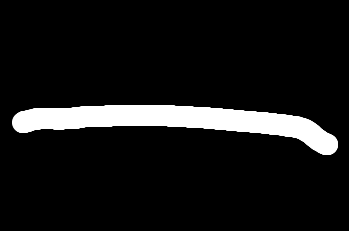

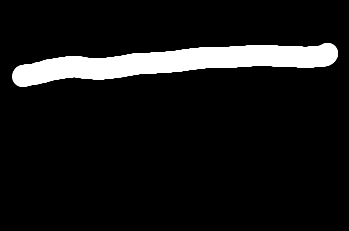

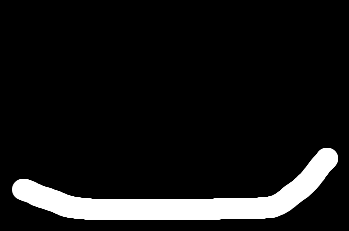

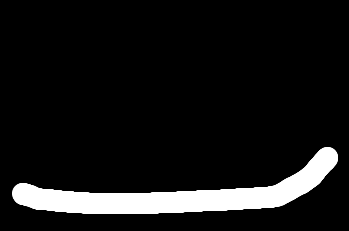

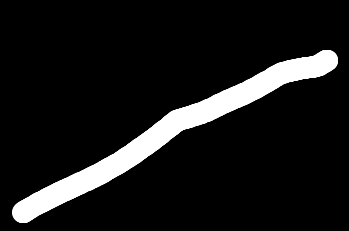

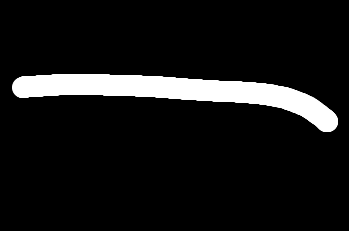

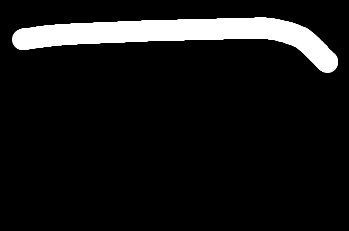

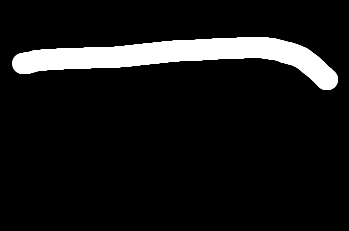

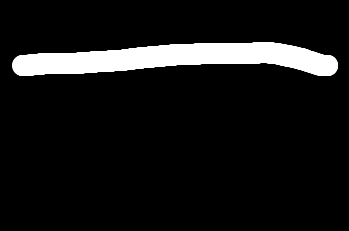

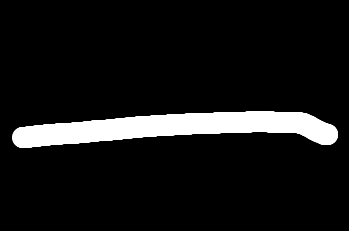

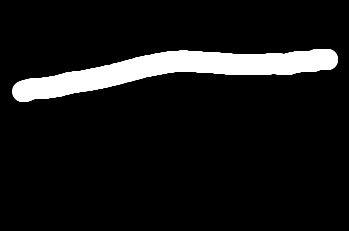

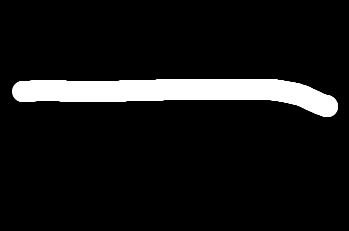

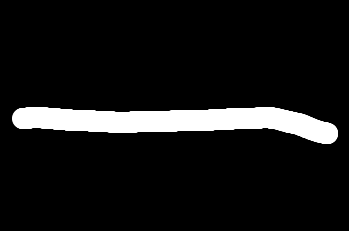

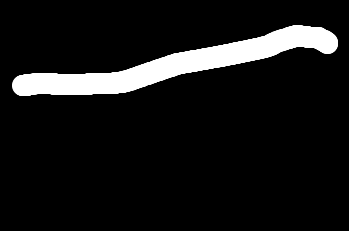

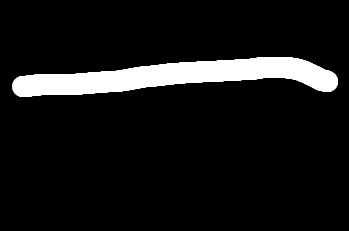

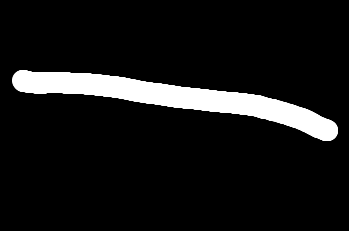

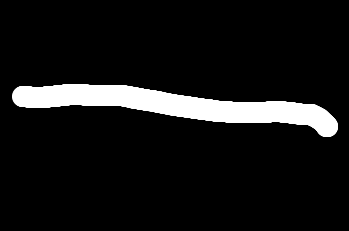

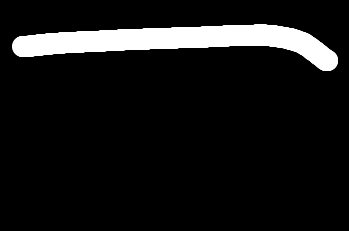

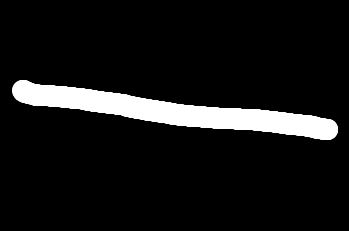

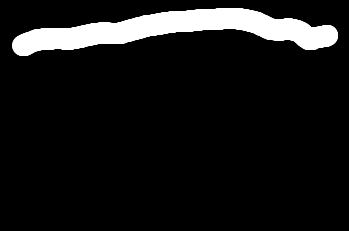

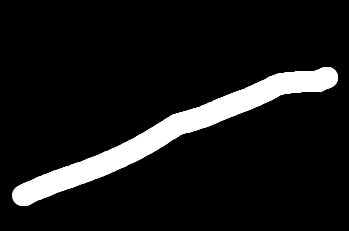

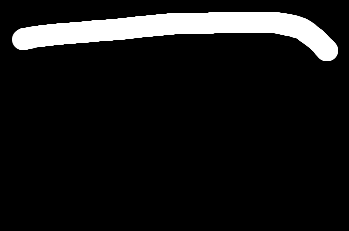

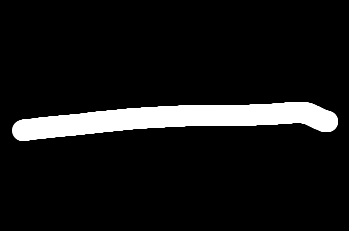

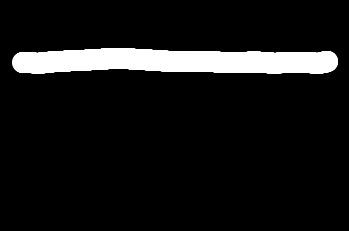

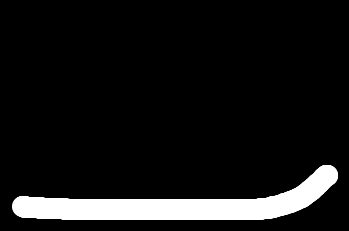

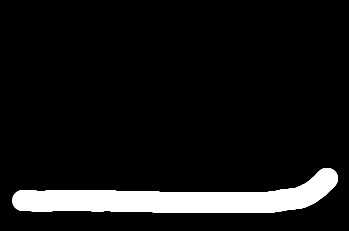

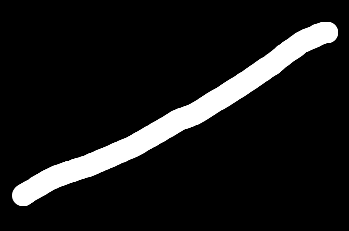

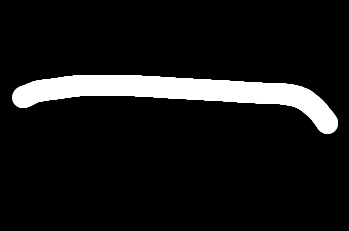

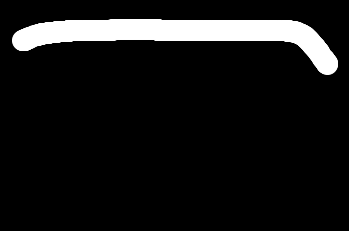

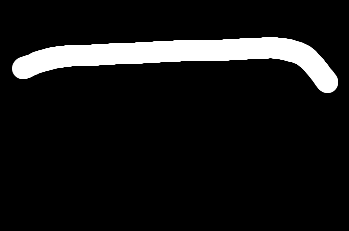

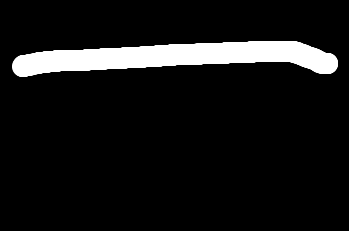

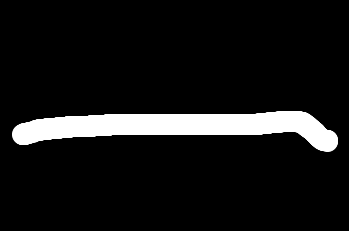

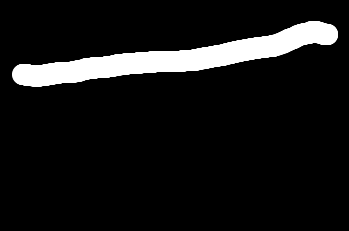

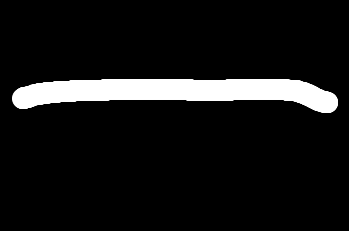

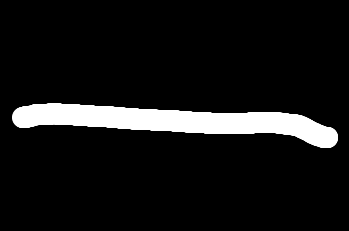

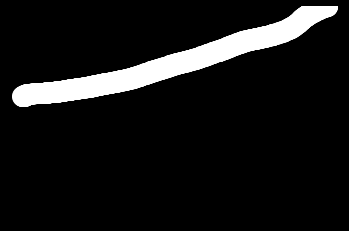

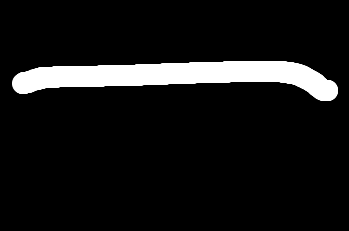

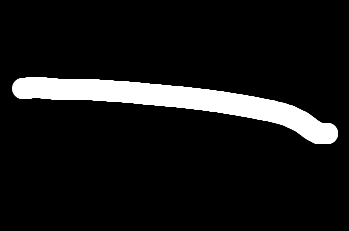

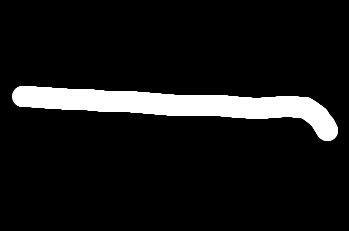

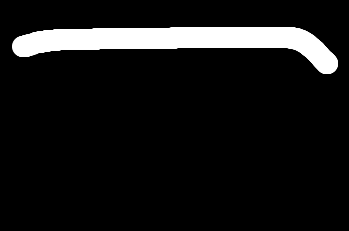

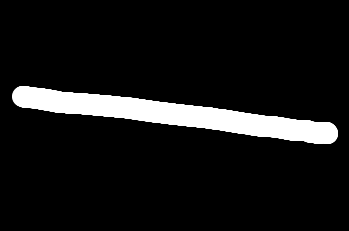

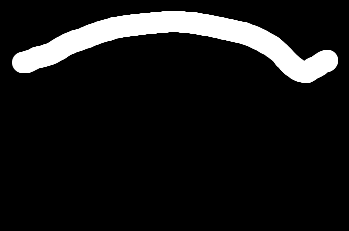

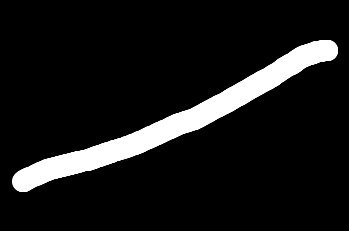

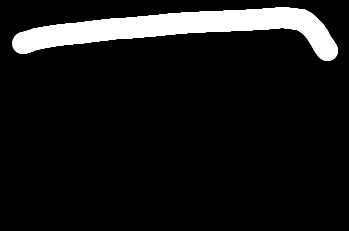

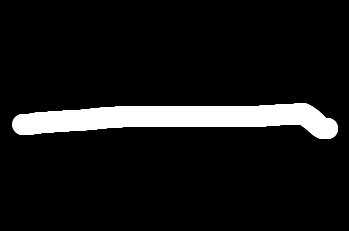

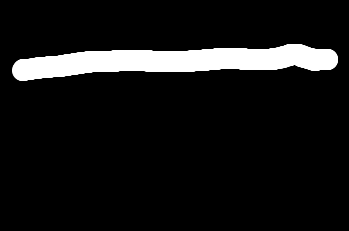

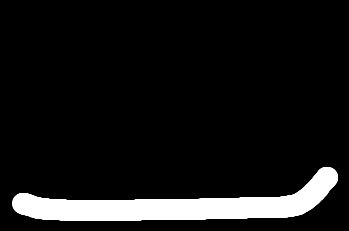

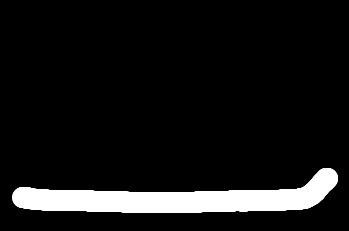

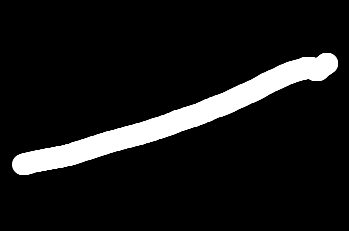

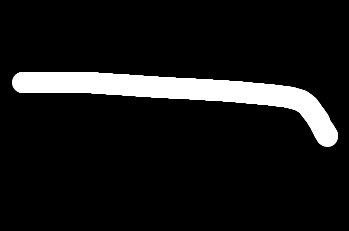

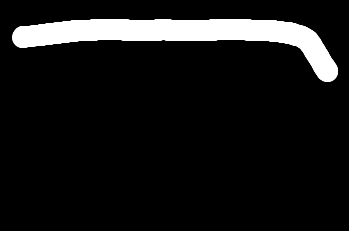

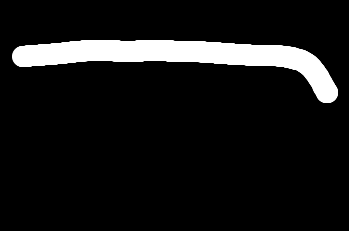

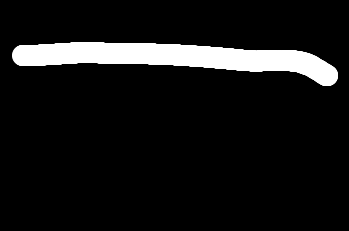

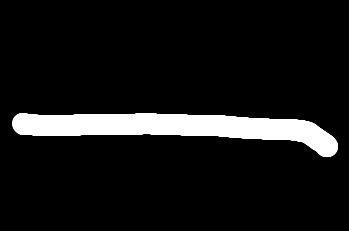

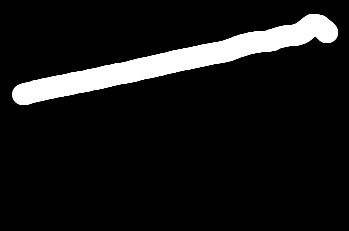

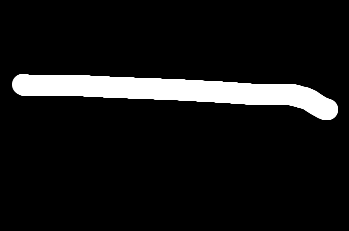

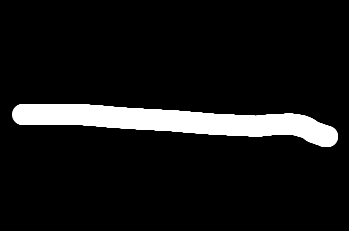

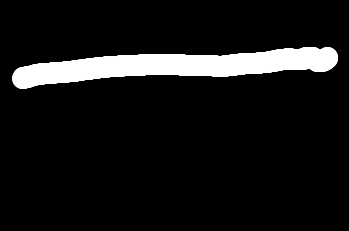

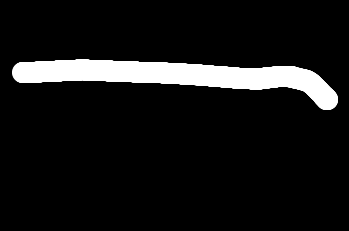

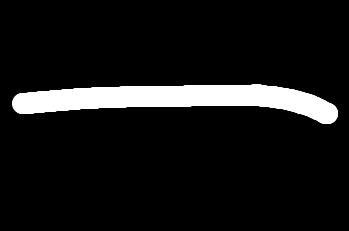

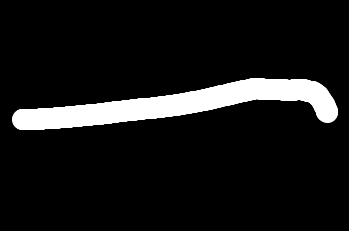

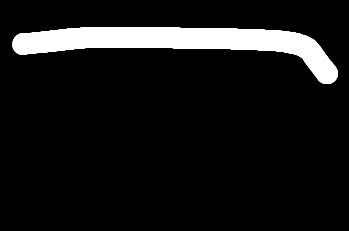

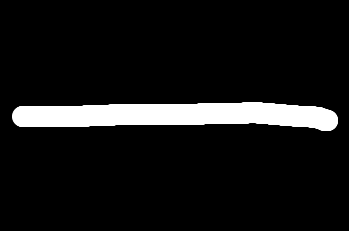

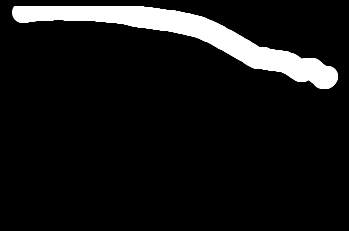

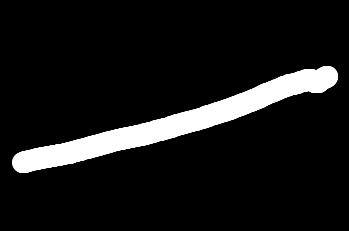

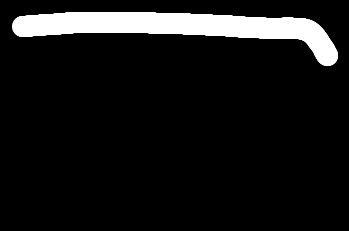

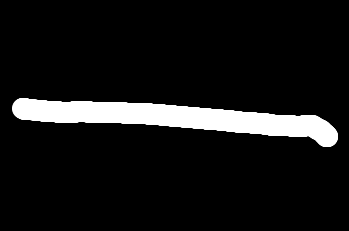

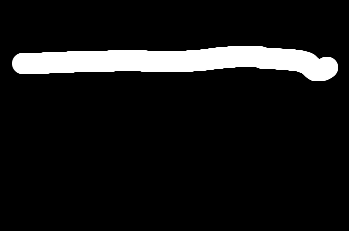

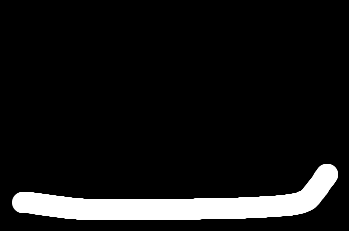

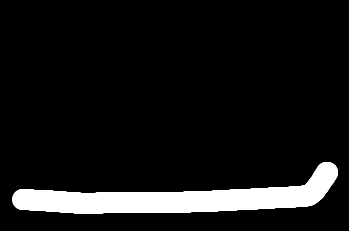

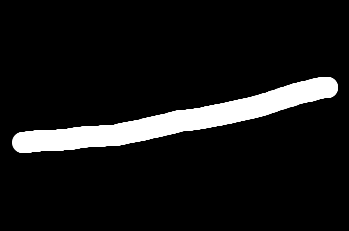

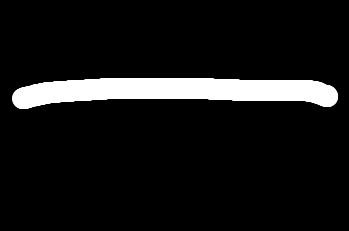

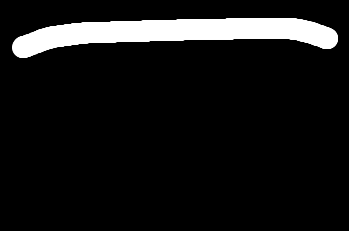

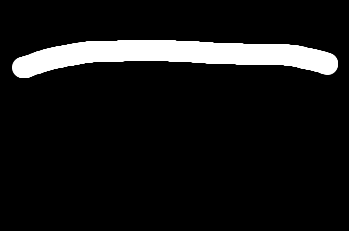

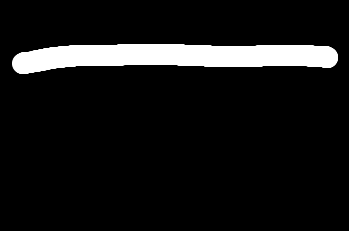

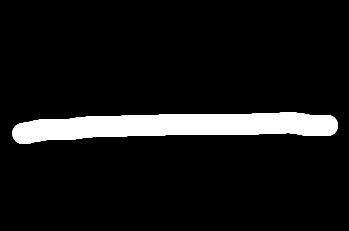

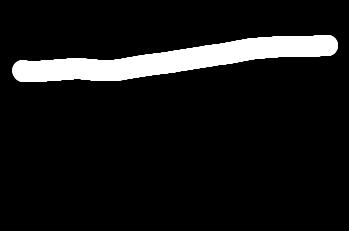

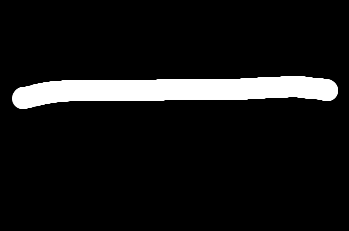

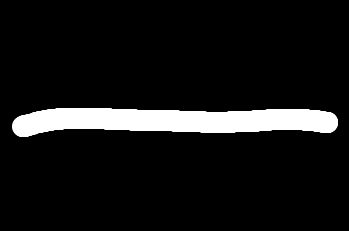

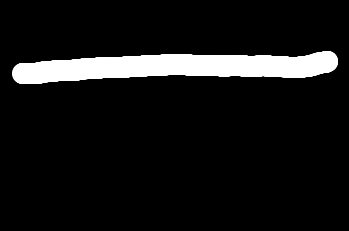

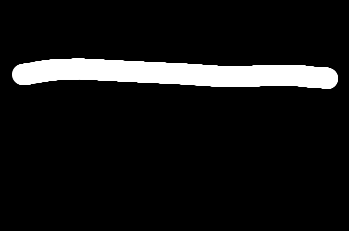

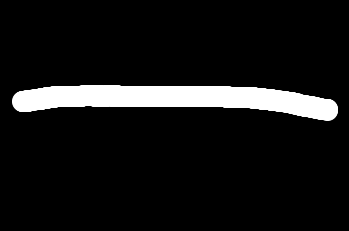

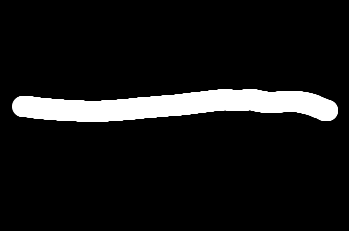

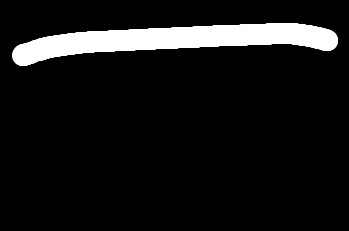

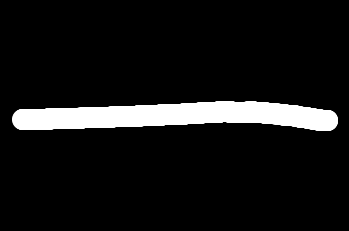

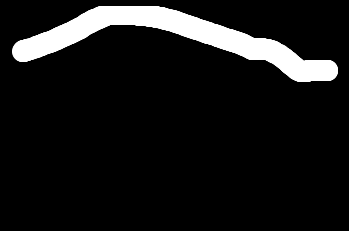

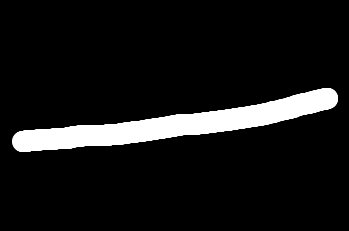

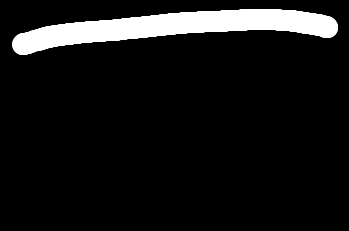

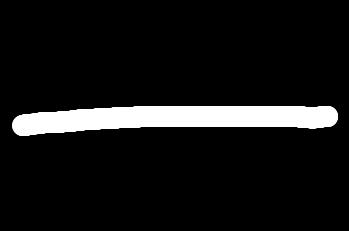

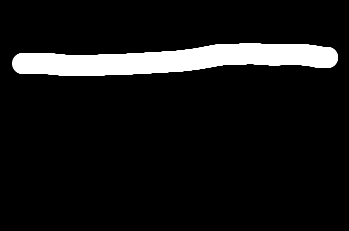

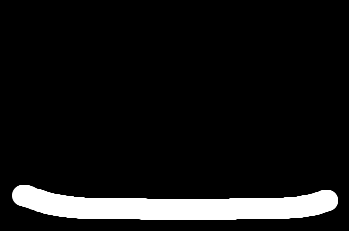

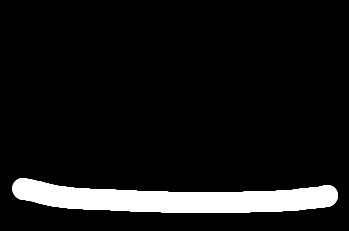

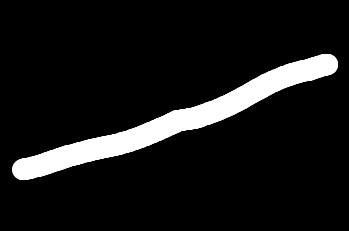

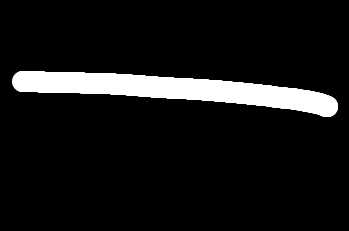

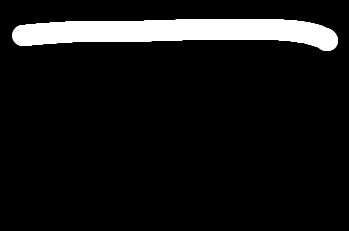

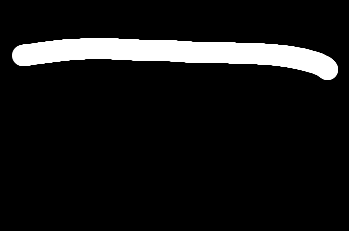

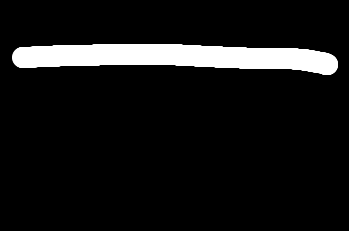

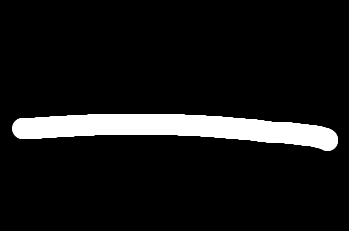

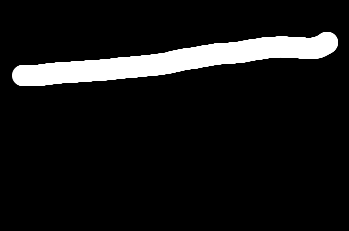

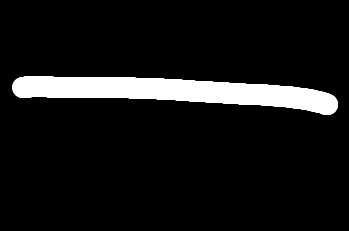

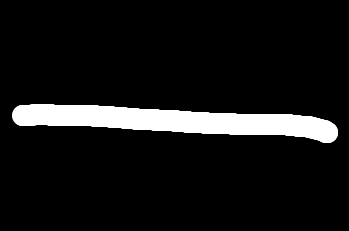

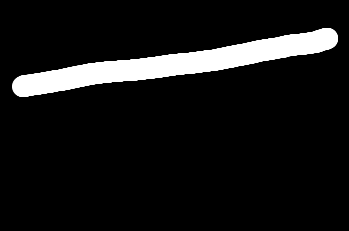

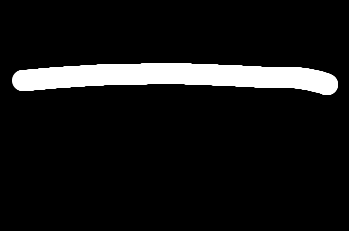

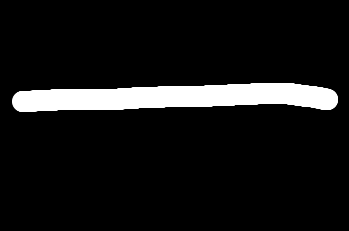

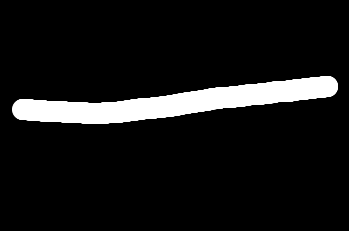

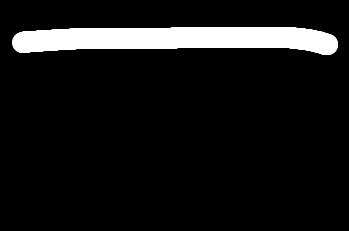

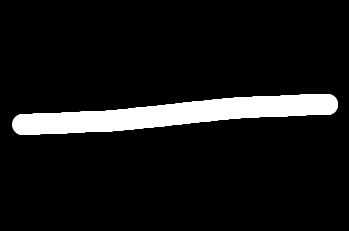

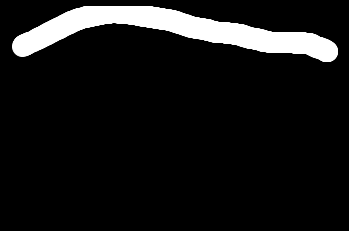

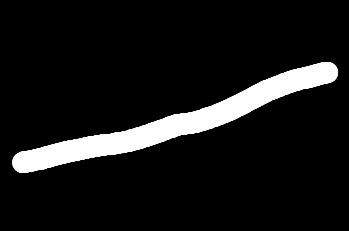

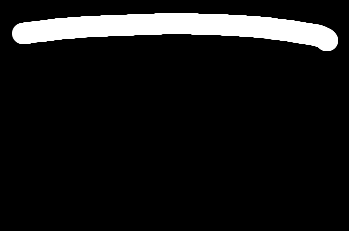

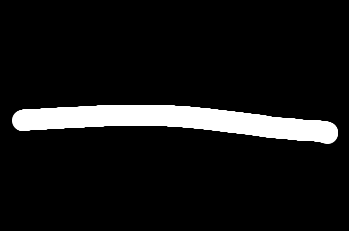

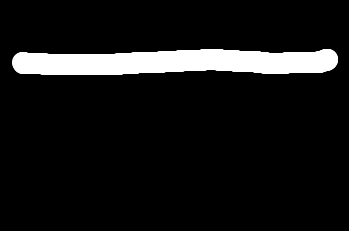

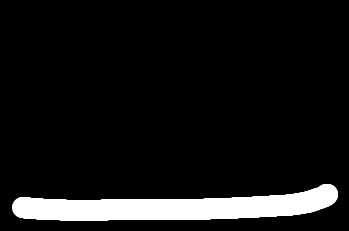

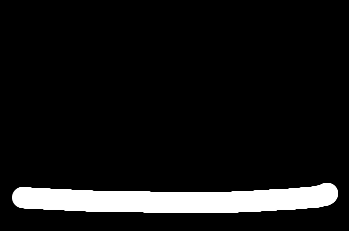

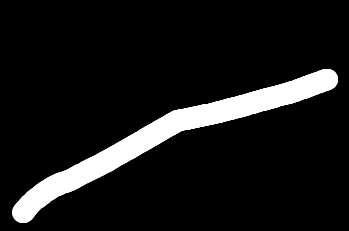

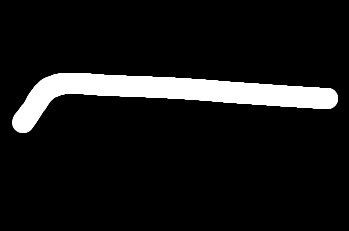

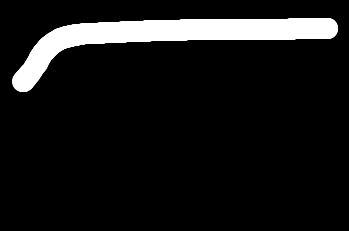

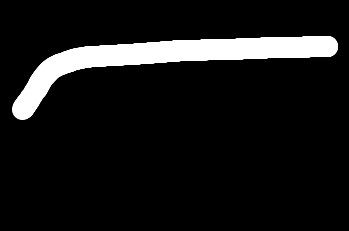

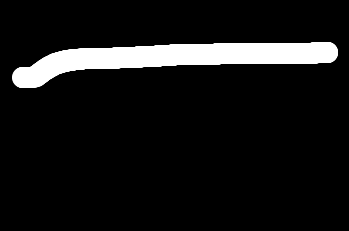

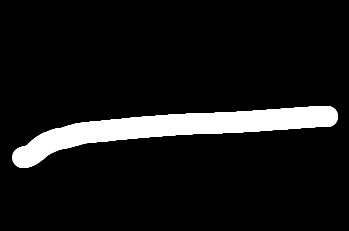

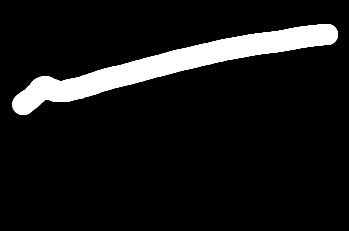

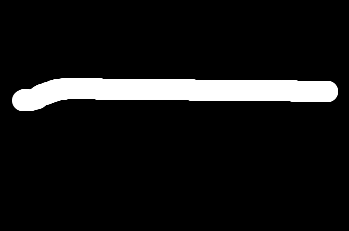

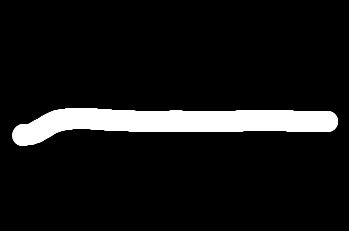

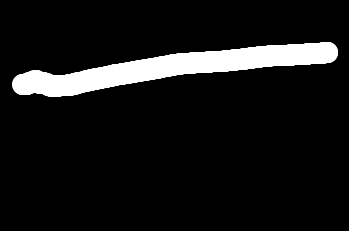

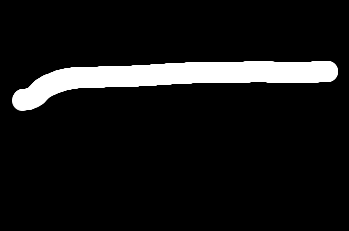

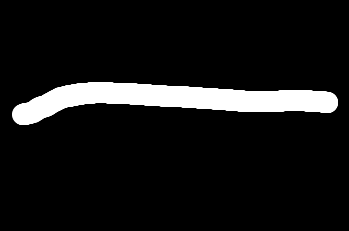

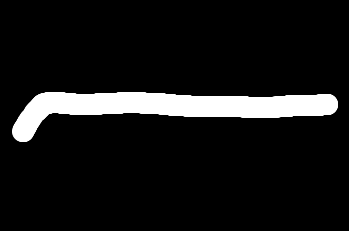

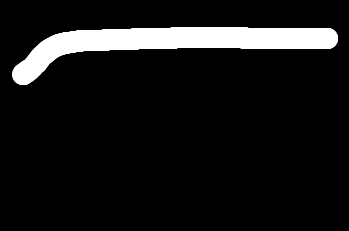

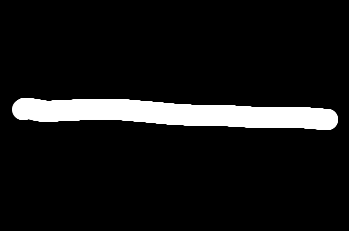

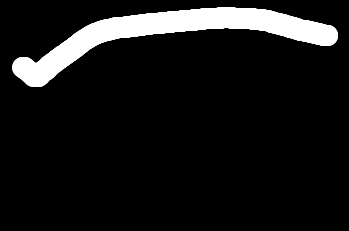

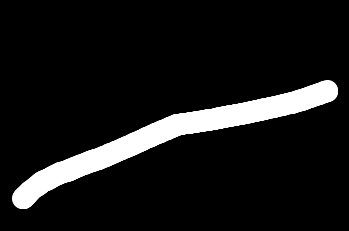

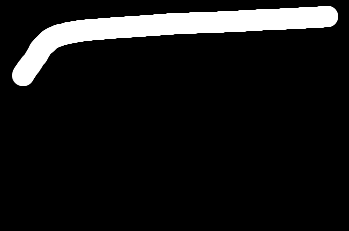

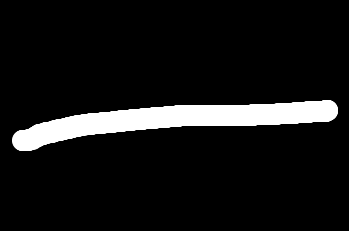

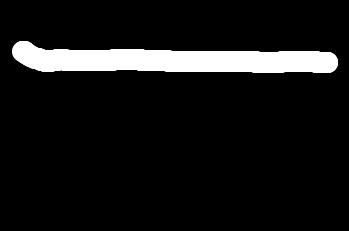

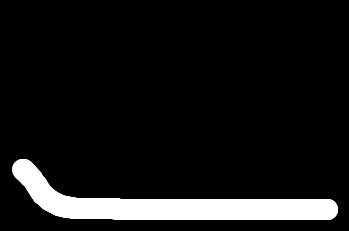

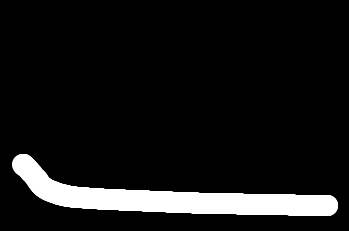

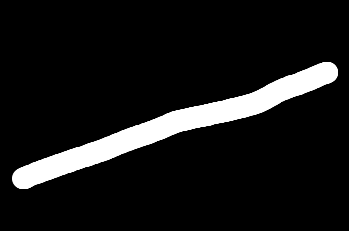

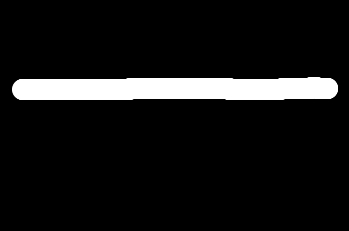

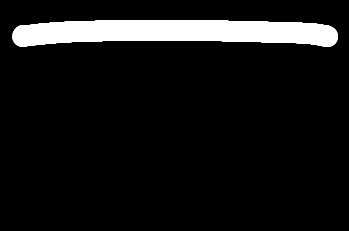

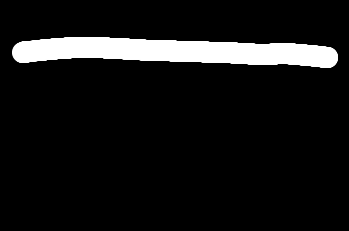

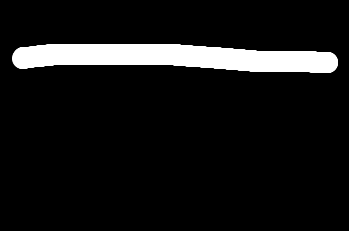

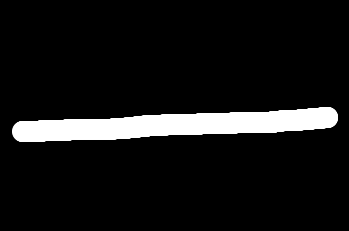

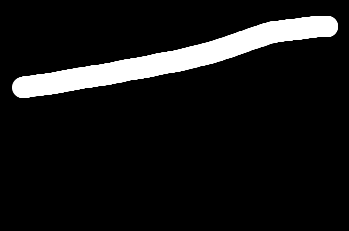

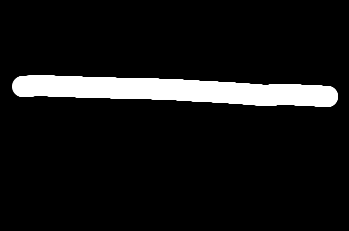

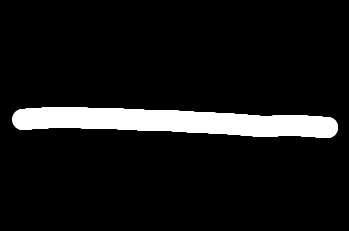

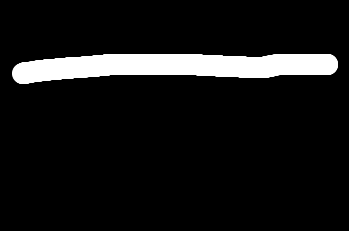

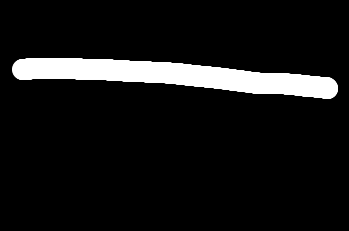

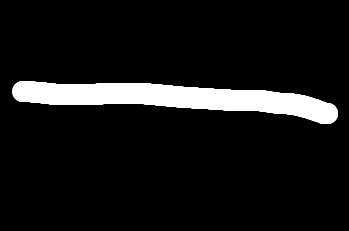

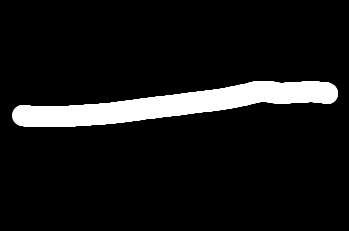

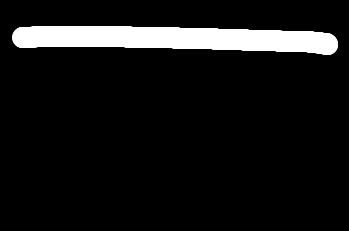

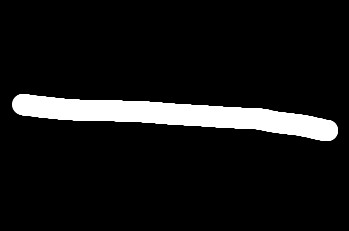

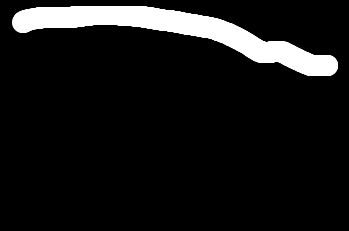

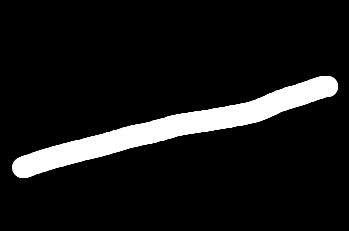

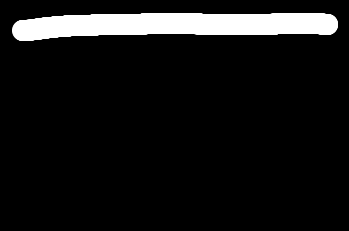

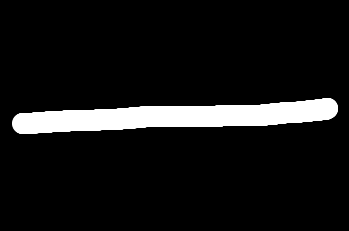

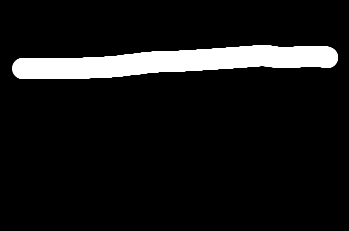

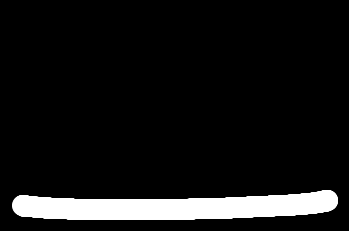

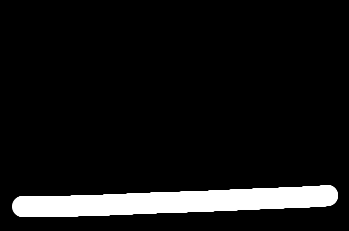

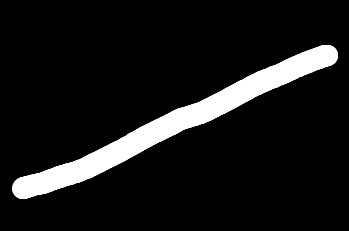

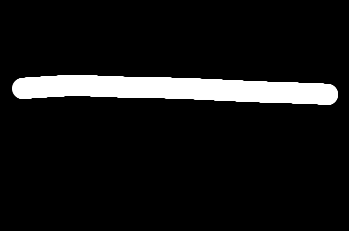

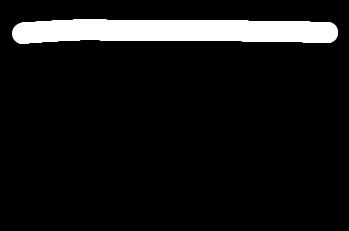

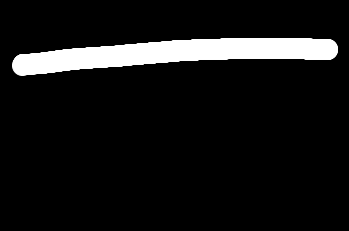

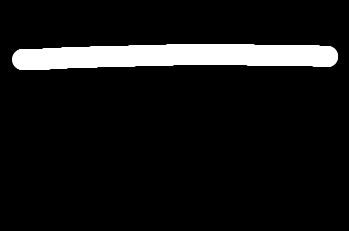

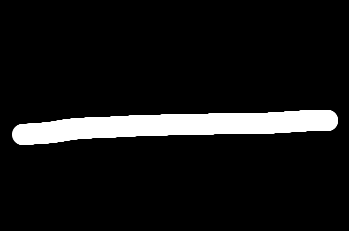

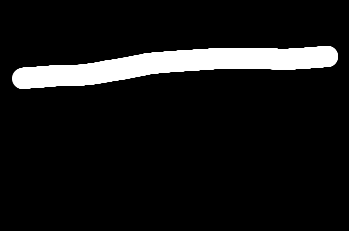

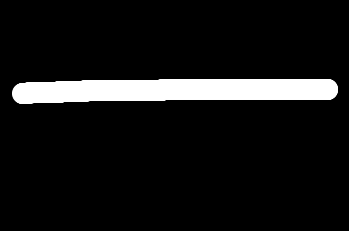

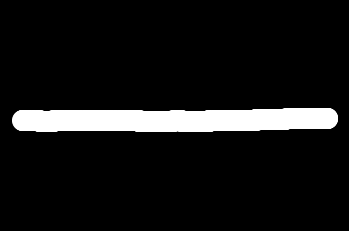

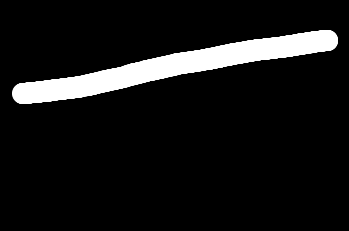

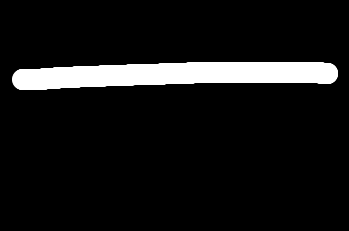

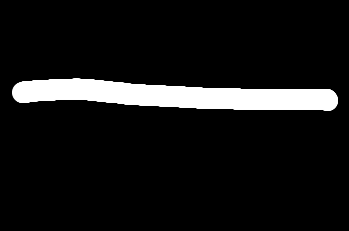

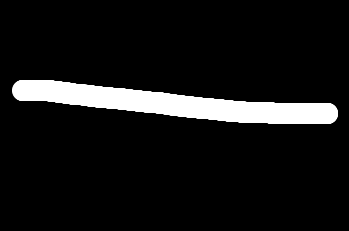

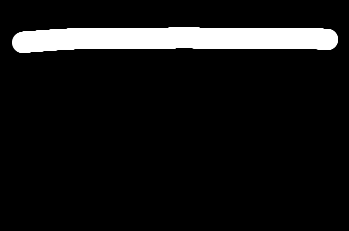

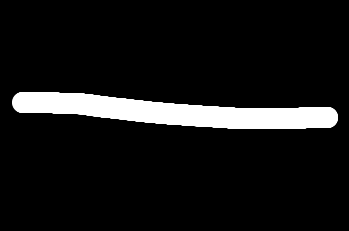

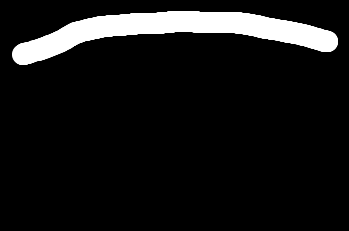

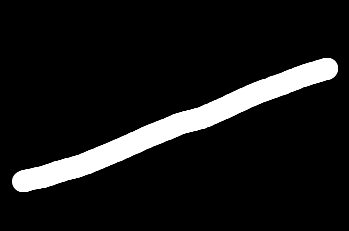

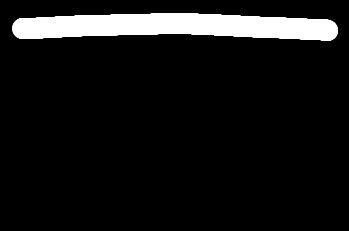

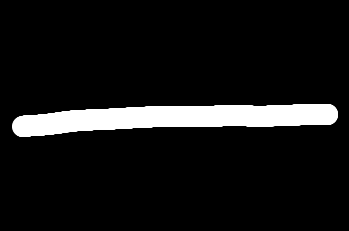

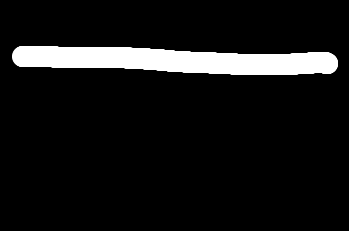

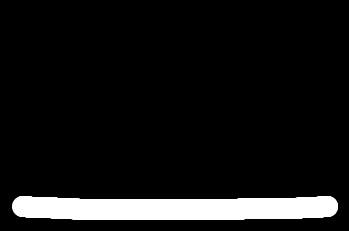

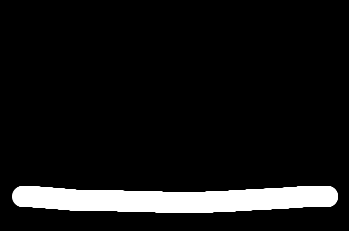

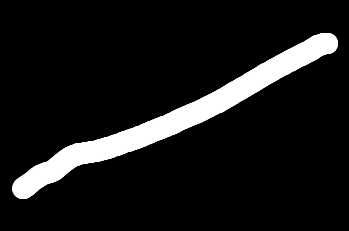

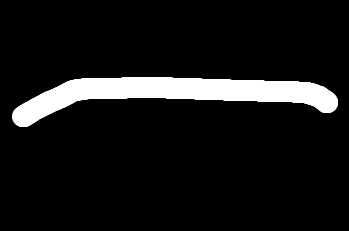

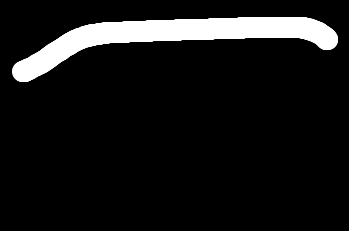

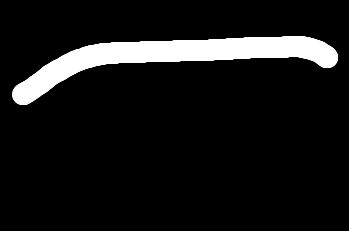

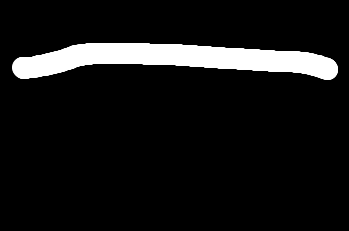

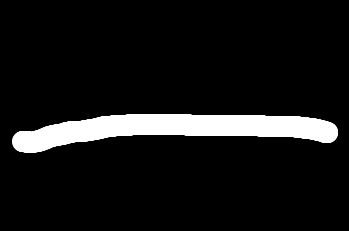

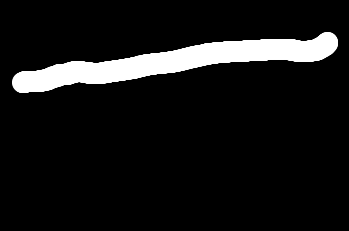

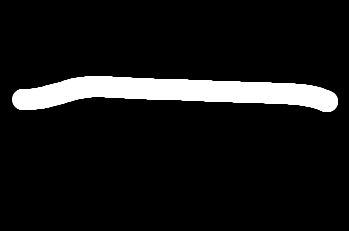

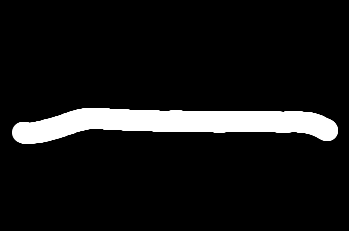

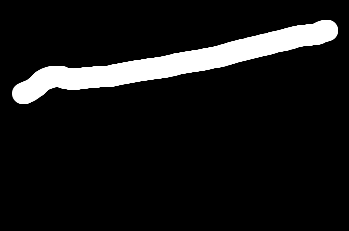

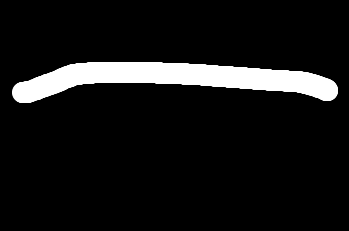

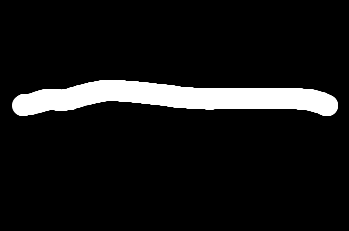

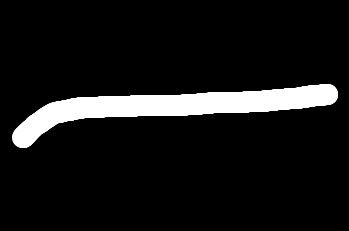

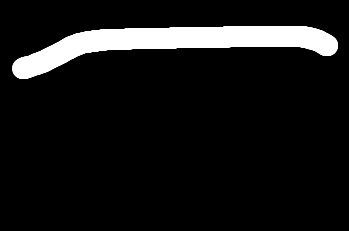

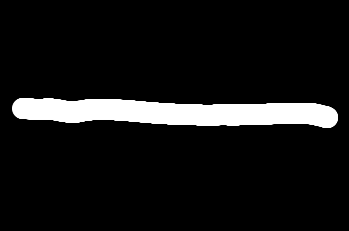

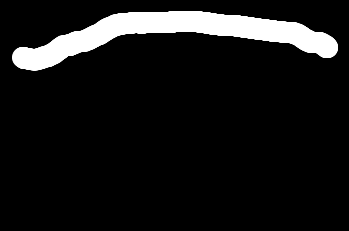

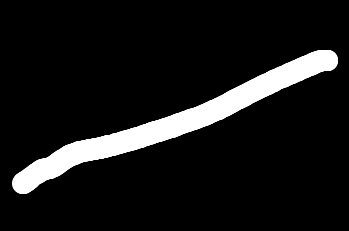

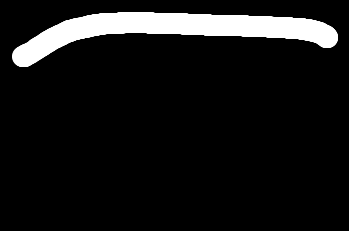

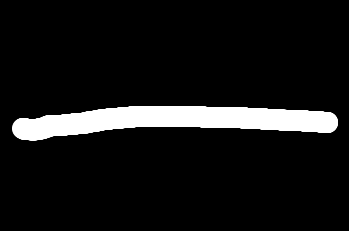

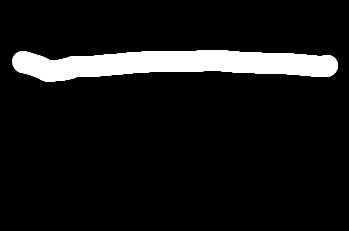

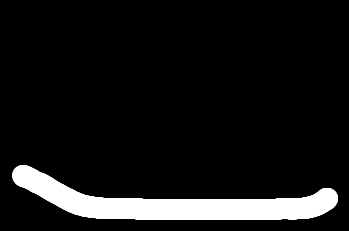

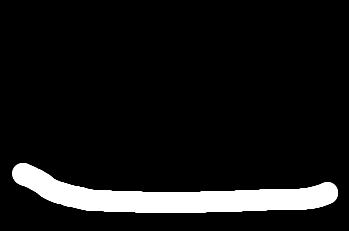

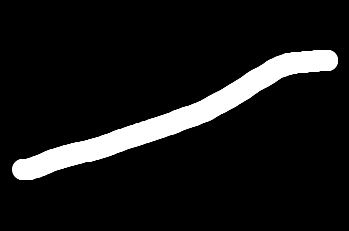

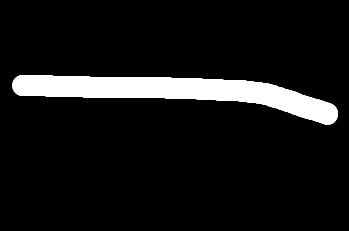

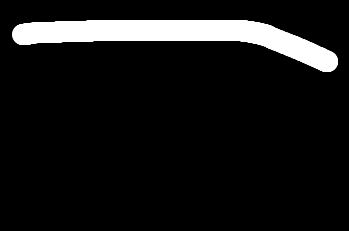

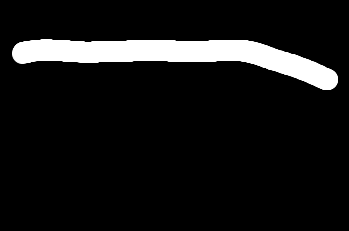

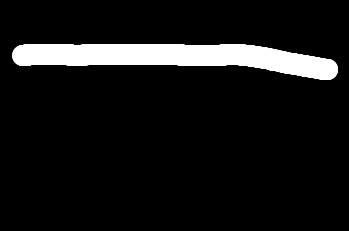

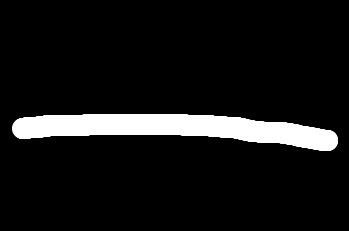

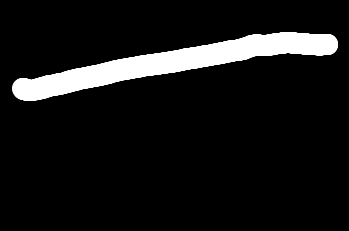

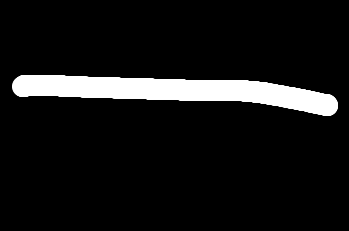

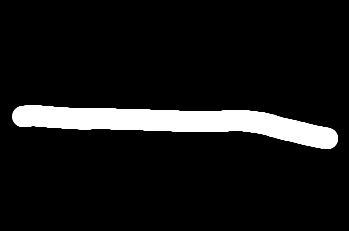

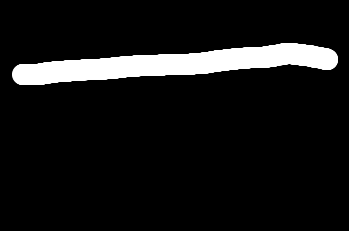

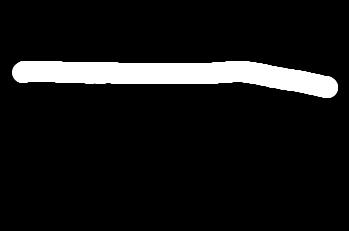

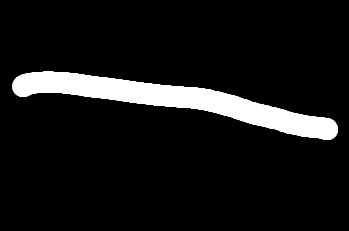

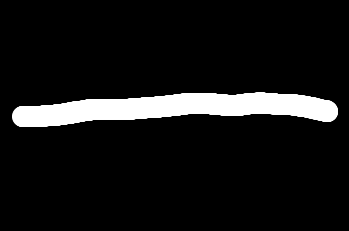

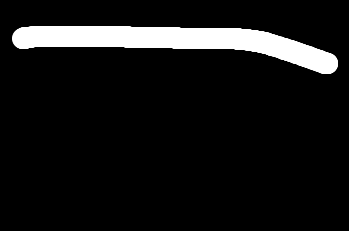

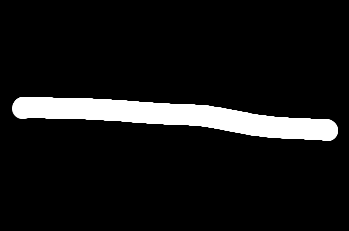

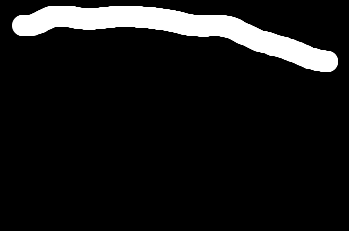

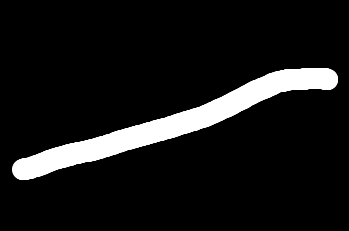

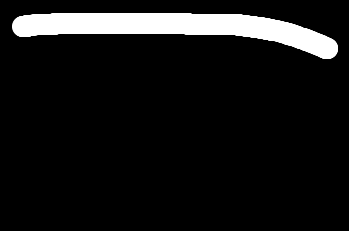

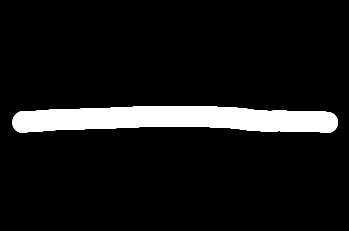

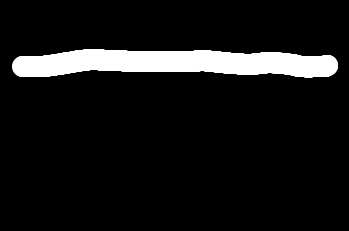

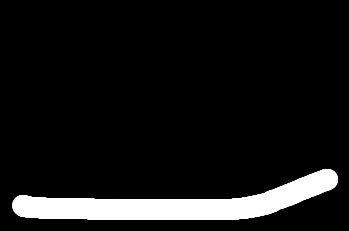

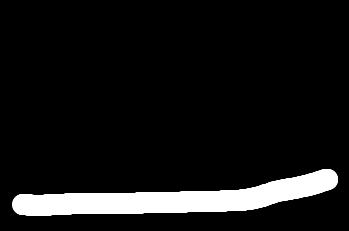

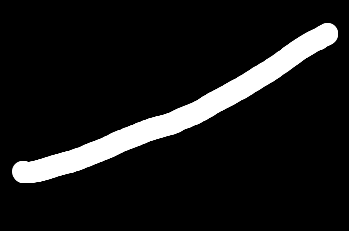

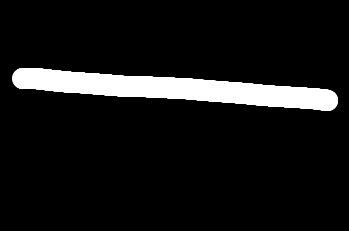

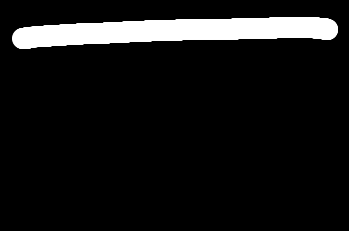

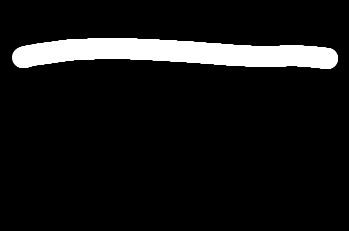

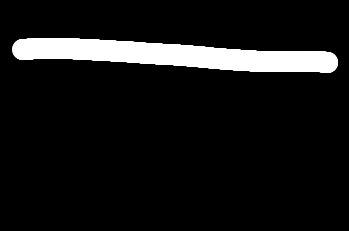

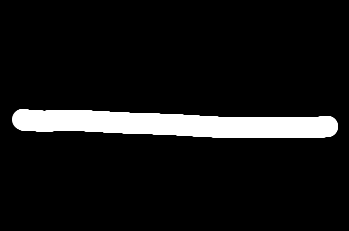

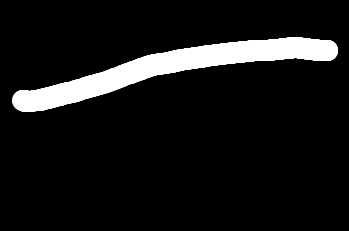

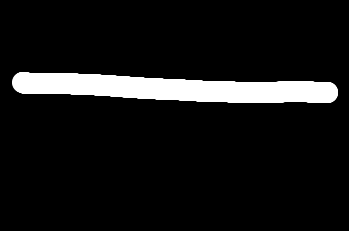

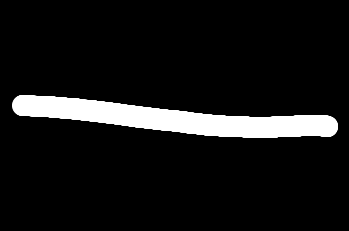

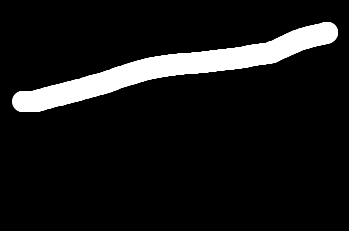

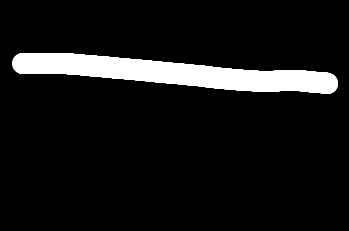

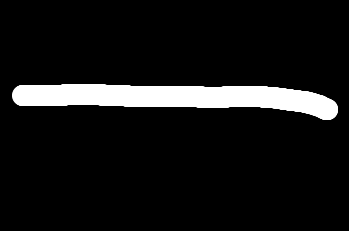

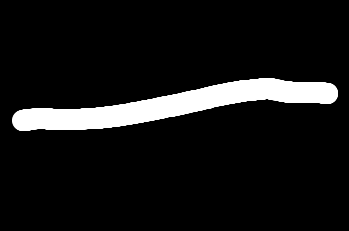

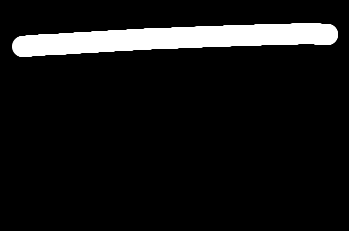

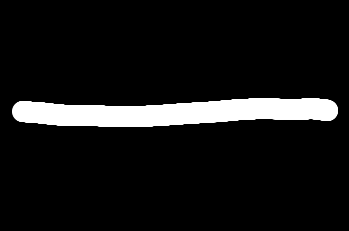

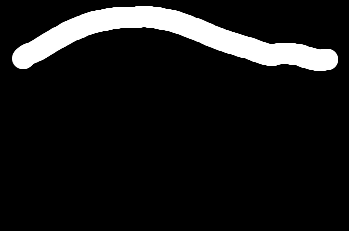

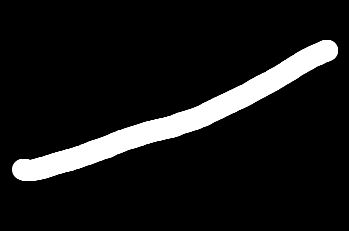

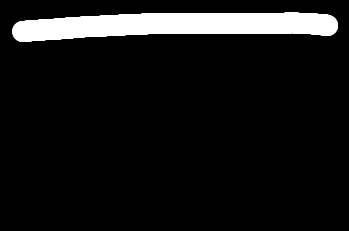

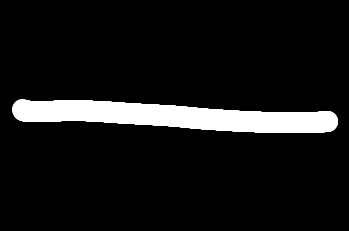

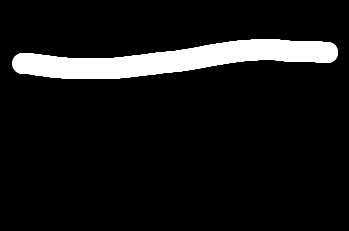

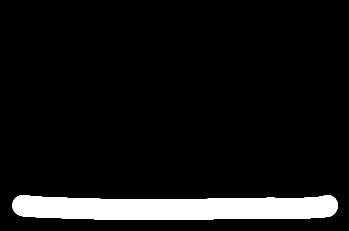

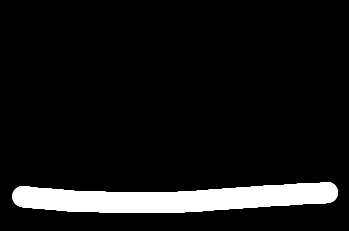

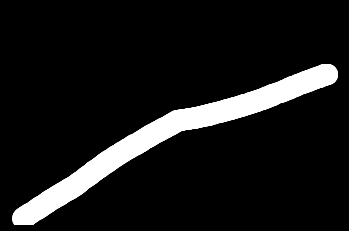

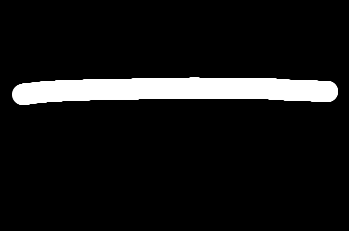

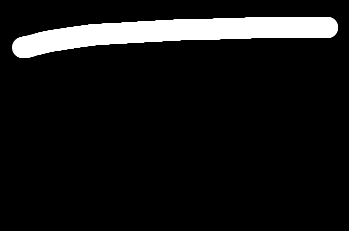

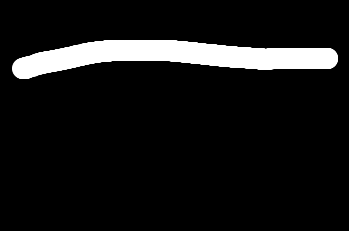

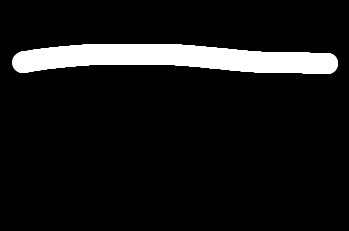

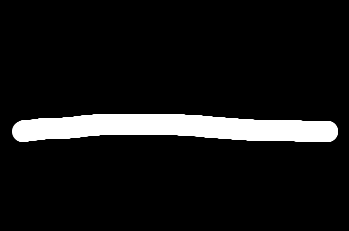

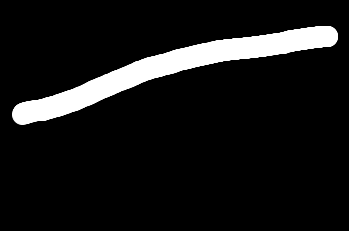

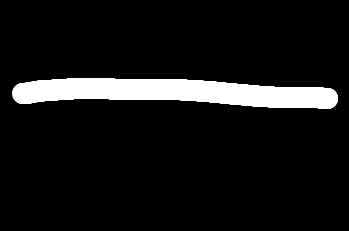

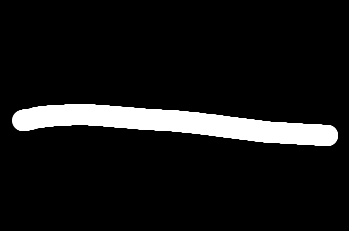

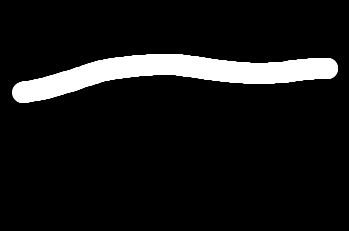

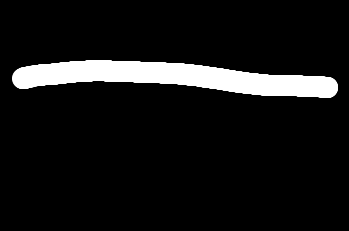

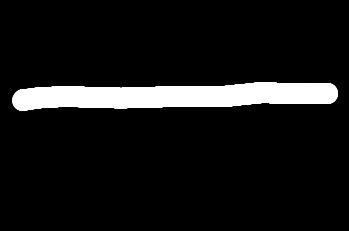

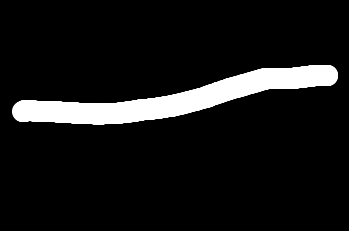

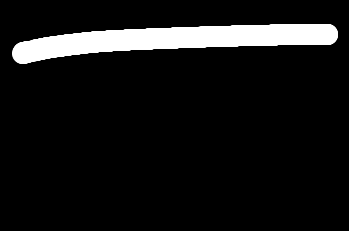

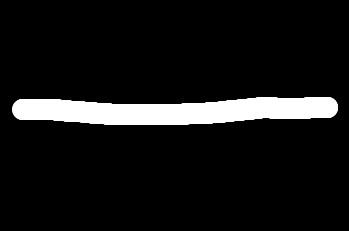

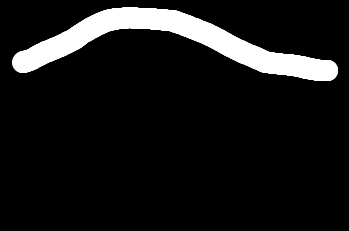

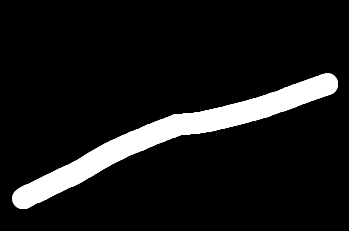

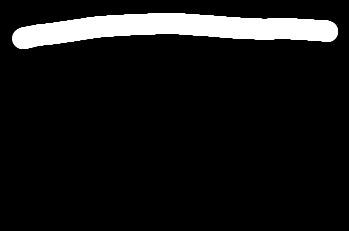

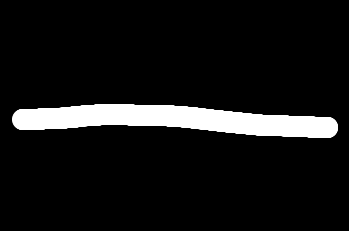

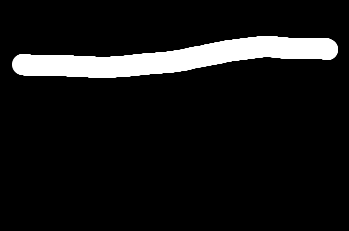

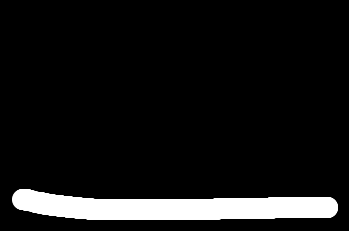

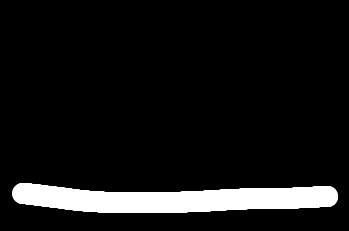

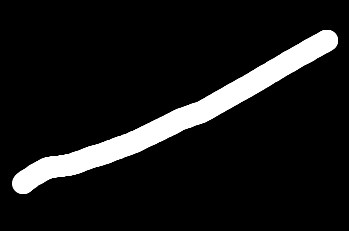

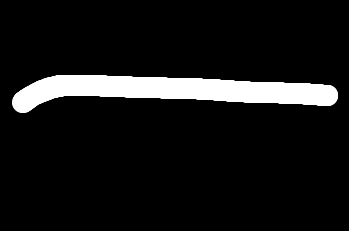

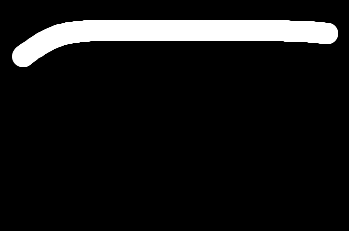

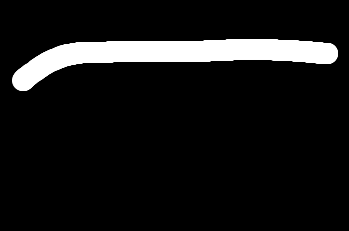

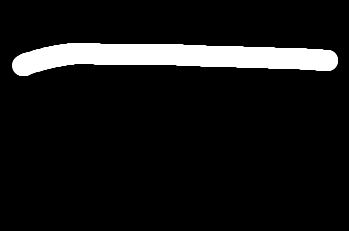

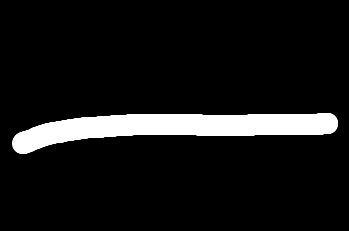

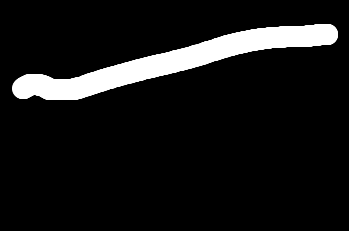

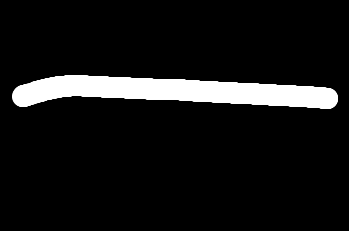

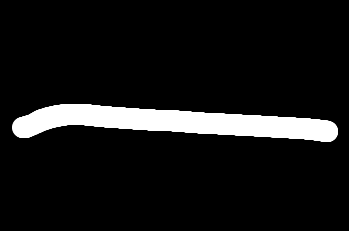

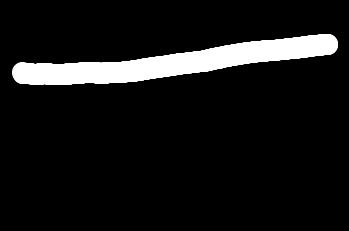

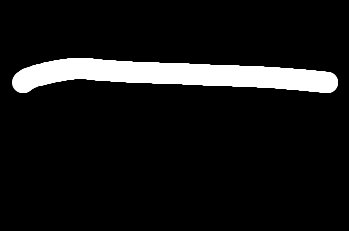

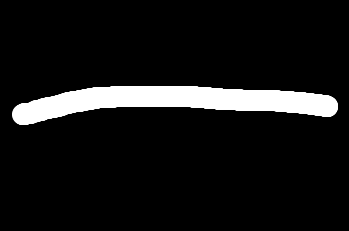

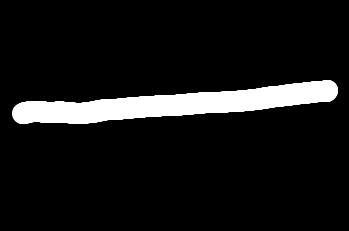

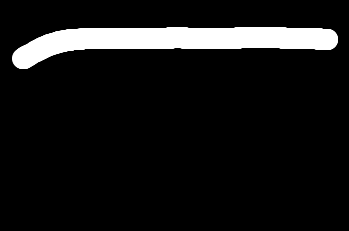

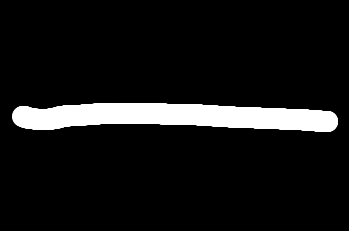

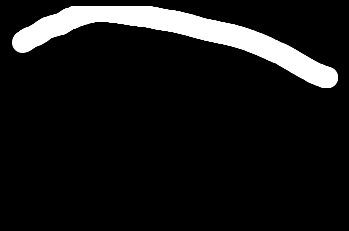

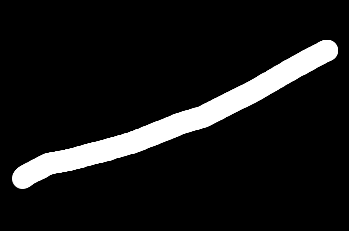

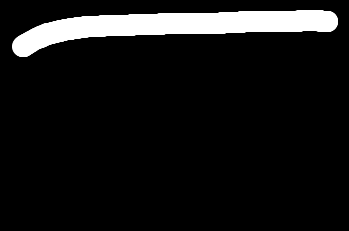

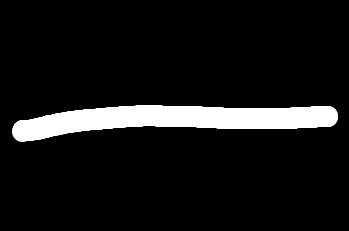

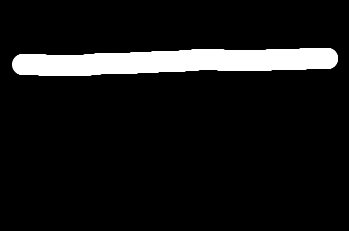

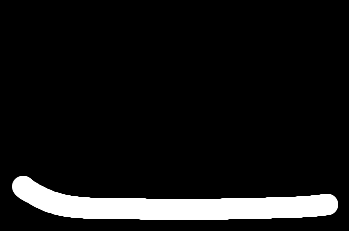

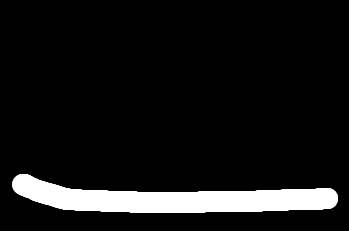

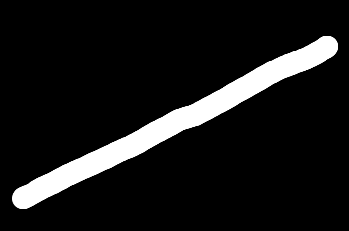

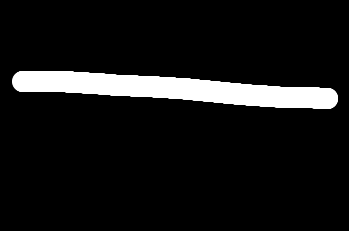

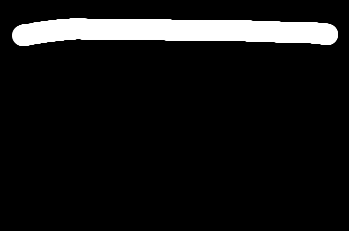

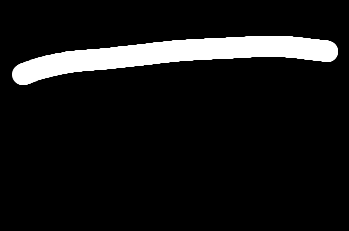

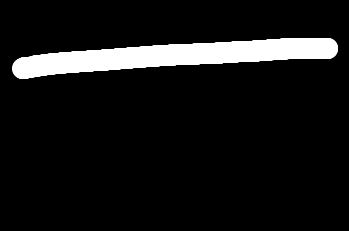

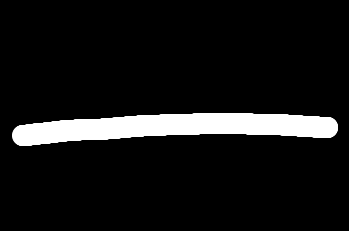

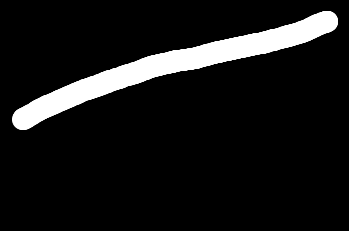

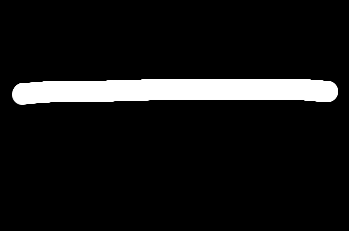

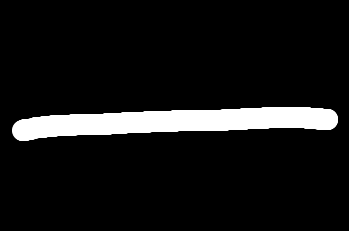

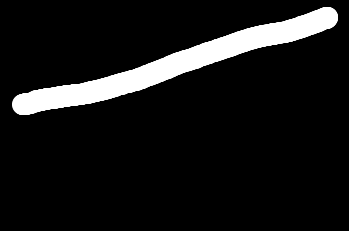

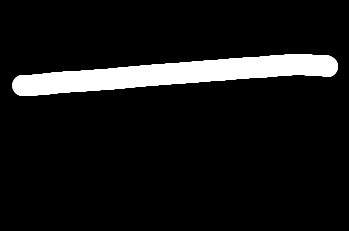

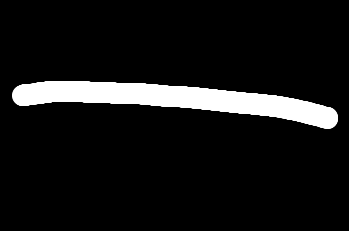

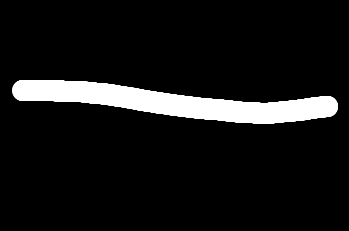

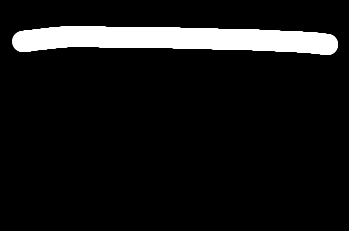

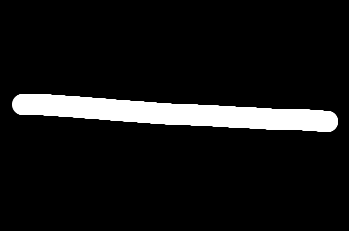

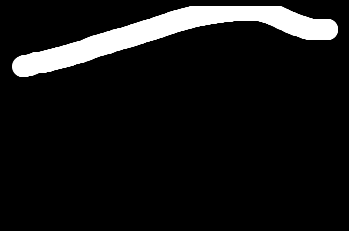

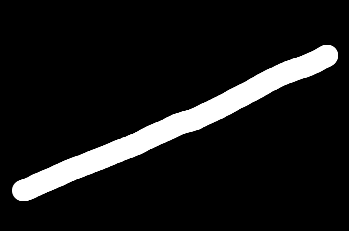

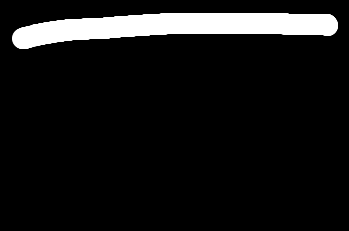

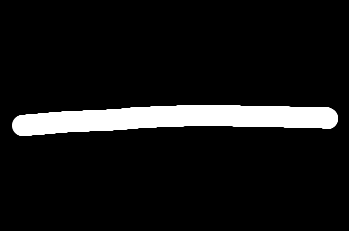

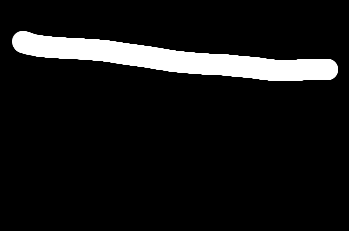

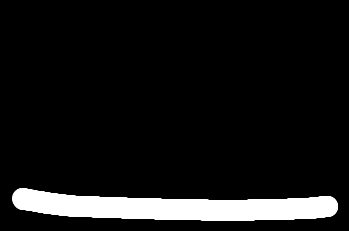

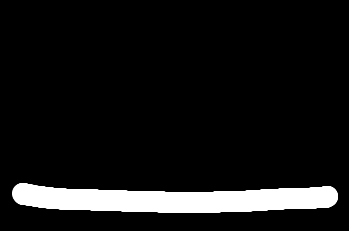

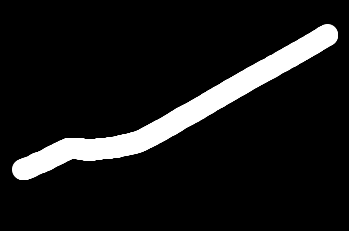

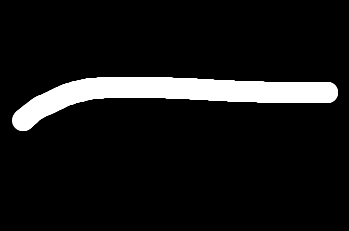

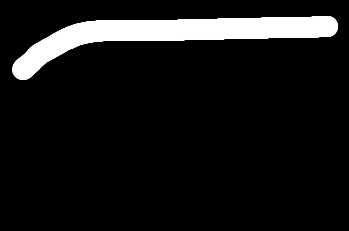

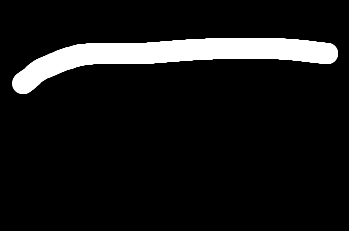

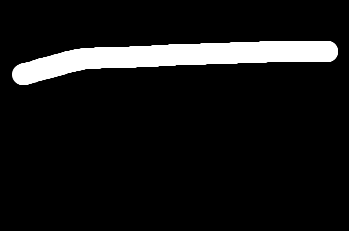

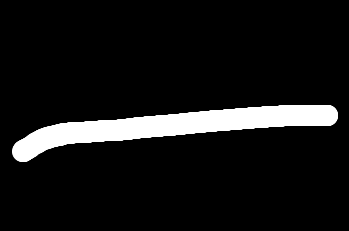

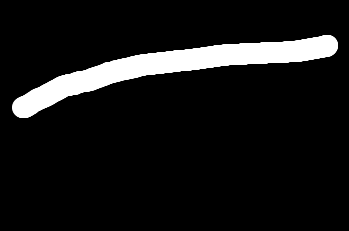

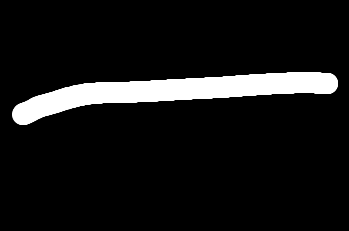

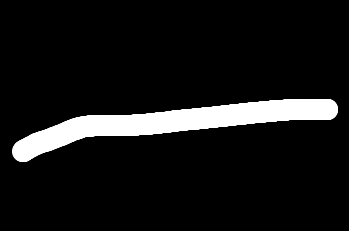

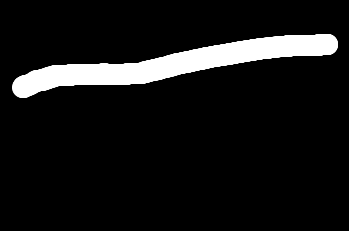

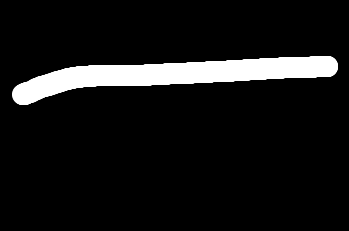

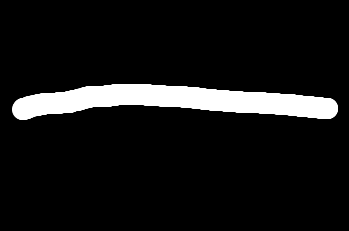

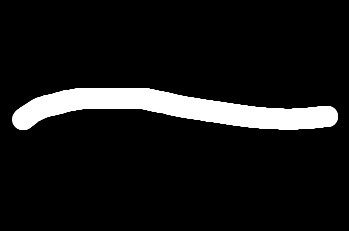

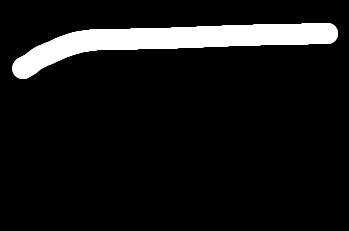

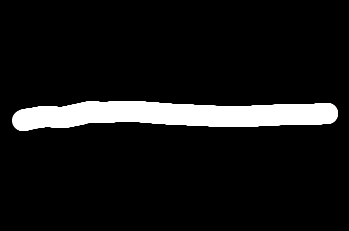

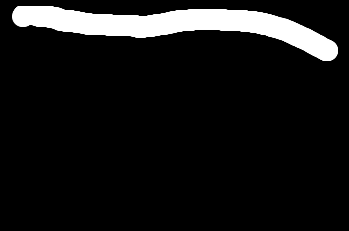

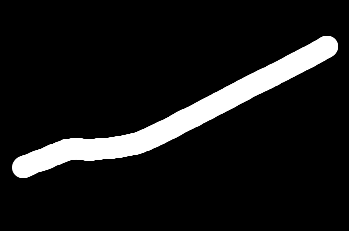

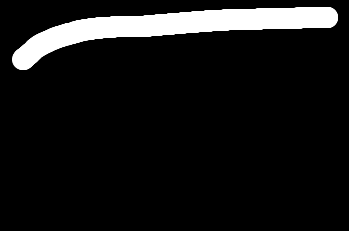

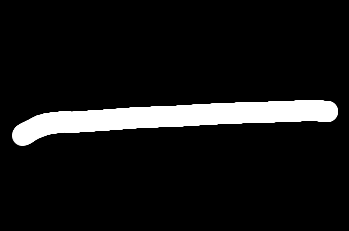

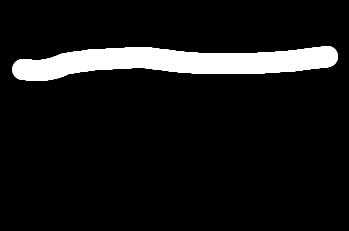

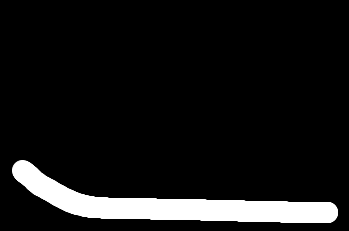

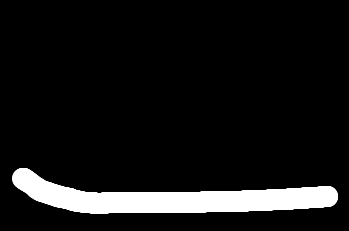

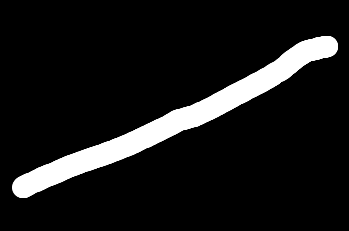

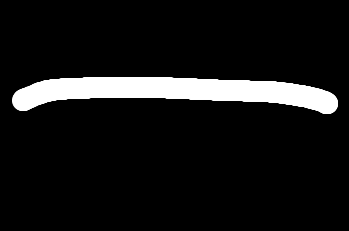

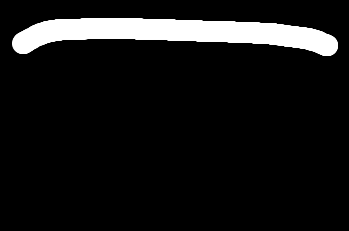

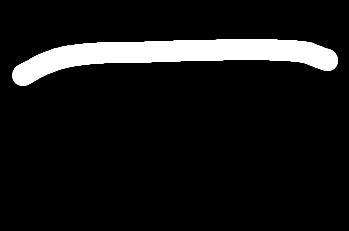

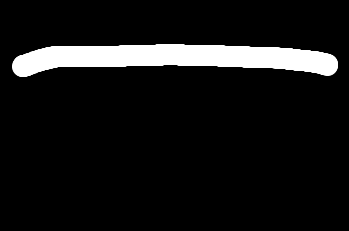

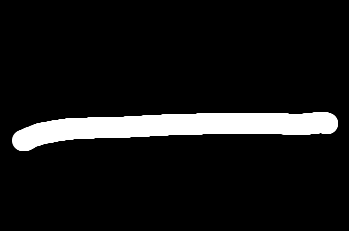

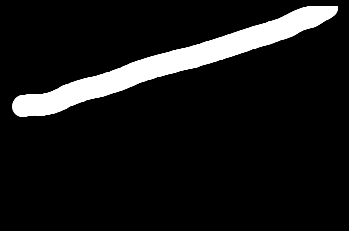

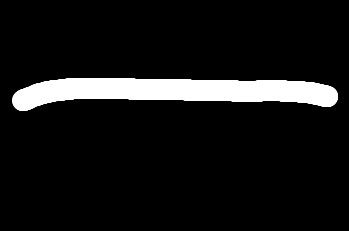

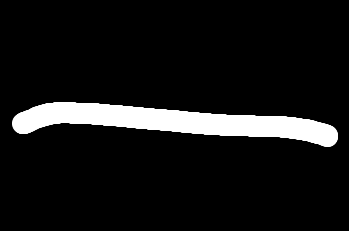

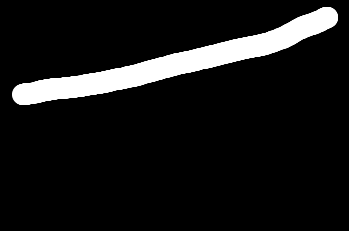

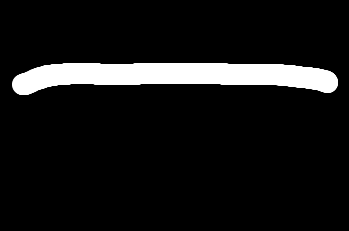

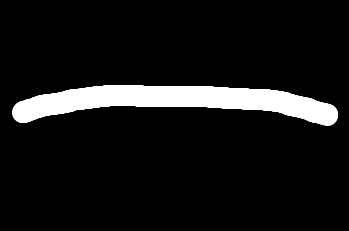

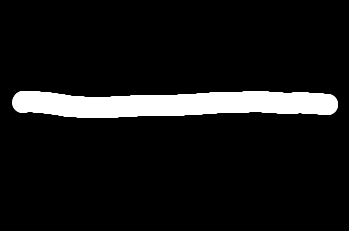

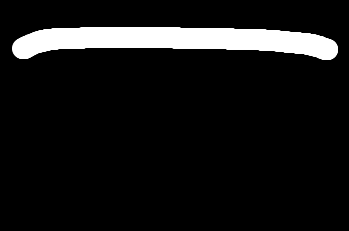

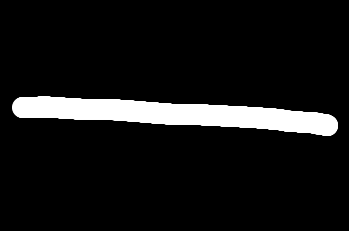

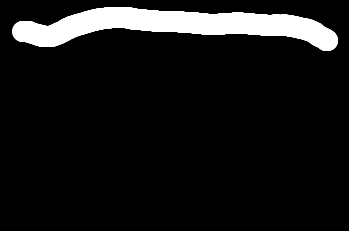

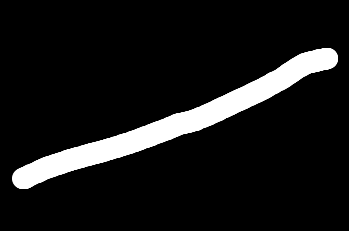

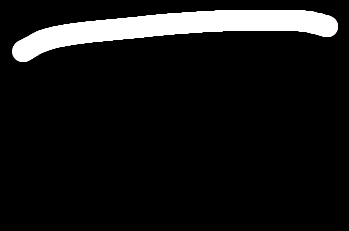

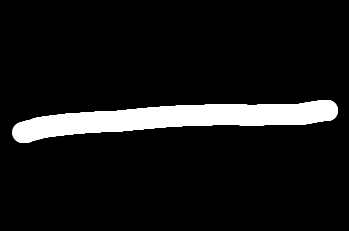

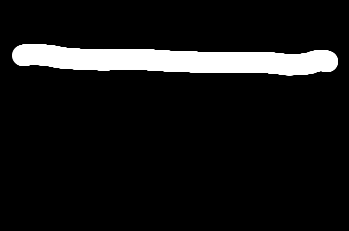

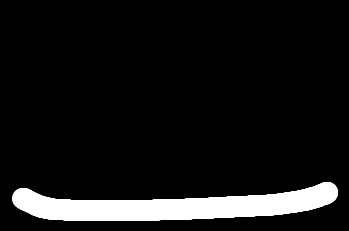

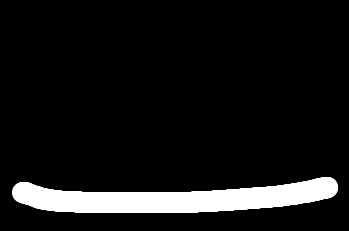

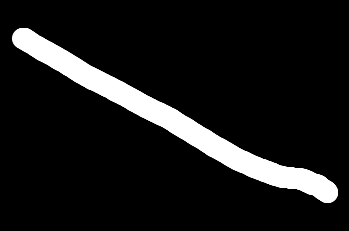

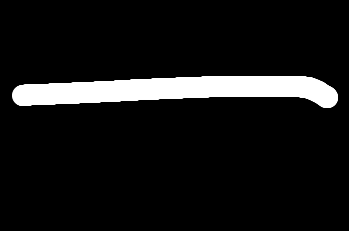

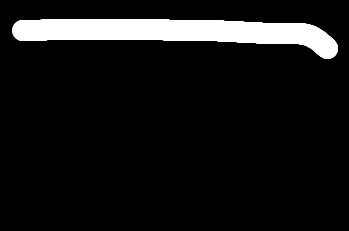

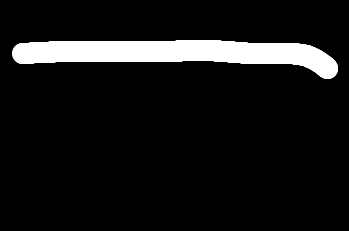

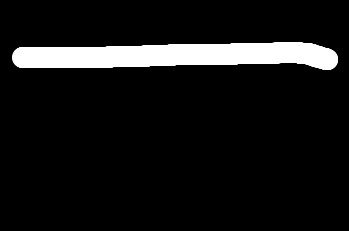

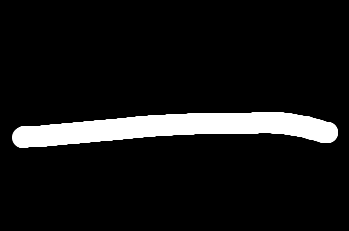

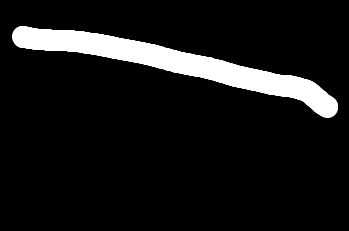

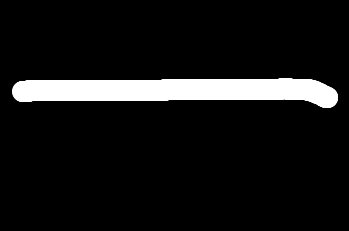

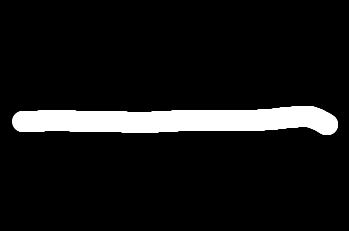

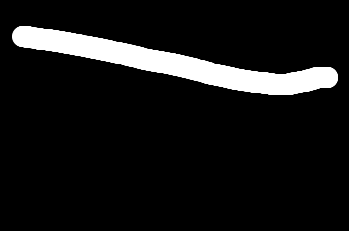

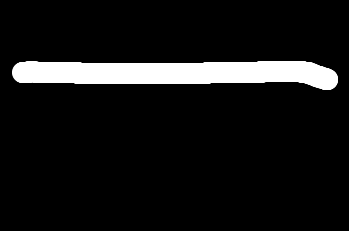

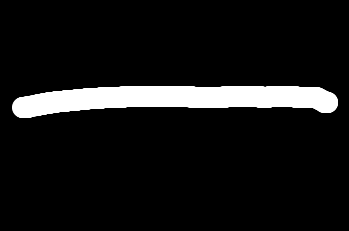

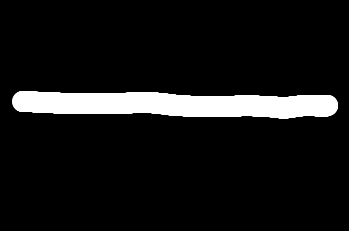

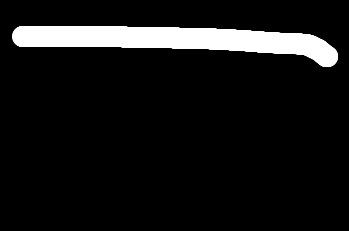

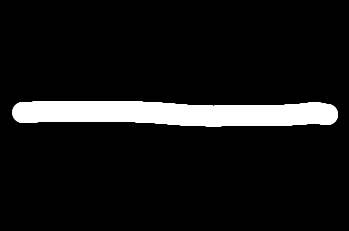

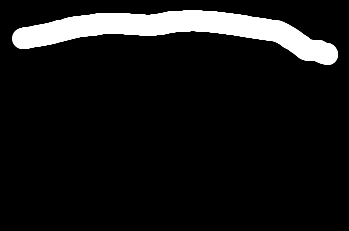

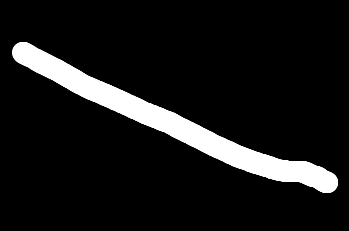

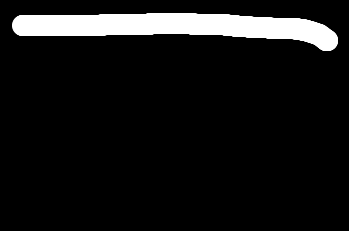

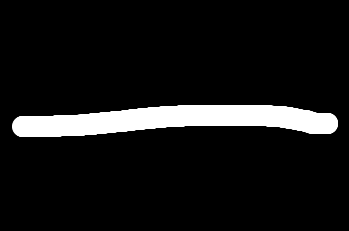

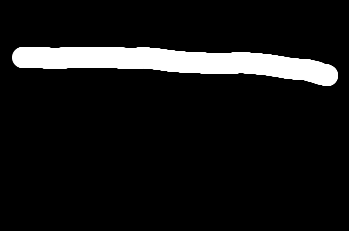

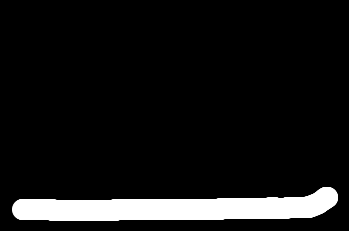

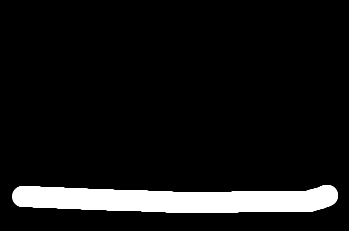

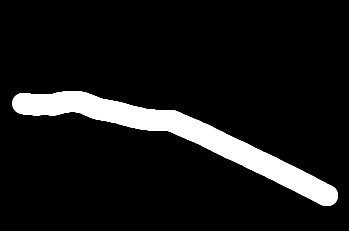

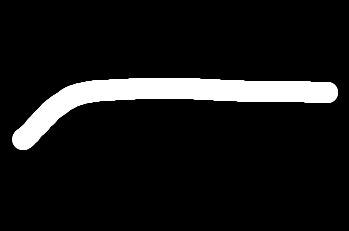

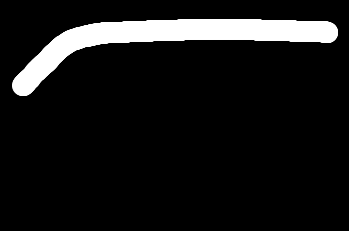

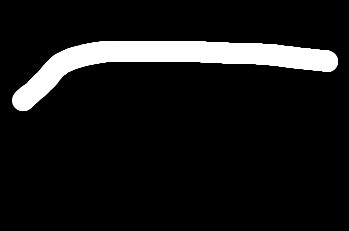

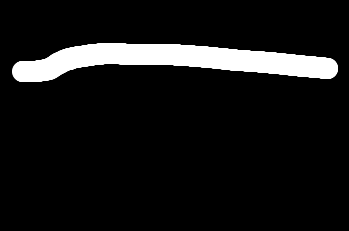

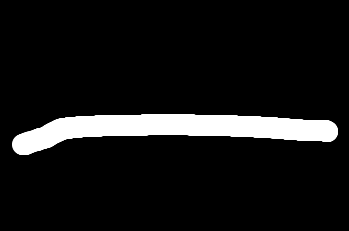

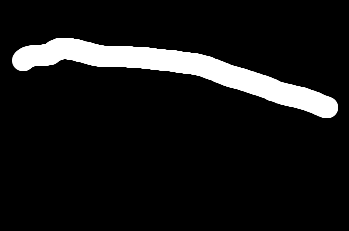

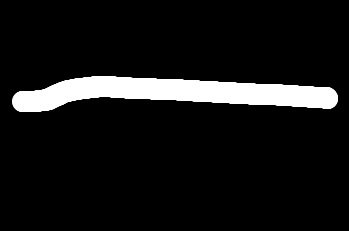

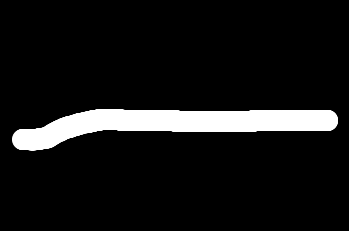

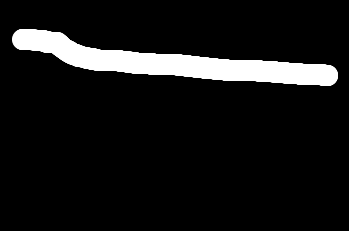

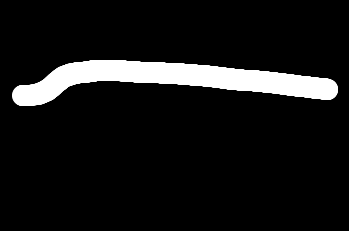

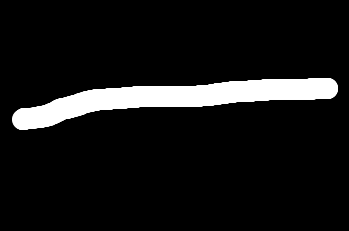

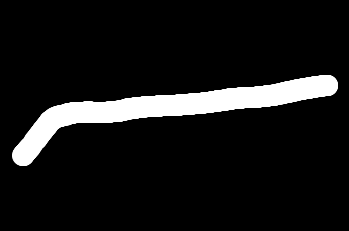

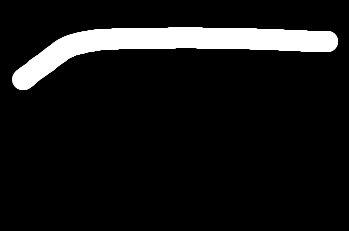

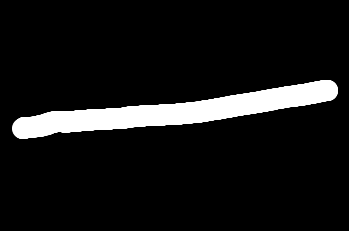

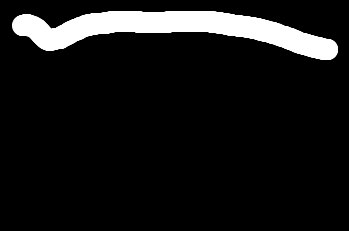

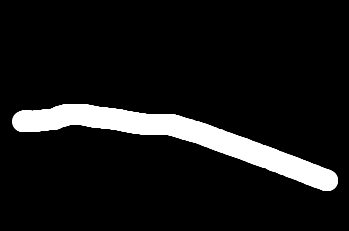

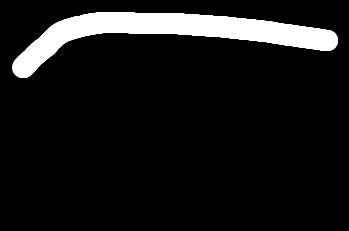

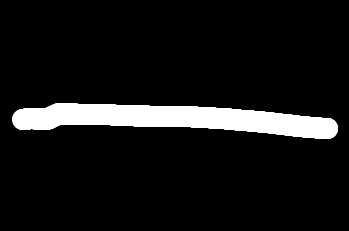

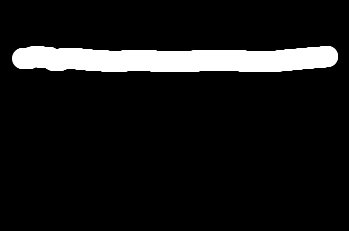

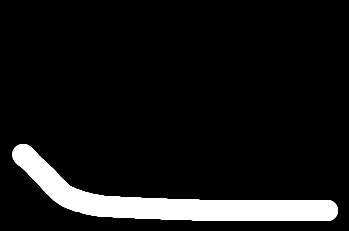

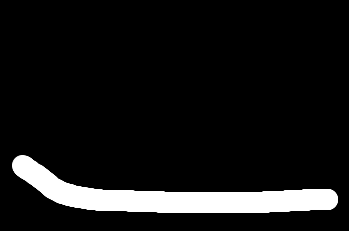

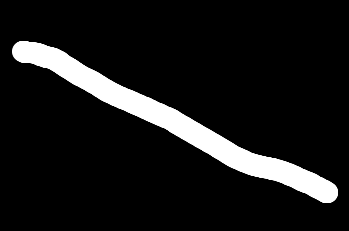

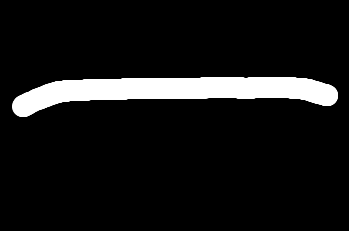

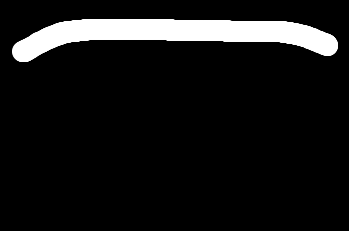

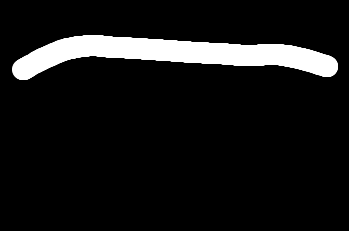

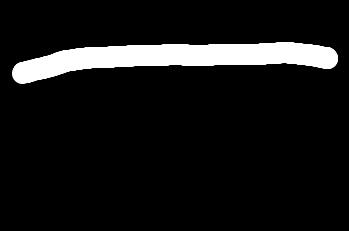

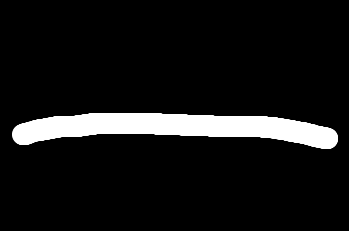

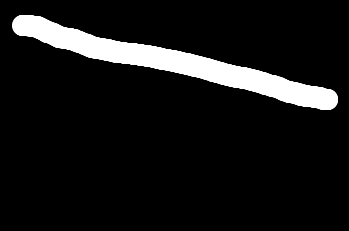

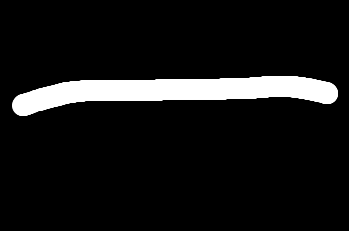

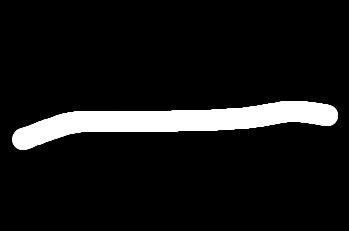

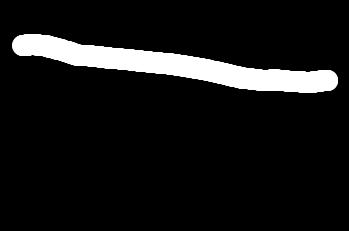

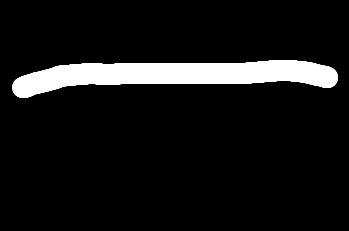

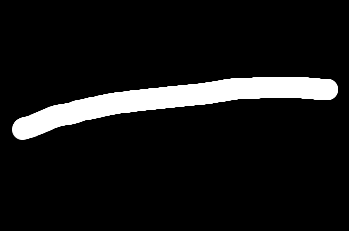

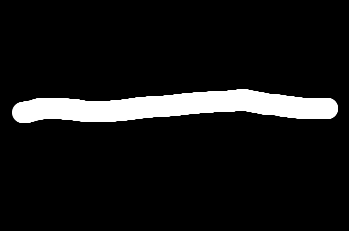

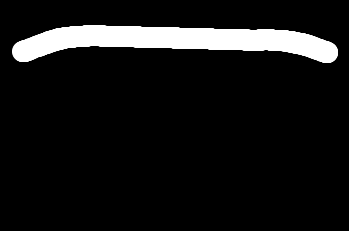

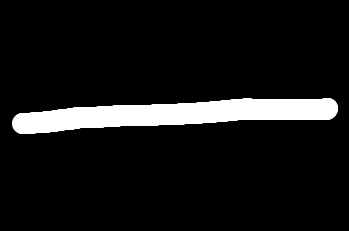

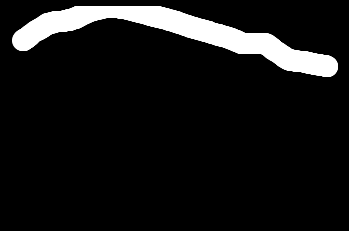

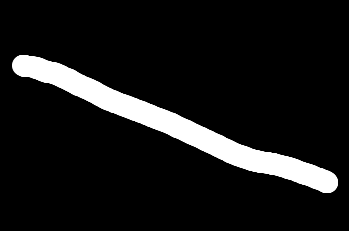

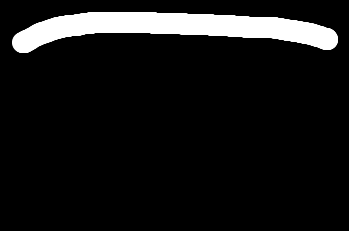

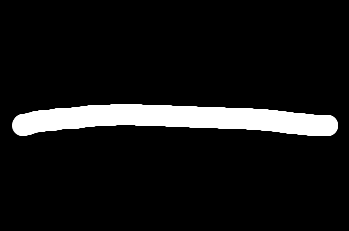

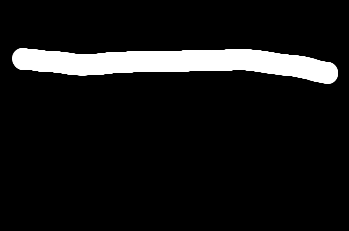

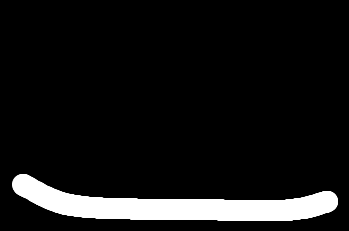

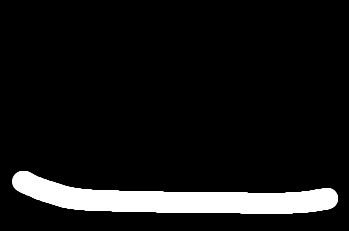

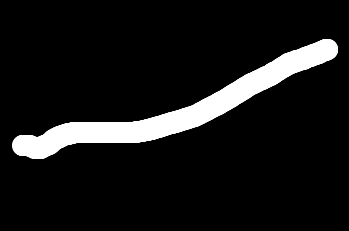

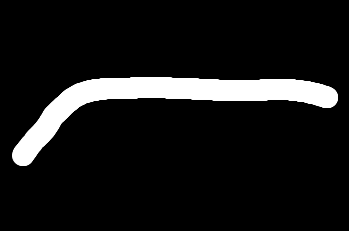

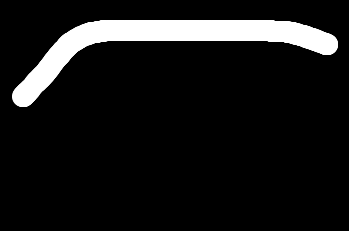

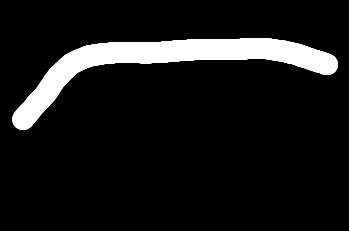

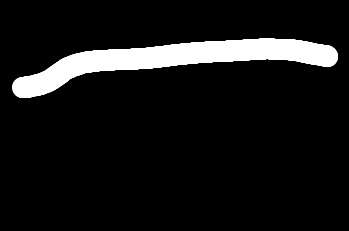

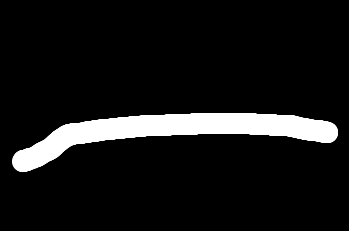

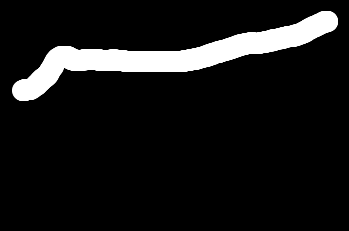

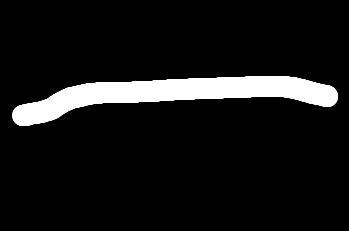

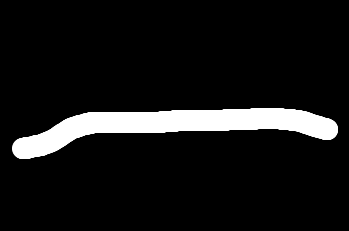

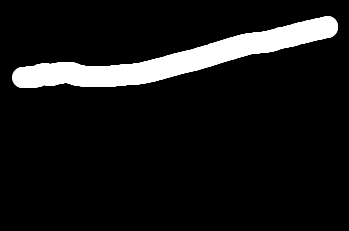

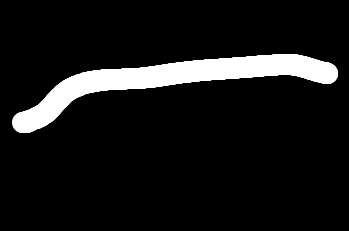

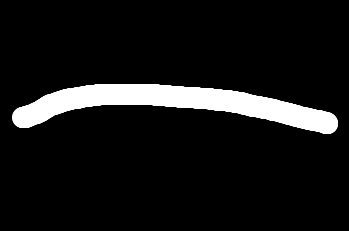

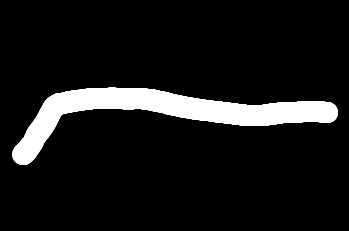

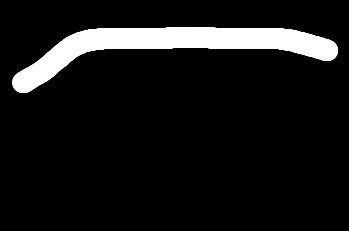

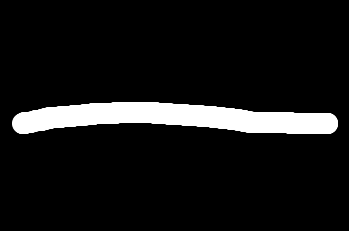

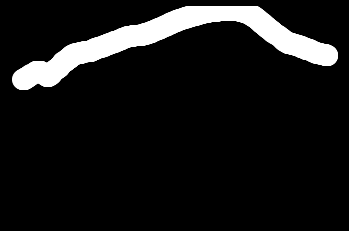

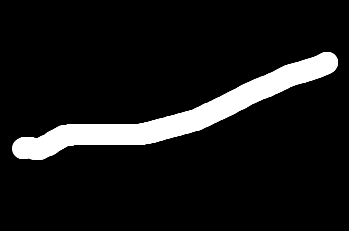

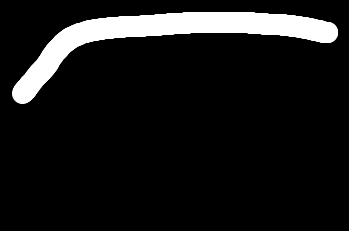

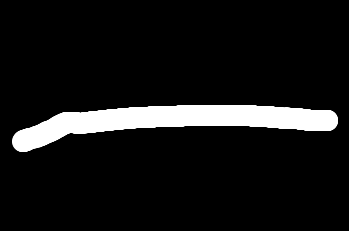

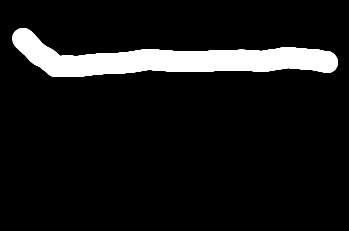

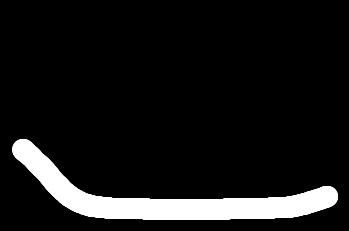

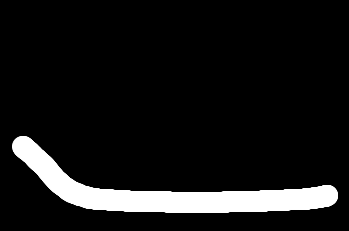

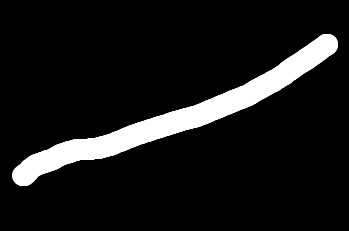

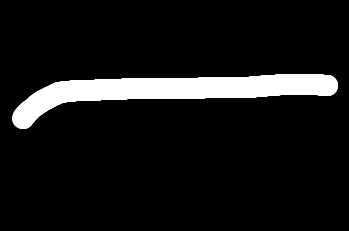

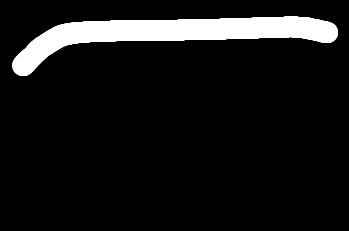

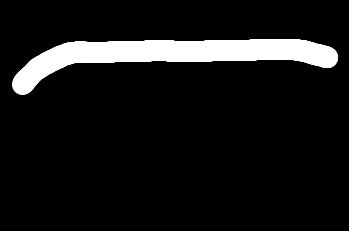

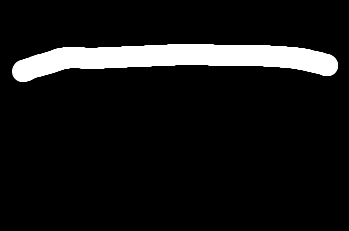

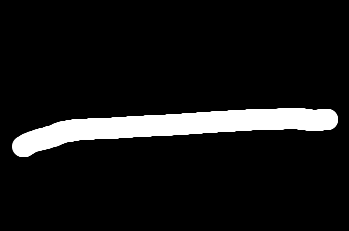

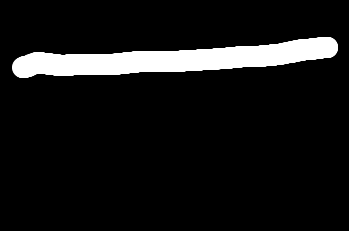

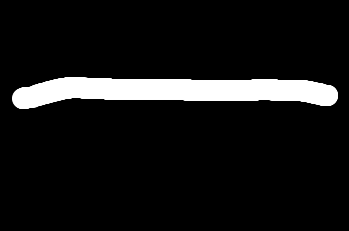

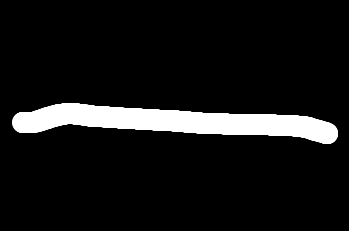

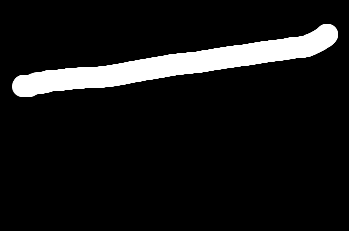

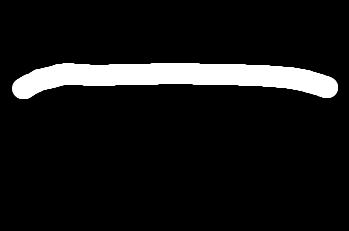

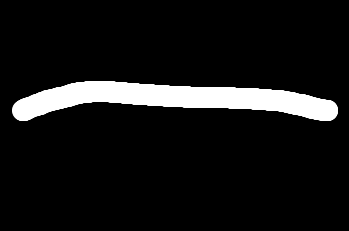

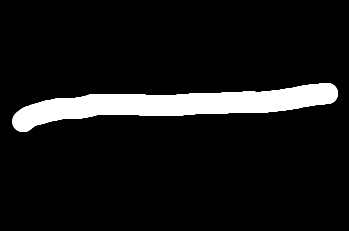

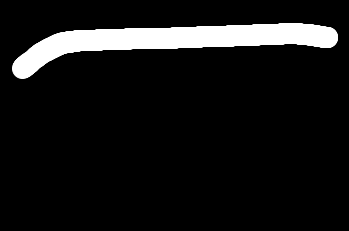

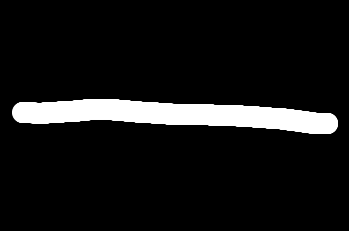

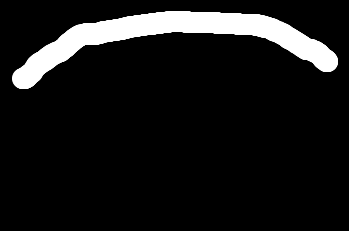

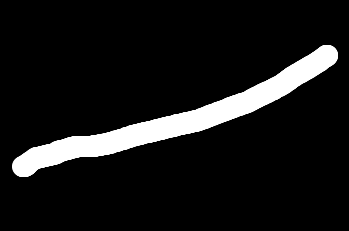

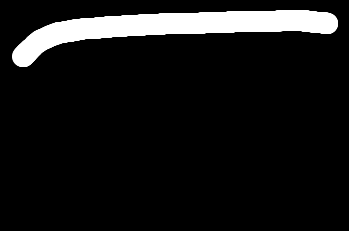

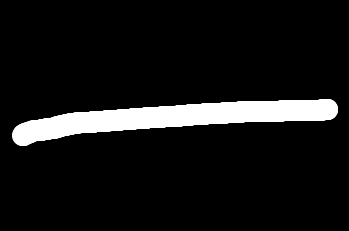

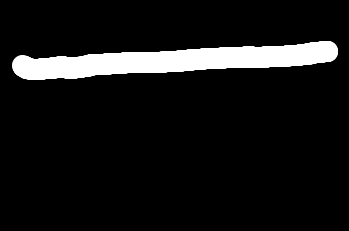

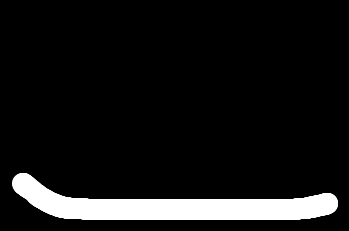

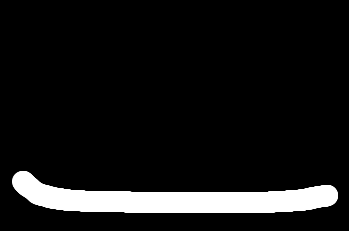

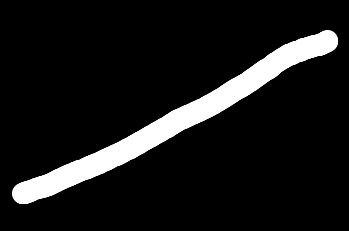

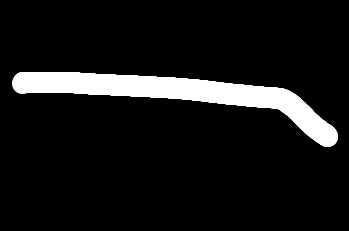

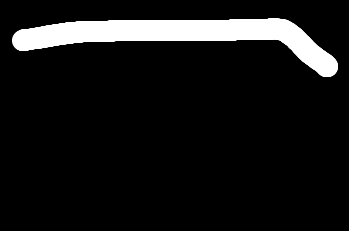

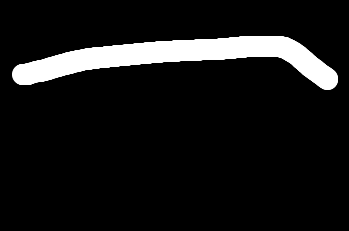

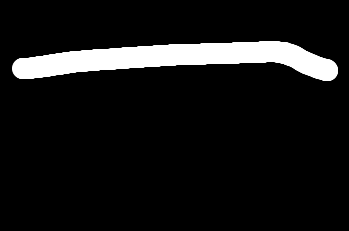

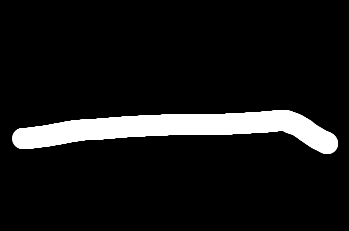

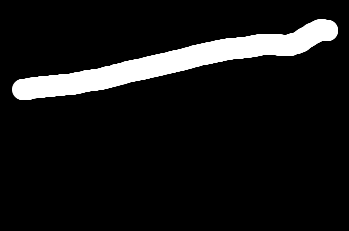

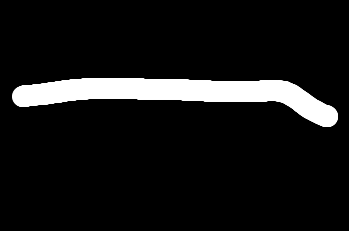

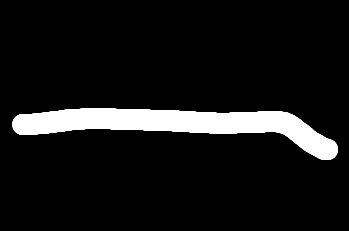

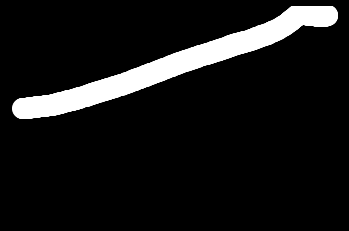

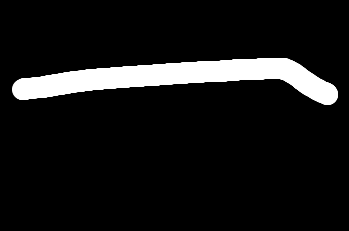

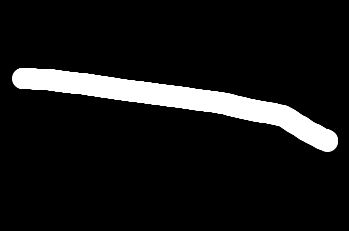

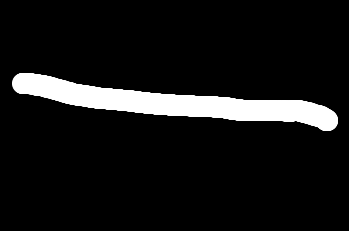

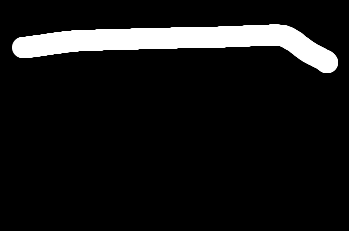

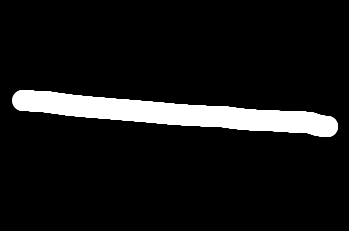

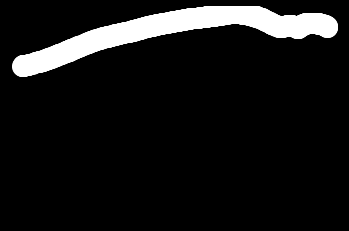

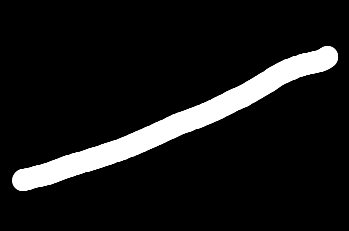

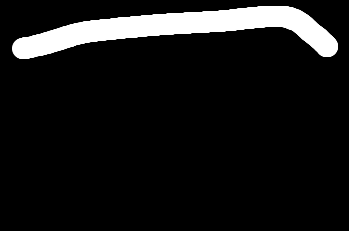

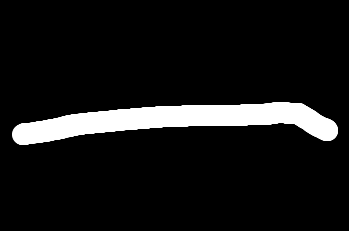

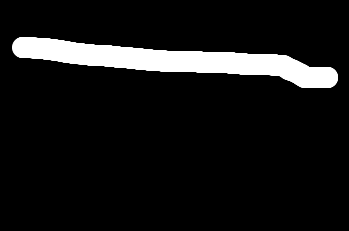

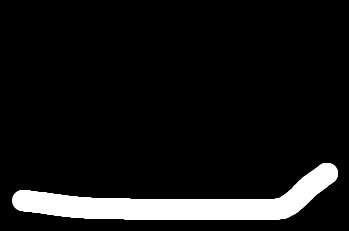

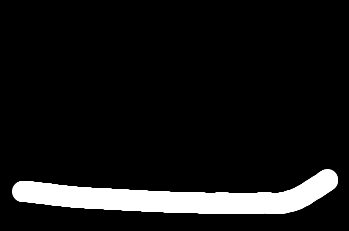

In [13]:
# Predictions with the model by randomly changing each inputs (1000 sample of each) and plot output vs each input save as img
dim_input = 39
dim_output = 57
torch.manual_seed(0)
new_model.eval()
rand_list = np.random.uniform(-3, 3, 1000)
z1 = torch.FloatTensor(rand_list)
main_outputs = [0, 9, 10, 11, 15, 17, 20 ,21, 22, 24, 31, 32, 33, 37, 40, 41, 42, 45, 47, 50, 54, 56]
num_col = len(main_outputs)
num_row = dim_input


for i in range(dim_input):
    x_train_new = torch.zeros(1000,dim_input)
    x_train_new[:,i] = z1
    with torch.no_grad():
        y_new = new_model (x_train_new)

    for j in range(num_col):
        if max_y[j] - min_y[j] < 0.05:
            y_new[:, main_outputs[j]] = 0
        fig = plt.figure()
        fig.patch.set_facecolor("black")
        fig.canvas.draw()
        plt.tick_params(left=False, labelleft=False) #remove ticks
        plt.box(False)
        ax = plt.axes()

#         ax.set(facecolor = 'black')
        plt.plot(x_train_new[:,i], y_new[:,main_outputs[j]], 'bo', markersize = 20, color = 'white')
        plt.axis('off')
        plt.ylim(min_y[j], max_y[j])
        
#         fig.canvas.draw()
#         fig.set_size_inches(28, 28)
        plt.savefig("plots_img_new/%d_%d.png" %(main_outputs[j],i), dpi = 200, facecolor = fig.patch.get_facecolor(), edgecolor = 'none')
#         if j ==1:
#             break



In [4]:
import cv2
import glob
X_data = []
files = glob.glob("plots_img_new/*.png")
IMG_SIZE = 28

for img in files:
    image = cv2.imread(img, 2)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    ret, bw_img = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    X_data.append (bw_img)

X_data = np.array(X_data)
X_data = X_data.astype('float32') / 255

In [31]:
# Kmeans without TSNe

from sklearn.cluster import KMeans
x = X_data.reshape(len(X_data),-1)

kmeans = KMeans(n_clusters= 5 ,n_jobs=-1, random_state=22)
kmeans.fit(x)
kmeans.labels_

/home/zahraj/jupyter1/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


array([0, 0, 3, 3, 1, 0, 2, 0, 3, 2, 3, 1, 1, 3, 1, 0, 0, 3, 3, 0, 0, 3,
       2, 3, 0, 0, 0, 0, 3, 0, 0, 3, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 4,
       0, 4, 1, 1, 2, 4, 3, 0, 0, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 2, 2, 1,
       1, 1, 4, 0, 2, 1, 1, 3, 2, 2, 0, 3, 0, 0, 3, 1, 3, 0, 1, 4, 0, 1,
       1, 4, 1, 4, 4, 0, 0, 3, 4, 1, 2, 0, 1, 2, 0, 0, 1, 0, 3, 0, 3, 3,
       1, 2, 1, 1, 0, 1, 4, 0, 0, 3, 1, 3, 4, 1, 3, 1, 4, 1, 4, 0, 2, 1,
       0, 1, 0, 4, 1, 1, 3, 2, 0, 2, 1, 4, 1, 3, 1, 4, 3, 2, 1, 1, 2, 0,
       4, 3, 0, 4, 0, 3, 4, 4, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 0, 2, 0, 3,
       2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 3, 2, 1, 1, 0, 1, 3, 1, 2, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 2, 1, 2, 1, 1, 1, 4, 2, 2, 0, 1, 0, 1, 3, 1,
       3, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 1, 3, 1, 4, 3, 1, 3, 0, 4, 1,
       1, 1, 1, 4, 3, 3, 3, 4, 2, 1, 0, 3, 2, 0, 1, 1, 0, 3, 0, 3, 1, 2,
       0, 1, 3, 1, 0, 0, 4, 1, 2, 0, 4, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 4, 1, 1, 1, 0, 2, 4, 2, 1, 0,

In [32]:
# Group actual image filename and cluster names for each plot
groups = {}
for file, cluster in zip(files,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [33]:
print(len(groups[0]))

230


In [ ]:
# Visualize each cluster images
for i in groups[0]:
    ax = cv2.imread(i, 2)
    imgplot = plt.imshow(ax)
    plt.show()

In [ ]:
for i in groups[9]:
    print(i)

In [60]:
main_outputs = [0, 9, 10, 11, 15, 17, 20 ,21, 22, 24, 31, 32, 33, 37, 40, 41, 42, 45, 47, 50, 54, 56]
p = torch.empty(len(main_outputs), 39)

In [62]:
for i in range(len(main_outputs)):
    for j in range(39):
        for l in range(20):
            for z in groups[l]:
                if z == 'plots_img_new/%d_%d.png' %(main_outputs[i],j):
                    p[i, j]= l 

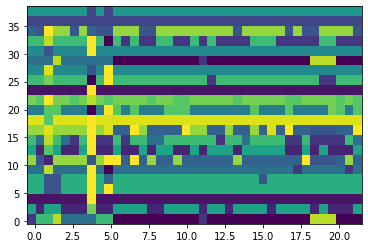

In [63]:
x =range (22)
y = range(39)
data = p

def extents(f):
    delta = f[1] - f[0]
    return [f[0] - delta/2, f[-1] + delta/2]

plt.imshow(data, aspect='auto', interpolation='none',
           extent=extents(x) + extents(y), origin='lower')
plt.savefig('py.png')

In [51]:
print(p[1, 20])

tensor(39.)


In [ ]:
# Visualize each cluster images
for i in groups[1]:
    ax = cv2.imread(i, 2)
    imgplot = plt.imshow(ax)
    plt.show()

In [ ]:
clusters = np.array(22, 39)

In [19]:
# Dimensionality reduction, TSNe 
from sklearn.manifold import TSNE

x = X_data.reshape(len(X_data),-1)
tsne = TSNE(n_components=2, verbose=1, random_state=123).fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 858 samples in 0.001s...
[t-SNE] Computed neighbors for 858 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 858 / 858
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.657974
[t-SNE] KL divergence after 1000 iterations: 0.740807


In [20]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

In [29]:
# cluster TSNe plots, Kmeans
from sklearn.cluster import KMeans
# from keras.applications.vgg16 import preprocess_input 

tsne1 = tsne.reshape(len(tsne),-1)
# x = preprocess_input(X_data)
kmeans = KMeans(n_clusters= 20 ,n_jobs=-1, random_state=22)
kmeans.fit(tsne1)
kmeans.labels_

/home/zahraj/jupyter1/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


array([ 7, 13, 14,  0,  0,  1, 11,  1,  0, 19, 14,  4,  4, 18,  4, 15,  1,
       18,  0,  8, 15,  0, 19,  0,  7, 15, 12,  7, 18,  8,  1, 14,  5,  5,
       11, 10,  8, 11, 11, 18, 16,  1, 15,  2, 12,  2,  9,  4,  8,  2, 14,
       15,  1,  4, 16, 14,  0, 14,  9, 19,  1,  5,  4, 11,  6, 16,  4, 10,
        2, 12, 19,  4,  9, 14, 11, 19,  1, 14, 15, 15, 18,  4,  0, 12, 10,
        2, 12,  4,  5,  2,  9,  2,  2,  8, 15, 14,  2, 16,  3, 12,  5,  3,
        7, 15, 16,  8, 18,  1,  0, 18,  4,  6, 16, 10,  1, 10,  2,  1, 12,
       14,  5, 14,  2,  5, 14,  4,  2, 17,  2, 13,  6,  5, 12, 10, 13,  2,
       16, 17, 14,  8, 12,  3, 10,  2, 16, 14, 10,  2, 14,  5,  5, 16,  3,
        8,  2, 14, 13,  2,  7, 18,  2,  2, 17, 18, 15,  5, 12, 18,  8,  8,
        3,  8,  7,  8, 13, 14,  5,  6, 13,  8,  7,  7,  4, 10, 11, 13, 10,
       18,  5,  5, 10, 13, 10, 18,  5,  3,  5, 13,  7,  3,  5, 13, 13, 10,
       14,  3,  5, 19, 10,  5,  5,  2, 19, 19, 13, 10,  7, 17, 17,  5, 18,
       16,  6, 13, 17, 15

In [22]:
# Group actual image filename and cluster names for each plot
groups = {}
for file, cluster in zip(files,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [24]:
print(len(groups[9]))

54


In [ ]:
# Visualize each cluster images
for i in groups[7]:
    ax = cv2.imread(i, 2)
    imgplot = plt.imshow(ax)
    plt.show()

In [ ]:
dim_input = 39
dim_output = 57

torch.manual_seed(0)
new_model.eval()
rand_list = np.random.uniform(-3, 3, 1000)
z1 = torch.FloatTensor(rand_list)


num_col = dim_input
num_row = dim_output
# num_row = len(main_outputs)

min_y = torch.zeros(num_row)
max_y = torch.zeros(num_row)

for j in range(num_col):
    x_train_new = torch.zeros(1000,dim_input)
    x_train_new[:,j] = z1
    with torch.no_grad():
        y_new = new_model (x_train_new)
        
    for i in range(num_row):
        if min_y[i] > torch.min( y_new[:,i]):
            min_y[i] = torch.min( y_new[:,i])
        if max_y[i] <  torch.max( y_new[:,i]):    
            max_y[i] = torch.max( y_new[:,i])

<Figure size 432x288 with 0 Axes>

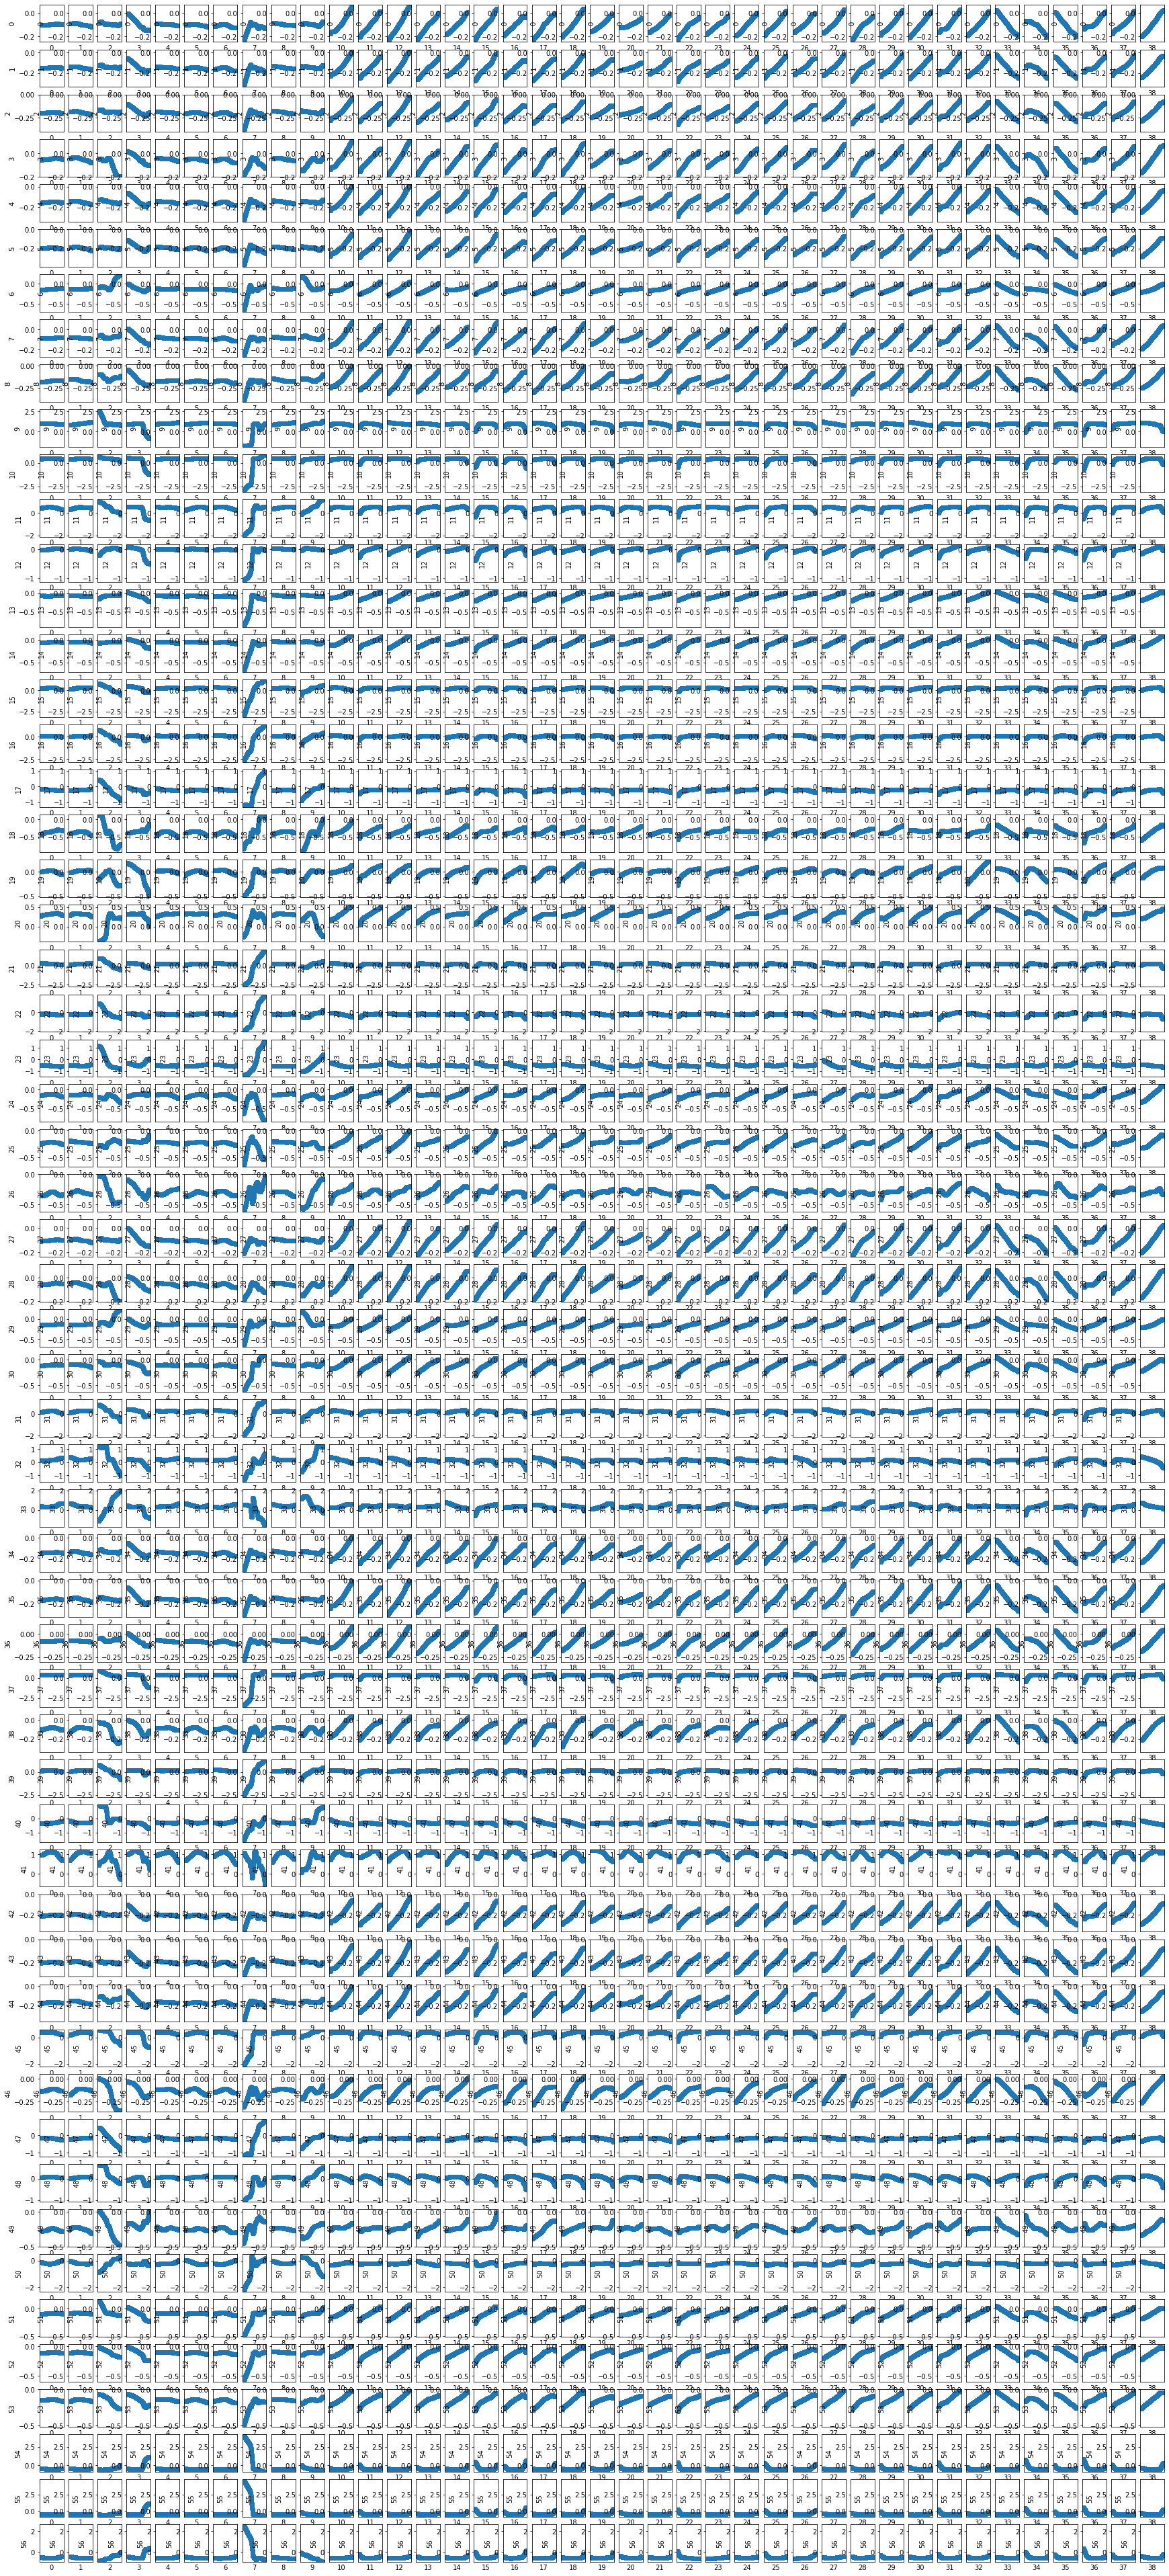

In [9]:
# Predictions with the model by randomly changing each inputs (1000 sample of each) and plot output vs each input
dim_input = 39
torch.manual_seed(0)
new_model.eval()
rand_list = np.random.uniform(-3, 3, 1000)
z1 = torch.FloatTensor(rand_list)
# main_outputs = [0, 9, 10, 11, 15, 17, 20 ,21, 22, 24, 31, 32, 33, 37, 40, 41, 42, 45, 47, 50, 54, 56]
num_col = dim_input
num_row = dim_output
f = plt.figure()   
f,axsi = plt.subplots(num_row, num_col, figsize=(30,70))

for j in range(num_col):
    x_train_new = torch.zeros(1000,dim_input)
    x_train_new[:,j] = z1
    with torch.no_grad():
        y_new = new_model (x_train_new)
        
    for i in range(num_row):
        if max_y[i] - min_y[i] < 0.05:
            y_new[:, i] = 0
        axsi[i][j].scatter(x_train_new[:,j], y_new[:,i])
        axsi[i][j].set(xlabel= j, ylabel= i)
#         axsi[i][j].set_ylim([-2, 2])
        axsi[i][j].set_ylim([min_y[i], max_y[i]])

for i in range (num_row):
    for j in range(num_col):
        axsi[i][j].set_xticks([])

In [1]:
rows = []
for i in range(57):
    rows.append(i)

In [43]:
cols = []
for i in range(38):
    cols.append(i)

In [72]:
# just for 2030
rows_2030 = [0,3, 6, 9, 12, 15, 18, 21, 24, 27, 28, 29, 30, 31, 32, 33, 51, 54]

In [21]:
srows_2030 = []
for i in range(57):
    if i not in rows_2030:
        srows_2030.append(i)

In [63]:
print(srows_2030)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 56]


In [73]:
cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 18, 23, 26, 29, 32, 35]

In [46]:
print(cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 15, 18, 23, 26, 29, 32, 35]


In [28]:
import pandas as pd
df = pd.read_excel('Clusters_3_removed.xlsx', header = 0, usecol = cols, nrows = 57, engine='openpyxl')

In [74]:
df_2030 = pd.read_excel('Clusters_3_removed.xlsx', header = 0, usecols =cols, nrows = 57, engine='openpyxl')

In [75]:
from pandas import DataFrame
df_2030 = df_2030.drop([1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 55, 56])
print(df_2030)

    0   1   2   3   4   5   6   7   8   9   12  15  18  23  26  29  32  35
0    3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   1   5
3    3   3   1   3   3   3   6   3   5   5   5   5   5   5   5   5   1   5
6    3   3   7   3   3   3   5   3   2   4   4   4   4   4   4   4   2   4
9    3   3   2   3   3   3   5   3   3   3   3   3   3   3   3   3   3   3
12   3   3   3   3   3   3   5   3   3   4   4   4   4   4   4   4   2   4
15   3   3   2   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3
18   3   3   1   3   3   3   5   3   5   4   4   4   3   3   3   3   2   5
21   3   3   2   3   3   3   5   3   4   3   3   3   3   3   3   3   3   3
24   3   3   8   3   3   3   6   3   3   4   4   4   4   4   4   4   2   4
27   3   3   3   3   3   3   6   3   3   5   5   5   5   5   5   5   1   5
28   3   3   6   3   3   3   6   3   8   5   5   5   5   5   5   5   1   5
29   3   3   7   3   3   3   5   3   2   4   4   4   4   4   4   4   2   4
30   3   3   3   3   3   

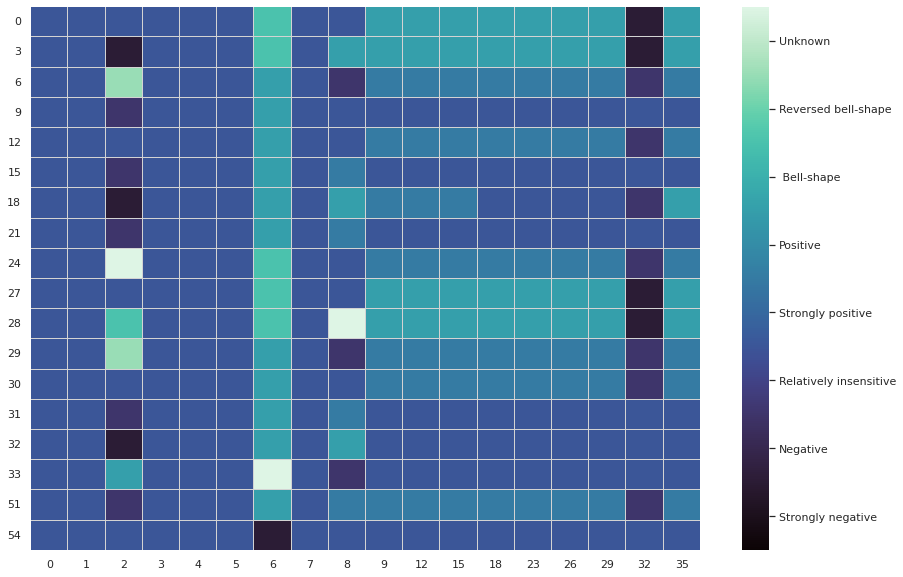

In [76]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# plot a heatmap
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(df_2030, linewidths=0.005, linecolor='lightgray', robust=True, fmt="f", cmap="mako", vmin=0, vmax=8)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks( [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], update_ticks=True)
colorbar.set_ticklabels(['Strongly negative', 'Negative', 'Relatively insensitive', 'Strongly positive', 'Positive', ' Bell-shape',  'Reversed bell-shape', 'Unknown'])


_, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.savefig('heatmap2030.png')


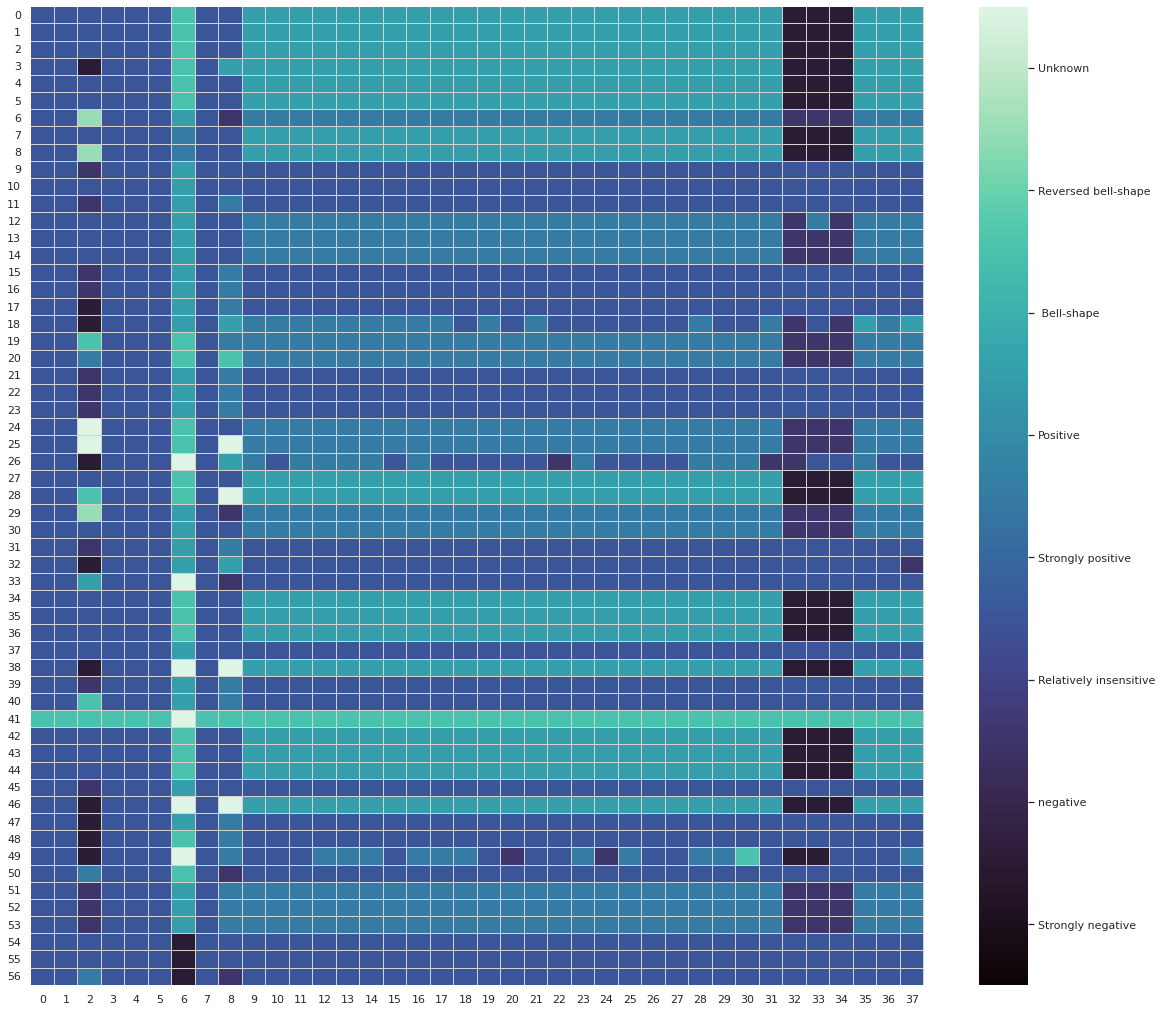

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# plot a heatmap
sns.set(rc = {'figure.figsize':(20,18)})
ax = sns.heatmap(df, linewidths=0.005, linecolor='lightgray', robust=True, fmt="f", cmap="mako", vmin=0, vmax=8)

colorbar = ax.collections[0].colorbar
colorbar.set_ticks( [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], update_ticks=True)
colorbar.set_ticklabels(['Strongly negative', 'negative', 'Relatively insensitive', 'Strongly positive', 'Positive', ' Bell-shape',  'Reversed bell-shape', 'Unknown'])




# X - Y axis labels
# ax.set_ylabel('Outputs')
# ax.set_xlabel('Inputs')

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks()
plt.setp(labels, rotation=0)
plt.savefig('heatmap.png')
# sns.palplot(sns.diverging_palette(200, 100, n=11))
# sns.color_palette(palette=None, n_colors=8, desat=None, as_cmap=False,  )
# sns.color_palette("rocket", as_cmap=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas
import seaborn.apionly as sns
from matplotlib.colors import LinearSegmentedColormap

sns.set(font_scale=0.8)
dataFrame = pandas.read_csv('LUH2_trans_matrix.csv').set_index(['Unnamed: 0'])

# For only three colors, it's easier to choose them yourself.
# If you still really want to generate a colormap with cubehelix_palette instead,
# add a cbar_kws={"boundaries": linspace(-1, 1, 4)} to the heatmap invocation
# to have it generate a discrete colorbar instead of a continous one.
myColors = ((0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = sns.heatmap(dataFrame, cmap=cmap, linewidths=.5, linecolor='lightgray')

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.667, 0, 0.667])
colorbar.set_ticklabels(['B', 'A', 'C'])

# X - Y axis labels
ax.set_ylabel('FROM')
ax.set_xlabel('TO')

# Only y-axis labels need their rotation set, x-axis labels already have a rotation of 0
_, labels = plt.yticks()
plt.setp(labels, rotation=0)

plt.show()

In [6]:
# Predictions with the model by randomly changing each inputs (1000 sample of each) and plot output vs each input
dim_input = 39
dim_output = 57
torch.manual_seed(0)
new_model.eval()
rand_list = np.random.uniform(-3, 3, 100)
z1 = torch.FloatTensor(rand_list)
main_outputs = [0, 9, 10, 11, 15, 17, 20 ,21, 22, 24, 31, 32, 33, 37, 40, 41, 42, 45, 47, 50, 54, 56]
# min_y = torch.zeros(57)
# max_y = torch.zeros(57)

num_col = dim_input
num_row = dim_output
# num_row = len(main_outputs)
# min_y = torch.zeros(num_row)
# max_y = torch.zeros(num_row)

f = plt.figure()   
f,axsi = plt.subplots(num_row, num_col, sharey= True, figsize=(30,70))

for j in range(num_col):
    x_train_new = torch.zeros(100,dim_input)
    x_train_new[:,j] = z1
    with torch.no_grad():
        y_new = new_model (x_train_new)
        
    for i in range(num_row):
#         if min_y[i] > torch.min( y_new[:,i]):
#             min_y[i] = torch.min( y_new[:,i])
#         if max_y[i] <  torch.max( y_new[:,i]):    
#             max_y[i] = torch.max( y_new[:,i])
        if max_y[i] - min_y[i] < 0.05:
            y_new[:, i] = 0
        axsi[i][j].plot(x_train_new[:,j], y_new[:,i])
        axsi[i][j].set(xlabel= j, ylabel= i)
        axsi[i][j].set_ylim([min_y[i], max_y[i]])
#         axsi[i][j].set_xticks([])


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

Error in callback <function flush_figures at 0x2ac526789400> (for post_execute):


KeyboardInterrupt: 

In [ ]:
print(min_y)

In [ ]:
x_train_new[1,:]

In [ ]:
np.sort(y_new[:,13]

In [ ]:
my_data = np.genfromtxt('CTax.csv', delimiter = ',')

In [ ]:
print(np.sort(my_data))

In [ ]:
# x_new[:,9] = np.sort(x_new[:,9])

In [ ]:
print(x_new[:,9])

In [ ]:
 plt.scatter(x_new2[:,9], y_new2[:,42])
# plt.title(y_train_idx[0])